In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as tvt
from torchvision import datasets
import glob
from PIL import Image
from torch.utils.data import Dataset , DataLoader
import torch.optim as optim
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
#from pytorch_fid.fid_score
#!pip install optuna
#import optuna
#from optuna.trial import TrialState


In [ ]:
!pip3 install pytorch-fid
#from pytorch_fid.fid_score

#import calculate_activation_statistics, calculate_frechet_distance
#from pytorch_fid.inception import InceptionV3
#from pytorch_fid.inception import InceptionV3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pytorch_fid import fid_score
import torchvision.utils as vutils

In [ ]:
!unzip pizzas.zip


In [ ]:
file_path = "eval/00001.jpg"
image = Image.open(file_path)
image.size

(64, 64)

In [ ]:
class mydataset(torch.utils.data.Dataset):
  def __init__(self , root , transform):
    self.root = root
    self.data = []
    self.transform = transform

    for image_path in glob.glob(self.root + "/*.jpg"):
      #print(image_path)
      self.data.append(image_path)
    
    print(self.data)

  
  def __len__(self):
    return len(self.data)
  
  def __getitem__(self , idx):
    image_path = self.data[idx]
    #print(image_path)
    image = Image.open(image_path)
    im_tnsr = self.transform(image)
    return im_tnsr



In [ ]:
transform = tvt.Compose([tvt.ToTensor()])
dataloader_train = mydataset("train",  transform )
trainer = DataLoader(dataloader_train , batch_size = 32)
len(dataloader_train)

In [ ]:
dataloader_val = mydataset("eval",  transform )
val = DataLoader(dataloader_train , batch_size = 128)

In [ ]:
c = 0
for x , data in enumerate(trainer):
  image = data
  c = c + 1
  print(image.shape)

print(c)



https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
class GeneratorNetwork(nn.Module):
  def __init__(self, s_l , f_s):
    super(GeneratorNetwork, self).__init__()
    self.gen_layer = nn.Sequential(nn.ConvTranspose2d(s_l , f_s * 4 , 2),
                                   nn.ConvTranspose2d(f_s*4 , f_s *8 , 3),
                                   nn.BatchNorm2d(f_s * 8),
                                   nn.ReLU(True),

                                   nn.ConvTranspose2d(f_s*8 , f_s*6 , 1, 2),
                                   nn.ConvTranspose2d(f_s*6 , f_s*4 , 2, 1),
                                   nn.BatchNorm2d(f_s*4),
                                   nn.ReLU(True),

                                   nn.ConvTranspose2d(f_s * 4 , f_s*2 , 4, 2,1),
                                   nn.BatchNorm2d(f_s*2),
                                   nn.ReLU(True),

                                   nn.ConvTranspose2d(f_s*2 , f_s , 4, 2, 1),
                                   nn.BatchNorm2d(f_s),
                                   nn.ReLU(True),

                                   nn.ConvTranspose2d(f_s , 3 , 4, 2, 1),
                                   nn.Tanh()        
                      )
  
  def forward(self,x):
    out = self.gen_layer(x)
    return out


Checkinf shape of the network

In [ ]:

ng = GeneratorNetwork(100, 64)


Discriminator

In [ ]:
class DiscriminatorNetwork(nn.Module):
  def __init__(self , d_s , nc):
    super(DiscriminatorNetwork, self).__init__()
    self.disc_layer = nn.Sequential(nn.Conv2d(nc, d_s, 3, 2, 1),
                                    nn.LeakyReLU(0.2, inplace=True),
                                    
                                    nn.Conv2d(d_s, d_s * 2, 3, 2, 1),
                                    nn.BatchNorm2d(d_s * 2),
                                    nn.LeakyReLU(0.2, inplace=True),

                                    nn.Conv2d(d_s * 2, d_s * 4, 4, 2, 1),
                                    nn.BatchNorm2d(d_s * 4),
                                    nn.LeakyReLU(0.2, inplace=True),


                                    nn.Conv2d(d_s * 4, d_s * 8, 3, 2, 1),
                                    nn.BatchNorm2d(d_s * 8),
                                    nn.LeakyReLU(0.2, inplace=True),

                                    nn.Conv2d(d_s * 8, 1, 4, 1, 0),
                                    nn.Sigmoid()
                                    )
  def forward(self,input):
    out = self.disc_layer(input)
    return out

                                    

Testing network

In [ ]:
label = torch.full((128,), 1)
print(label.shape)

torch.Size([128])


In [ ]:

d = DiscriminatorNetwork(64,3)


Initializing network

In [ ]:
criterion = nn.BCELoss()
fixed_noise = torch.randn(64, 100, 1, 1).cuda()

real_label = 1
fake_label = 0


#lr = 0.0003
#lr = 0.0004
#lr = 0.0006
#lr = 0.0005
#lr = 0.001
beta1 = 0.5
#optimizerD = optim.Adam(d.parameters(), lr=lr, betas=(beta1, 0.999))
#optimizerG = optim.Adam(ng.parameters(), lr=lr, betas=(beta1, 0.999))

Training Network

[0/100][0/257]	Loss_D: 1.9830	Loss_G: 4.9249	D(x): 0.3350	D(G(z)): 0.4581 / 0.0088


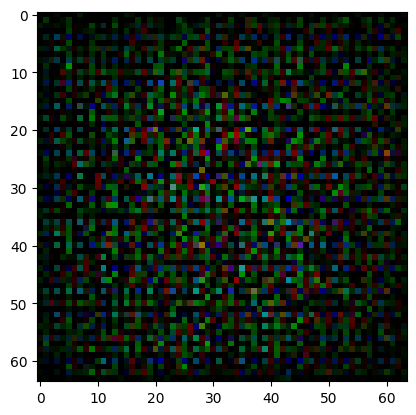

[0/100][50/257]	Loss_D: 2.4181	Loss_G: 1.7057	D(x): 0.2876	D(G(z)): 0.1893 / 0.3035
[0/100][100/257]	Loss_D: 0.5385	Loss_G: 4.3498	D(x): 0.8436	D(G(z)): 0.2252 / 0.0288
[0/100][150/257]	Loss_D: 0.6937	Loss_G: 3.6556	D(x): 0.8733	D(G(z)): 0.3748 / 0.0341
[0/100][200/257]	Loss_D: 0.8383	Loss_G: 3.3491	D(x): 0.7107	D(G(z)): 0.2924 / 0.0624
[0/100][250/257]	Loss_D: 0.8913	Loss_G: 1.9026	D(x): 0.5749	D(G(z)): 0.2079 / 0.1761
[1/100][0/257]	Loss_D: 1.0849	Loss_G: 4.0090	D(x): 0.4155	D(G(z)): 0.0146 / 0.0245
[1/100][50/257]	Loss_D: 0.9668	Loss_G: 3.9241	D(x): 0.6752	D(G(z)): 0.3707 / 0.0268
[1/100][100/257]	Loss_D: 1.1796	Loss_G: 4.1847	D(x): 0.8290	D(G(z)): 0.5796 / 0.0201
[1/100][150/257]	Loss_D: 0.8330	Loss_G: 2.5269	D(x): 0.6161	D(G(z)): 0.2204 / 0.1119
[1/100][200/257]	Loss_D: 1.7417	Loss_G: 4.2451	D(x): 0.7741	D(G(z)): 0.6819 / 0.0235


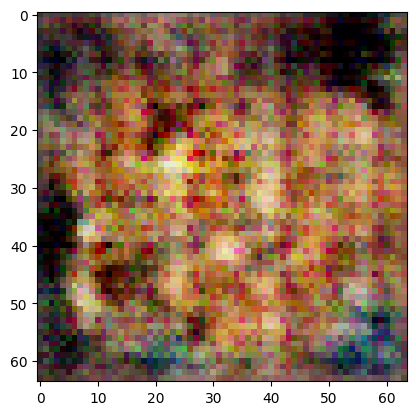

[1/100][250/257]	Loss_D: 1.0274	Loss_G: 2.1882	D(x): 0.5255	D(G(z)): 0.1942 / 0.1379
[2/100][0/257]	Loss_D: 1.0008	Loss_G: 2.0263	D(x): 0.5727	D(G(z)): 0.2410 / 0.1742
[2/100][50/257]	Loss_D: 1.2623	Loss_G: 2.1278	D(x): 0.6093	D(G(z)): 0.4424 / 0.1431
[2/100][100/257]	Loss_D: 1.0336	Loss_G: 3.2198	D(x): 0.7868	D(G(z)): 0.4655 / 0.0651
[2/100][150/257]	Loss_D: 1.2298	Loss_G: 4.0302	D(x): 0.9152	D(G(z)): 0.6420 / 0.0236
[2/100][200/257]	Loss_D: 1.2259	Loss_G: 1.9531	D(x): 0.5078	D(G(z)): 0.2588 / 0.1907
[2/100][250/257]	Loss_D: 0.8236	Loss_G: 2.3907	D(x): 0.6563	D(G(z)): 0.2660 / 0.1194
[3/100][0/257]	Loss_D: 1.1752	Loss_G: 1.5128	D(x): 0.4946	D(G(z)): 0.2891 / 0.2626
[3/100][50/257]	Loss_D: 1.3554	Loss_G: 3.7570	D(x): 0.7477	D(G(z)): 0.5928 / 0.0323
[3/100][100/257]	Loss_D: 1.1218	Loss_G: 2.7254	D(x): 0.6065	D(G(z)): 0.3785 / 0.0869
[3/100][150/257]	Loss_D: 1.1393	Loss_G: 3.7738	D(x): 0.7671	D(G(z)): 0.5348 / 0.0286
[3/100][200/257]	Loss_D: 1.1681	Loss_G: 2.1033	D(x): 0.5348	D(G(z)): 0.

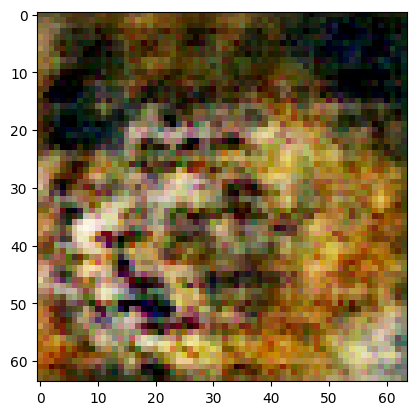

[3/100][250/257]	Loss_D: 1.0883	Loss_G: 2.4084	D(x): 0.6151	D(G(z)): 0.3758 / 0.1235
[4/100][0/257]	Loss_D: 1.1015	Loss_G: 1.8453	D(x): 0.4717	D(G(z)): 0.2226 / 0.1936
[4/100][50/257]	Loss_D: 1.1986	Loss_G: 2.2391	D(x): 0.6209	D(G(z)): 0.4593 / 0.1297
[4/100][100/257]	Loss_D: 0.6362	Loss_G: 2.5396	D(x): 0.7151	D(G(z)): 0.2229 / 0.0891
[4/100][150/257]	Loss_D: 1.0356	Loss_G: 0.9763	D(x): 0.4798	D(G(z)): 0.1580 / 0.3944
[4/100][200/257]	Loss_D: 1.0688	Loss_G: 1.9116	D(x): 0.5754	D(G(z)): 0.3129 / 0.1786
[4/100][250/257]	Loss_D: 0.8445	Loss_G: 2.3341	D(x): 0.6410	D(G(z)): 0.2918 / 0.1069
[5/100][0/257]	Loss_D: 1.1867	Loss_G: 2.4078	D(x): 0.7016	D(G(z)): 0.5101 / 0.1198
[5/100][50/257]	Loss_D: 1.2076	Loss_G: 2.1595	D(x): 0.6433	D(G(z)): 0.4716 / 0.1468
[5/100][100/257]	Loss_D: 0.9400	Loss_G: 1.7732	D(x): 0.5627	D(G(z)): 0.2280 / 0.2041
[5/100][150/257]	Loss_D: 0.8070	Loss_G: 2.3082	D(x): 0.6868	D(G(z)): 0.3175 / 0.1192
[5/100][200/257]	Loss_D: 1.0471	Loss_G: 2.0195	D(x): 0.6506	D(G(z)): 0.

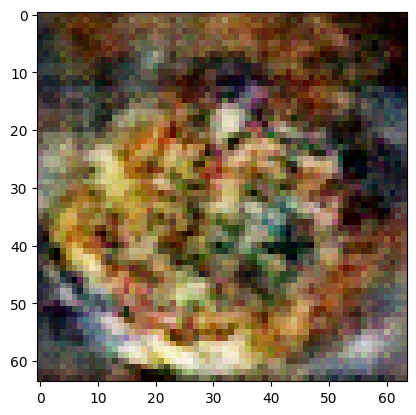

[5/100][250/257]	Loss_D: 1.7120	Loss_G: 3.7541	D(x): 0.9013	D(G(z)): 0.7722 / 0.0286
[6/100][0/257]	Loss_D: 1.2103	Loss_G: 1.4666	D(x): 0.5237	D(G(z)): 0.3752 / 0.2538
[6/100][50/257]	Loss_D: 1.6358	Loss_G: 3.7893	D(x): 0.8686	D(G(z)): 0.7420 / 0.0295
[6/100][100/257]	Loss_D: 1.0734	Loss_G: 2.9325	D(x): 0.7552	D(G(z)): 0.5198 / 0.0660
[6/100][150/257]	Loss_D: 0.6181	Loss_G: 2.7784	D(x): 0.7129	D(G(z)): 0.1954 / 0.0782
[6/100][200/257]	Loss_D: 0.8954	Loss_G: 2.2765	D(x): 0.6552	D(G(z)): 0.3279 / 0.1226
[6/100][250/257]	Loss_D: 0.7979	Loss_G: 2.7123	D(x): 0.6814	D(G(z)): 0.2918 / 0.0779
[7/100][0/257]	Loss_D: 1.4783	Loss_G: 2.5281	D(x): 0.4554	D(G(z)): 0.4545 / 0.0938
[7/100][50/257]	Loss_D: 0.9973	Loss_G: 1.2430	D(x): 0.5162	D(G(z)): 0.2321 / 0.3169
[7/100][100/257]	Loss_D: 0.8046	Loss_G: 3.0941	D(x): 0.8317	D(G(z)): 0.4296 / 0.0573
[7/100][150/257]	Loss_D: 0.8585	Loss_G: 1.9134	D(x): 0.5425	D(G(z)): 0.1337 / 0.1779
[7/100][200/257]	Loss_D: 0.7610	Loss_G: 2.6057	D(x): 0.6824	D(G(z)): 0.

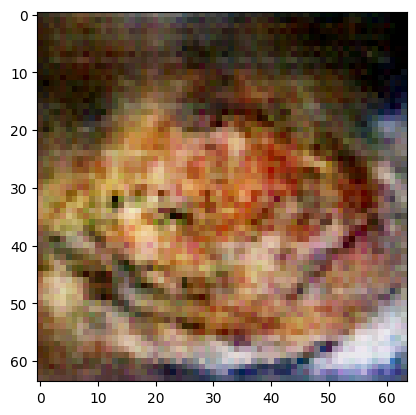

[7/100][250/257]	Loss_D: 1.0577	Loss_G: 3.7141	D(x): 0.8730	D(G(z)): 0.5730 / 0.0275
[8/100][0/257]	Loss_D: 1.0406	Loss_G: 1.2035	D(x): 0.4680	D(G(z)): 0.1808 / 0.3321
[8/100][50/257]	Loss_D: 0.8736	Loss_G: 2.7191	D(x): 0.8056	D(G(z)): 0.4546 / 0.0741
[8/100][100/257]	Loss_D: 1.0371	Loss_G: 3.1516	D(x): 0.7551	D(G(z)): 0.4668 / 0.0552
[8/100][150/257]	Loss_D: 0.6471	Loss_G: 2.6707	D(x): 0.7590	D(G(z)): 0.2735 / 0.0928
[8/100][200/257]	Loss_D: 0.9020	Loss_G: 2.6788	D(x): 0.7051	D(G(z)): 0.3795 / 0.0807
[8/100][250/257]	Loss_D: 1.8187	Loss_G: 4.9721	D(x): 0.9374	D(G(z)): 0.7831 / 0.0118
[9/100][0/257]	Loss_D: 1.4345	Loss_G: 1.0774	D(x): 0.3578	D(G(z)): 0.2068 / 0.3733
[9/100][50/257]	Loss_D: 0.9552	Loss_G: 2.4991	D(x): 0.7599	D(G(z)): 0.4568 / 0.0987
[9/100][100/257]	Loss_D: 0.9417	Loss_G: 2.7746	D(x): 0.8410	D(G(z)): 0.5000 / 0.0757
[9/100][150/257]	Loss_D: 1.0751	Loss_G: 3.0641	D(x): 0.8789	D(G(z)): 0.5750 / 0.0614


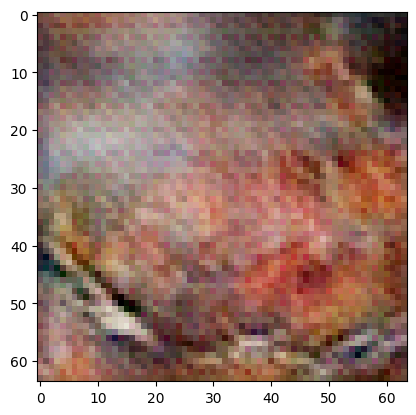

[9/100][200/257]	Loss_D: 0.5691	Loss_G: 2.2931	D(x): 0.7853	D(G(z)): 0.2389 / 0.1076
[9/100][250/257]	Loss_D: 1.0272	Loss_G: 2.4838	D(x): 0.5854	D(G(z)): 0.3243 / 0.1077
[10/100][0/257]	Loss_D: 0.9750	Loss_G: 4.1455	D(x): 0.8816	D(G(z)): 0.5442 / 0.0195
[10/100][50/257]	Loss_D: 0.5934	Loss_G: 1.6702	D(x): 0.6710	D(G(z)): 0.1326 / 0.2159
[10/100][100/257]	Loss_D: 0.8073	Loss_G: 2.6063	D(x): 0.7181	D(G(z)): 0.3451 / 0.0917
[10/100][150/257]	Loss_D: 0.8003	Loss_G: 3.9326	D(x): 0.8166	D(G(z)): 0.4007 / 0.0249
[10/100][200/257]	Loss_D: 1.4417	Loss_G: 5.9877	D(x): 0.9812	D(G(z)): 0.7249 / 0.0032
[10/100][250/257]	Loss_D: 0.8366	Loss_G: 1.6651	D(x): 0.5089	D(G(z)): 0.0720 / 0.2236
[11/100][0/257]	Loss_D: 0.5969	Loss_G: 2.5386	D(x): 0.7809	D(G(z)): 0.2637 / 0.0889
[11/100][50/257]	Loss_D: 1.2885	Loss_G: 1.2173	D(x): 0.4185	D(G(z)): 0.1774 / 0.3084
[11/100][100/257]	Loss_D: 0.7108	Loss_G: 4.3320	D(x): 0.8261	D(G(z)): 0.3646 / 0.0180
[11/100][150/257]	Loss_D: 0.4987	Loss_G: 3.1105	D(x): 0.7145	D

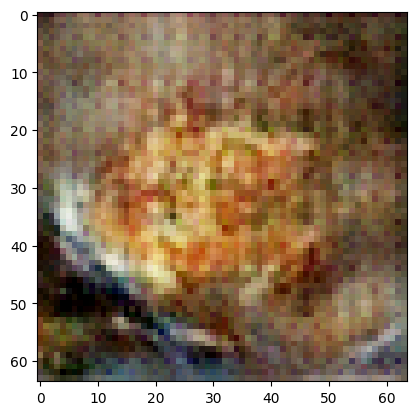

[11/100][200/257]	Loss_D: 0.6063	Loss_G: 2.4212	D(x): 0.6265	D(G(z)): 0.0797 / 0.1100
[11/100][250/257]	Loss_D: 0.7152	Loss_G: 5.1603	D(x): 0.8442	D(G(z)): 0.3858 / 0.0072
[12/100][0/257]	Loss_D: 0.5727	Loss_G: 3.7843	D(x): 0.8203	D(G(z)): 0.2905 / 0.0268
[12/100][50/257]	Loss_D: 1.0515	Loss_G: 1.0347	D(x): 0.4520	D(G(z)): 0.1272 / 0.3909
[12/100][100/257]	Loss_D: 0.7866	Loss_G: 4.8042	D(x): 0.8948	D(G(z)): 0.4590 / 0.0102
[12/100][150/257]	Loss_D: 0.5259	Loss_G: 2.1811	D(x): 0.6648	D(G(z)): 0.0699 / 0.1374
[12/100][200/257]	Loss_D: 0.4894	Loss_G: 3.8670	D(x): 0.8938	D(G(z)): 0.2898 / 0.0268
[12/100][250/257]	Loss_D: 0.6620	Loss_G: 2.5413	D(x): 0.6849	D(G(z)): 0.1897 / 0.1021
[13/100][0/257]	Loss_D: 0.4437	Loss_G: 2.1306	D(x): 0.7474	D(G(z)): 0.1194 / 0.1428
[13/100][50/257]	Loss_D: 0.6317	Loss_G: 1.4109	D(x): 0.7087	D(G(z)): 0.2158 / 0.2741
[13/100][100/257]	Loss_D: 0.4685	Loss_G: 2.6696	D(x): 0.8494	D(G(z)): 0.2453 / 0.0777
[13/100][150/257]	Loss_D: 0.3257	Loss_G: 3.5028	D(x): 0.7655

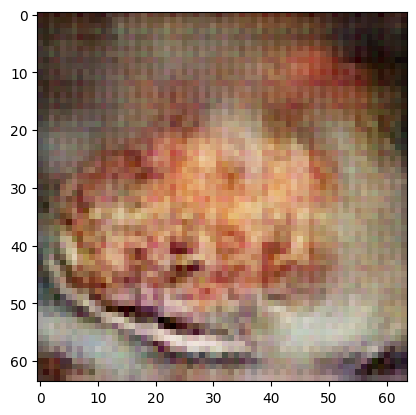

[13/100][200/257]	Loss_D: 0.3225	Loss_G: 3.6659	D(x): 0.7961	D(G(z)): 0.0706 / 0.0337
[13/100][250/257]	Loss_D: 0.5495	Loss_G: 3.1308	D(x): 0.7676	D(G(z)): 0.2056 / 0.0512
[14/100][0/257]	Loss_D: 0.2299	Loss_G: 3.7788	D(x): 0.8541	D(G(z)): 0.0606 / 0.0314
[14/100][50/257]	Loss_D: 1.0812	Loss_G: 1.5732	D(x): 0.4192	D(G(z)): 0.0305 / 0.2431
[14/100][100/257]	Loss_D: 0.7909	Loss_G: 1.6218	D(x): 0.5069	D(G(z)): 0.0172 / 0.2421
[14/100][150/257]	Loss_D: 0.2225	Loss_G: 3.6792	D(x): 0.8920	D(G(z)): 0.0948 / 0.0337
[14/100][200/257]	Loss_D: 0.4101	Loss_G: 2.6958	D(x): 0.7491	D(G(z)): 0.0924 / 0.0830
[14/100][250/257]	Loss_D: 0.4357	Loss_G: 3.5650	D(x): 0.8272	D(G(z)): 0.1905 / 0.0344
[15/100][0/257]	Loss_D: 0.5197	Loss_G: 3.2105	D(x): 0.9750	D(G(z)): 0.3212 / 0.0492
[15/100][50/257]	Loss_D: 2.4401	Loss_G: 2.9708	D(x): 0.1250	D(G(z)): 0.0019 / 0.0601
[15/100][100/257]	Loss_D: 0.3591	Loss_G: 4.1456	D(x): 0.9206	D(G(z)): 0.2324 / 0.0197


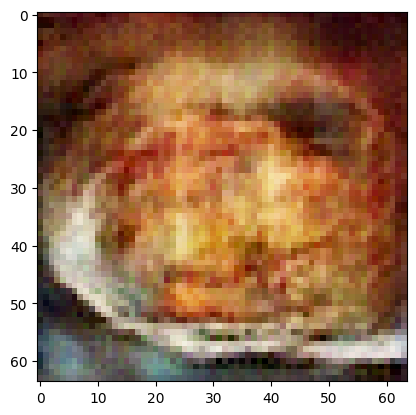

[15/100][150/257]	Loss_D: 0.3401	Loss_G: 4.2168	D(x): 0.7457	D(G(z)): 0.0264 / 0.0262
[15/100][200/257]	Loss_D: 0.7949	Loss_G: 6.0907	D(x): 0.9846	D(G(z)): 0.4790 / 0.0030
[15/100][250/257]	Loss_D: 0.5819	Loss_G: 5.2699	D(x): 0.9285	D(G(z)): 0.3655 / 0.0068
[16/100][0/257]	Loss_D: 0.3859	Loss_G: 2.7729	D(x): 0.7560	D(G(z)): 0.0810 / 0.0817
[16/100][50/257]	Loss_D: 0.5910	Loss_G: 2.1577	D(x): 0.6471	D(G(z)): 0.0608 / 0.1471
[16/100][100/257]	Loss_D: 0.4141	Loss_G: 4.5112	D(x): 0.9612	D(G(z)): 0.2979 / 0.0131
[16/100][150/257]	Loss_D: 0.1965	Loss_G: 4.6583	D(x): 0.9704	D(G(z)): 0.1442 / 0.0130
[16/100][200/257]	Loss_D: 0.4251	Loss_G: 4.9899	D(x): 0.9648	D(G(z)): 0.3003 / 0.0092
[16/100][250/257]	Loss_D: 0.5142	Loss_G: 3.3983	D(x): 0.8110	D(G(z)): 0.2326 / 0.0387
[17/100][0/257]	Loss_D: 0.2095	Loss_G: 3.8625	D(x): 0.8799	D(G(z)): 0.0698 / 0.0296
[17/100][50/257]	Loss_D: 0.4820	Loss_G: 2.3016	D(x): 0.7231	D(G(z)): 0.0728 / 0.1326
[17/100][100/257]	Loss_D: 0.4950	Loss_G: 5.7517	D(x): 0.9232

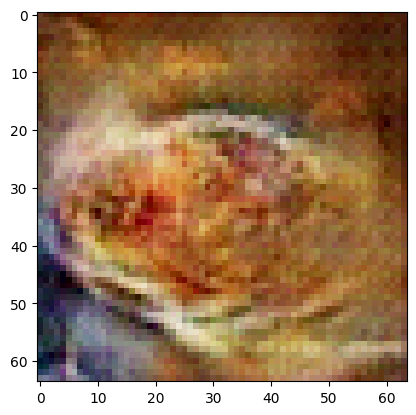

[17/100][150/257]	Loss_D: 0.3282	Loss_G: 4.3259	D(x): 0.7570	D(G(z)): 0.0240 / 0.0211
[17/100][200/257]	Loss_D: 0.2588	Loss_G: 3.8887	D(x): 0.8692	D(G(z)): 0.0949 / 0.0302
[17/100][250/257]	Loss_D: 1.0754	Loss_G: 7.4333	D(x): 0.9595	D(G(z)): 0.5808 / 0.0010
[18/100][0/257]	Loss_D: 0.2431	Loss_G: 3.7121	D(x): 0.8477	D(G(z)): 0.0647 / 0.0288
[18/100][50/257]	Loss_D: 0.6212	Loss_G: 2.6040	D(x): 0.6309	D(G(z)): 0.0465 / 0.0986
[18/100][100/257]	Loss_D: 1.9627	Loss_G: 3.6309	D(x): 0.2148	D(G(z)): 0.0025 / 0.0399
[18/100][150/257]	Loss_D: 0.0862	Loss_G: 5.5998	D(x): 0.9531	D(G(z)): 0.0356 / 0.0061
[18/100][200/257]	Loss_D: 0.3772	Loss_G: 5.2408	D(x): 0.9611	D(G(z)): 0.2746 / 0.0062
[18/100][250/257]	Loss_D: 0.4801	Loss_G: 4.3196	D(x): 0.8500	D(G(z)): 0.2335 / 0.0183
[19/100][0/257]	Loss_D: 0.2984	Loss_G: 3.9985	D(x): 0.8869	D(G(z)): 0.1475 / 0.0219
[19/100][50/257]	Loss_D: 0.3798	Loss_G: 2.9109	D(x): 0.7977	D(G(z)): 0.1188 / 0.0658
[19/100][100/257]	Loss_D: 0.1640	Loss_G: 5.2791	D(x): 0.9087

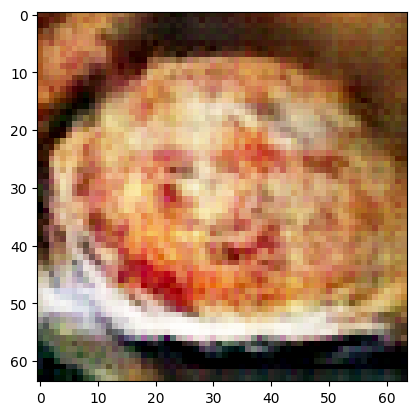

[19/100][150/257]	Loss_D: 0.8367	Loss_G: 5.7770	D(x): 0.4922	D(G(z)): 0.0018 / 0.0057
[19/100][200/257]	Loss_D: 0.7654	Loss_G: 9.3221	D(x): 0.9684	D(G(z)): 0.4819 / 0.0002
[19/100][250/257]	Loss_D: 0.6860	Loss_G: 4.3442	D(x): 0.5891	D(G(z)): 0.0152 / 0.0351
[20/100][0/257]	Loss_D: 0.6311	Loss_G: 6.1847	D(x): 0.9846	D(G(z)): 0.4008 / 0.0029
[20/100][50/257]	Loss_D: 0.4416	Loss_G: 2.9492	D(x): 0.7199	D(G(z)): 0.0663 / 0.0713
[20/100][100/257]	Loss_D: 0.4933	Loss_G: 6.5110	D(x): 0.9812	D(G(z)): 0.3531 / 0.0022
[20/100][150/257]	Loss_D: 0.0632	Loss_G: 5.8752	D(x): 0.9744	D(G(z)): 0.0351 / 0.0054
[20/100][200/257]	Loss_D: 1.7454	Loss_G: 9.6839	D(x): 0.9993	D(G(z)): 0.7177 / 0.0002
[20/100][250/257]	Loss_D: 0.6195	Loss_G: 2.6311	D(x): 0.6515	D(G(z)): 0.0918 / 0.1036
[21/100][0/257]	Loss_D: 0.1995	Loss_G: 5.0727	D(x): 0.9604	D(G(z)): 0.1411 / 0.0082
[21/100][50/257]	Loss_D: 0.2753	Loss_G: 4.4005	D(x): 0.8886	D(G(z)): 0.1313 / 0.0163
[21/100][100/257]	Loss_D: 0.3458	Loss_G: 3.8741	D(x): 0.8177

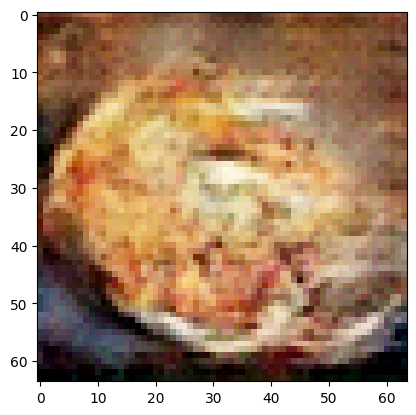

[21/100][150/257]	Loss_D: 1.6753	Loss_G: 5.9140	D(x): 0.2592	D(G(z)): 0.0003 / 0.0041
[21/100][200/257]	Loss_D: 0.3680	Loss_G: 4.3225	D(x): 0.8750	D(G(z)): 0.1882 / 0.0169
[21/100][250/257]	Loss_D: 1.3742	Loss_G: 3.2452	D(x): 0.3222	D(G(z)): 0.0040 / 0.0824
[22/100][0/257]	Loss_D: 0.5115	Loss_G: 6.0585	D(x): 0.9589	D(G(z)): 0.3229 / 0.0035
[22/100][50/257]	Loss_D: 0.3051	Loss_G: 3.4524	D(x): 0.8230	D(G(z)): 0.0814 / 0.0435
[22/100][100/257]	Loss_D: 0.2972	Loss_G: 4.1493	D(x): 0.8754	D(G(z)): 0.1273 / 0.0238
[22/100][150/257]	Loss_D: 0.1286	Loss_G: 5.2278	D(x): 0.9908	D(G(z)): 0.1070 / 0.0077
[22/100][200/257]	Loss_D: 0.2828	Loss_G: 6.3798	D(x): 0.9711	D(G(z)): 0.2058 / 0.0024
[22/100][250/257]	Loss_D: 0.8502	Loss_G: 9.8554	D(x): 0.9795	D(G(z)): 0.4960 / 0.0001
[23/100][0/257]	Loss_D: 0.4759	Loss_G: 5.9780	D(x): 0.9821	D(G(z)): 0.2591 / 0.0064
[23/100][50/257]	Loss_D: 0.3730	Loss_G: 3.3066	D(x): 0.7712	D(G(z)): 0.0604 / 0.0563


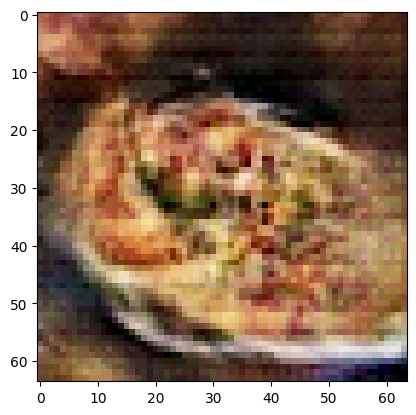

[23/100][100/257]	Loss_D: 0.2436	Loss_G: 3.8971	D(x): 0.9065	D(G(z)): 0.1242 / 0.0240
[23/100][150/257]	Loss_D: 0.1396	Loss_G: 6.0058	D(x): 0.9913	D(G(z)): 0.1179 / 0.0033
[23/100][200/257]	Loss_D: 0.3629	Loss_G: 6.3880	D(x): 0.9366	D(G(z)): 0.2335 / 0.0029
[23/100][250/257]	Loss_D: 0.4101	Loss_G: 4.9365	D(x): 0.8923	D(G(z)): 0.2295 / 0.0102
[24/100][0/257]	Loss_D: 0.1207	Loss_G: 5.8703	D(x): 0.9390	D(G(z)): 0.0512 / 0.0089
[24/100][50/257]	Loss_D: 0.4467	Loss_G: 2.7492	D(x): 0.7131	D(G(z)): 0.0496 / 0.0822
[24/100][100/257]	Loss_D: 0.2088	Loss_G: 3.6086	D(x): 0.9354	D(G(z)): 0.1208 / 0.0404
[24/100][150/257]	Loss_D: 0.4884	Loss_G: 9.8767	D(x): 0.6662	D(G(z)): 0.0003 / 0.0002
[24/100][200/257]	Loss_D: 0.5541	Loss_G: 6.1131	D(x): 0.9610	D(G(z)): 0.3453 / 0.0038
[24/100][250/257]	Loss_D: 0.4782	Loss_G: 3.6207	D(x): 0.7692	D(G(z)): 0.1311 / 0.0374
[25/100][0/257]	Loss_D: 0.8956	Loss_G: 9.5856	D(x): 0.9737	D(G(z)): 0.5086 / 0.0002
[25/100][50/257]	Loss_D: 0.3797	Loss_G: 4.0921	D(x): 0.8605

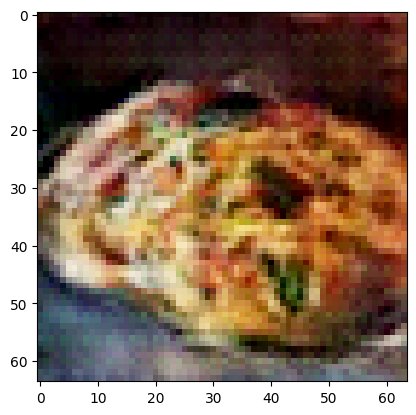

[25/100][100/257]	Loss_D: 0.3671	Loss_G: 5.0920	D(x): 0.9467	D(G(z)): 0.2453 / 0.0085
[25/100][150/257]	Loss_D: 0.1261	Loss_G: 7.6976	D(x): 0.8992	D(G(z)): 0.0045 / 0.0008
[25/100][200/257]	Loss_D: 0.2510	Loss_G: 4.2758	D(x): 0.9483	D(G(z)): 0.1723 / 0.0184
[25/100][250/257]	Loss_D: 0.4149	Loss_G: 6.2703	D(x): 0.9499	D(G(z)): 0.2692 / 0.0033
[26/100][0/257]	Loss_D: 0.1554	Loss_G: 6.4479	D(x): 0.8812	D(G(z)): 0.0199 / 0.0037
[26/100][50/257]	Loss_D: 0.2854	Loss_G: 2.3677	D(x): 0.8451	D(G(z)): 0.0458 / 0.1119
[26/100][100/257]	Loss_D: 0.2627	Loss_G: 4.2534	D(x): 0.8212	D(G(z)): 0.0230 / 0.0201
[26/100][150/257]	Loss_D: 0.0543	Loss_G: 6.6404	D(x): 0.9665	D(G(z)): 0.0177 / 0.0020
[26/100][200/257]	Loss_D: 0.5177	Loss_G: 5.1461	D(x): 0.6537	D(G(z)): 0.0051 / 0.0118
[26/100][250/257]	Loss_D: 0.7497	Loss_G: 9.8491	D(x): 0.9841	D(G(z)): 0.4768 / 0.0001
[27/100][0/257]	Loss_D: 0.1305	Loss_G: 5.1646	D(x): 0.9794	D(G(z)): 0.0999 / 0.0078
[27/100][50/257]	Loss_D: 0.1766	Loss_G: 5.9783	D(x): 0.8741

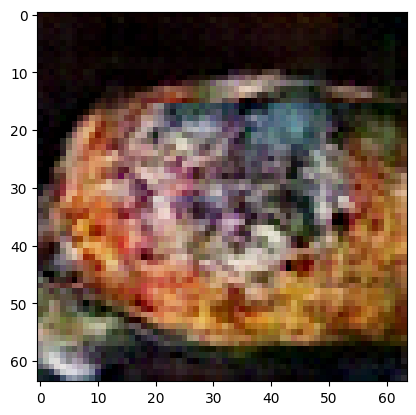

[27/100][100/257]	Loss_D: 0.6004	Loss_G: 5.0843	D(x): 0.5834	D(G(z)): 0.0029 / 0.0132
[27/100][150/257]	Loss_D: 0.0201	Loss_G: 6.8999	D(x): 0.9920	D(G(z)): 0.0119 / 0.0014
[27/100][200/257]	Loss_D: 0.5260	Loss_G: 7.2078	D(x): 0.9453	D(G(z)): 0.3256 / 0.0020
[27/100][250/257]	Loss_D: 0.6567	Loss_G: 8.3649	D(x): 0.9386	D(G(z)): 0.3551 / 0.0007
[28/100][0/257]	Loss_D: 0.5342	Loss_G: 8.5044	D(x): 0.9944	D(G(z)): 0.3569 / 0.0005
[28/100][50/257]	Loss_D: 0.4976	Loss_G: 6.8838	D(x): 0.9412	D(G(z)): 0.3125 / 0.0014
[28/100][100/257]	Loss_D: 0.1758	Loss_G: 4.8776	D(x): 0.9715	D(G(z)): 0.1255 / 0.0116
[28/100][150/257]	Loss_D: 0.1142	Loss_G: 6.3004	D(x): 0.9163	D(G(z)): 0.0126 / 0.0036
[28/100][200/257]	Loss_D: 0.9355	Loss_G: 10.0902	D(x): 0.9813	D(G(z)): 0.5345 / 0.0001
[28/100][250/257]	Loss_D: 0.3763	Loss_G: 7.6227	D(x): 0.9886	D(G(z)): 0.2560 / 0.0009
[29/100][0/257]	Loss_D: 0.2374	Loss_G: 5.4906	D(x): 0.8696	D(G(z)): 0.0314 / 0.0110


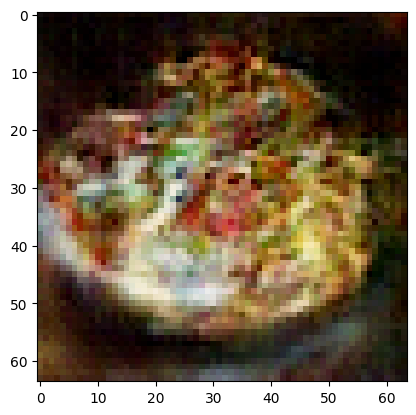

[29/100][50/257]	Loss_D: 0.4482	Loss_G: 2.8132	D(x): 0.7504	D(G(z)): 0.0575 / 0.0858
[29/100][100/257]	Loss_D: 0.2253	Loss_G: 4.7736	D(x): 0.9410	D(G(z)): 0.1371 / 0.0114
[29/100][150/257]	Loss_D: 0.0297	Loss_G: 9.2643	D(x): 0.9765	D(G(z)): 0.0049 / 0.0004
[29/100][200/257]	Loss_D: 0.7055	Loss_G: 9.3285	D(x): 0.9944	D(G(z)): 0.4512 / 0.0002
[29/100][250/257]	Loss_D: 0.9485	Loss_G: 12.1280	D(x): 0.9797	D(G(z)): 0.5493 / 0.0000
[30/100][0/257]	Loss_D: 0.0951	Loss_G: 5.9051	D(x): 0.9396	D(G(z)): 0.0276 / 0.0074
[30/100][50/257]	Loss_D: 0.2730	Loss_G: 6.1349	D(x): 0.8796	D(G(z)): 0.1127 / 0.0034
[30/100][100/257]	Loss_D: 0.7994	Loss_G: 12.2993	D(x): 0.9801	D(G(z)): 0.4740 / 0.0000
[30/100][150/257]	Loss_D: 0.0559	Loss_G: 7.6232	D(x): 0.9606	D(G(z)): 0.0135 / 0.0010
[30/100][200/257]	Loss_D: 0.4611	Loss_G: 5.3829	D(x): 0.8555	D(G(z)): 0.2357 / 0.0078
[30/100][250/257]	Loss_D: 0.4822	Loss_G: 6.5292	D(x): 0.8934	D(G(z)): 0.2733 / 0.0043
[31/100][0/257]	Loss_D: 1.0820	Loss_G: 12.1236	D(x): 0.9

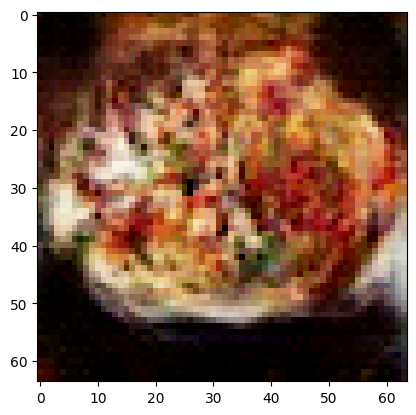

[31/100][50/257]	Loss_D: 0.3219	Loss_G: 4.3375	D(x): 0.8411	D(G(z)): 0.1127 / 0.0182
[31/100][100/257]	Loss_D: 0.3489	Loss_G: 3.9439	D(x): 0.7837	D(G(z)): 0.0341 / 0.0325
[31/100][150/257]	Loss_D: 0.1445	Loss_G: 5.3610	D(x): 0.9992	D(G(z)): 0.1252 / 0.0107
[31/100][200/257]	Loss_D: 0.4328	Loss_G: 3.6154	D(x): 0.8294	D(G(z)): 0.1493 / 0.0363
[31/100][250/257]	Loss_D: 0.5239	Loss_G: 7.9211	D(x): 0.9308	D(G(z)): 0.3298 / 0.0006
[32/100][0/257]	Loss_D: 0.1131	Loss_G: 4.8705	D(x): 0.9699	D(G(z)): 0.0676 / 0.0175
[32/100][50/257]	Loss_D: 0.2663	Loss_G: 2.3965	D(x): 0.8476	D(G(z)): 0.0637 / 0.1403
[32/100][100/257]	Loss_D: 0.4610	Loss_G: 6.9397	D(x): 0.9837	D(G(z)): 0.2879 / 0.0018
[32/100][150/257]	Loss_D: 0.2005	Loss_G: 12.1592	D(x): 0.8339	D(G(z)): 0.0003 / 0.0000
[32/100][200/257]	Loss_D: 0.3526	Loss_G: 3.6268	D(x): 0.7679	D(G(z)): 0.0405 / 0.0570
[32/100][250/257]	Loss_D: 1.2240	Loss_G: 13.1857	D(x): 0.9905	D(G(z)): 0.6412 / 0.0000
[33/100][0/257]	Loss_D: 0.1892	Loss_G: 5.3446	D(x): 0.97

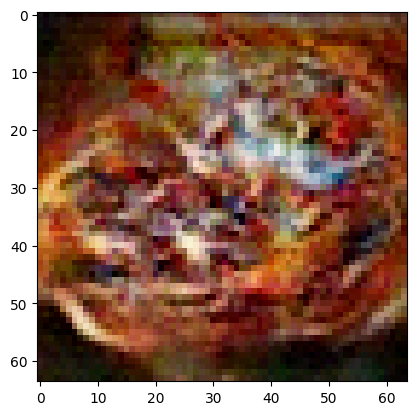

[33/100][50/257]	Loss_D: 0.7641	Loss_G: 2.0190	D(x): 0.6164	D(G(z)): 0.0157 / 0.1677
[33/100][100/257]	Loss_D: 0.2460	Loss_G: 6.2988	D(x): 0.9791	D(G(z)): 0.1901 / 0.0026
[33/100][150/257]	Loss_D: 0.5961	Loss_G: 9.7678	D(x): 0.9999	D(G(z)): 0.3442 / 0.0005
[33/100][200/257]	Loss_D: 0.2492	Loss_G: 9.4679	D(x): 0.8408	D(G(z)): 0.0044 / 0.0009
[33/100][250/257]	Loss_D: 0.1334	Loss_G: 5.9141	D(x): 0.9162	D(G(z)): 0.0348 / 0.0061
[34/100][0/257]	Loss_D: 0.1878	Loss_G: 5.3421	D(x): 0.8856	D(G(z)): 0.0115 / 0.0089
[34/100][50/257]	Loss_D: 0.2952	Loss_G: 4.7962	D(x): 0.7934	D(G(z)): 0.0125 / 0.0179
[34/100][100/257]	Loss_D: 0.1400	Loss_G: 5.9803	D(x): 0.9600	D(G(z)): 0.0897 / 0.0036
[34/100][150/257]	Loss_D: 0.3815	Loss_G: 8.2376	D(x): 1.0000	D(G(z)): 0.2664 / 0.0023
[34/100][200/257]	Loss_D: 0.5511	Loss_G: 9.3336	D(x): 0.9464	D(G(z)): 0.3561 / 0.0002
[34/100][250/257]	Loss_D: 0.7047	Loss_G: 9.3731	D(x): 0.9777	D(G(z)): 0.4419 / 0.0002
[35/100][0/257]	Loss_D: 0.3049	Loss_G: 7.2454	D(x): 0.9854

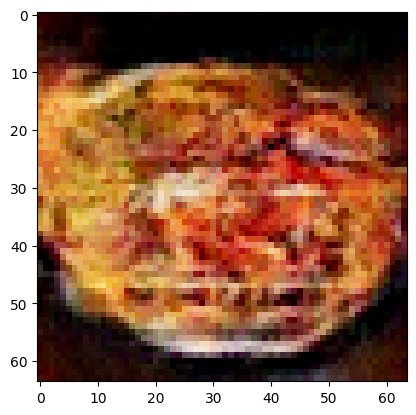

[35/100][50/257]	Loss_D: 0.2932	Loss_G: 4.3450	D(x): 0.8363	D(G(z)): 0.0851 / 0.0206
[35/100][100/257]	Loss_D: 0.1479	Loss_G: 4.5671	D(x): 0.9171	D(G(z)): 0.0483 / 0.0141
[35/100][150/257]	Loss_D: 0.0796	Loss_G: 10.2476	D(x): 0.9998	D(G(z)): 0.0549 / 0.0007
[35/100][200/257]	Loss_D: 0.4563	Loss_G: 6.6392	D(x): 0.9598	D(G(z)): 0.2847 / 0.0030
[35/100][250/257]	Loss_D: 0.3656	Loss_G: 6.7663	D(x): 0.9333	D(G(z)): 0.2178 / 0.0022
[36/100][0/257]	Loss_D: 0.2287	Loss_G: 6.4728	D(x): 0.9946	D(G(z)): 0.1797 / 0.0029
[36/100][50/257]	Loss_D: 0.4411	Loss_G: 4.1194	D(x): 0.7006	D(G(z)): 0.0129 / 0.0629
[36/100][100/257]	Loss_D: 0.1571	Loss_G: 5.3887	D(x): 0.9750	D(G(z)): 0.1136 / 0.0112
[36/100][150/257]	Loss_D: 0.0855	Loss_G: 5.8179	D(x): 0.9937	D(G(z)): 0.0742 / 0.0038
[36/100][200/257]	Loss_D: 0.5097	Loss_G: 7.4404	D(x): 0.9725	D(G(z)): 0.3464 / 0.0014


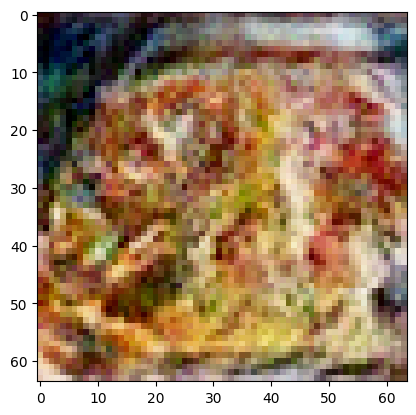

[36/100][250/257]	Loss_D: 0.4299	Loss_G: 6.8708	D(x): 0.9863	D(G(z)): 0.3068 / 0.0014
[37/100][0/257]	Loss_D: 0.2358	Loss_G: 5.5892	D(x): 0.9596	D(G(z)): 0.1593 / 0.0086
[37/100][50/257]	Loss_D: 0.1105	Loss_G: 5.6827	D(x): 0.9541	D(G(z)): 0.0563 / 0.0070
[37/100][100/257]	Loss_D: 0.1020	Loss_G: 4.5352	D(x): 0.9476	D(G(z)): 0.0447 / 0.0135
[37/100][150/257]	Loss_D: 0.0566	Loss_G: 8.2238	D(x): 0.9567	D(G(z)): 0.0054 / 0.0004
[37/100][200/257]	Loss_D: 0.3795	Loss_G: 6.5254	D(x): 0.9342	D(G(z)): 0.2449 / 0.0052
[37/100][250/257]	Loss_D: 0.8740	Loss_G: 11.3578	D(x): 0.9185	D(G(z)): 0.5199 / 0.0001
[38/100][0/257]	Loss_D: 0.2490	Loss_G: 4.9779	D(x): 0.9243	D(G(z)): 0.1019 / 0.0125
[38/100][50/257]	Loss_D: 0.8911	Loss_G: 7.3845	D(x): 0.5027	D(G(z)): 0.0007 / 0.0178
[38/100][100/257]	Loss_D: 0.6423	Loss_G: 10.0977	D(x): 0.9096	D(G(z)): 0.3955 / 0.0004
[38/100][150/257]	Loss_D: 0.8251	Loss_G: 11.0730	D(x): 0.9913	D(G(z)): 0.4426 / 0.0003
[38/100][200/257]	Loss_D: 0.6056	Loss_G: 3.9720	D(x): 0.6

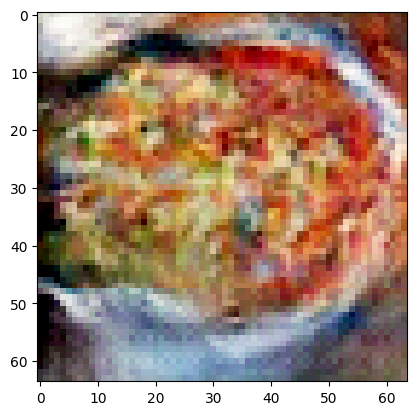

[38/100][250/257]	Loss_D: 0.5635	Loss_G: 7.2350	D(x): 0.9329	D(G(z)): 0.3035 / 0.0015
[39/100][0/257]	Loss_D: 0.1002	Loss_G: 7.9156	D(x): 0.9548	D(G(z)): 0.0446 / 0.0039
[39/100][50/257]	Loss_D: 0.3672	Loss_G: 4.8572	D(x): 0.8039	D(G(z)): 0.0363 / 0.0859
[39/100][100/257]	Loss_D: 0.2336	Loss_G: 5.0490	D(x): 0.9471	D(G(z)): 0.1387 / 0.0086
[39/100][150/257]	Loss_D: 2.0425	Loss_G: 15.0498	D(x): 0.2512	D(G(z)): 0.0000 / 0.0000
[39/100][200/257]	Loss_D: 0.1963	Loss_G: 5.9517	D(x): 0.9711	D(G(z)): 0.1431 / 0.0043
[39/100][250/257]	Loss_D: 0.8769	Loss_G: 11.7945	D(x): 0.9924	D(G(z)): 0.5345 / 0.0000
[40/100][0/257]	Loss_D: 0.2549	Loss_G: 5.6987	D(x): 0.9480	D(G(z)): 0.1509 / 0.0045
[40/100][50/257]	Loss_D: 0.5282	Loss_G: 6.8725	D(x): 0.8837	D(G(z)): 0.2994 / 0.0021
[40/100][100/257]	Loss_D: 1.2990	Loss_G: 12.8366	D(x): 0.9934	D(G(z)): 0.6151 / 0.0000
[40/100][150/257]	Loss_D: 0.1149	Loss_G: 5.8829	D(x): 0.9956	D(G(z)): 0.1015 / 0.0039
[40/100][200/257]	Loss_D: 0.4311	Loss_G: 7.0665	D(x): 0.9

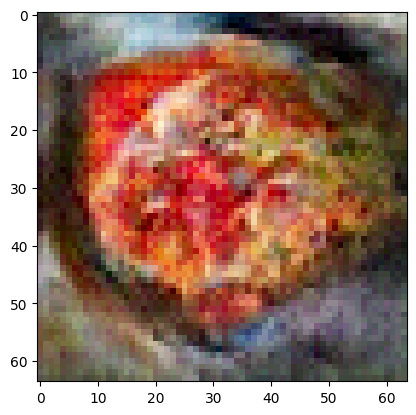

[40/100][250/257]	Loss_D: 0.0681	Loss_G: 4.4291	D(x): 0.9671	D(G(z)): 0.0326 / 0.0152
[41/100][0/257]	Loss_D: 0.1080	Loss_G: 4.7625	D(x): 0.9310	D(G(z)): 0.0278 / 0.0231
[41/100][50/257]	Loss_D: 0.8143	Loss_G: 3.1376	D(x): 0.6112	D(G(z)): 0.0086 / 0.0664
[41/100][100/257]	Loss_D: 0.3969	Loss_G: 7.2835	D(x): 0.9600	D(G(z)): 0.2511 / 0.0012
[41/100][150/257]	Loss_D: 0.0573	Loss_G: 5.5311	D(x): 0.9880	D(G(z)): 0.0433 / 0.0071
[41/100][200/257]	Loss_D: 0.1778	Loss_G: 4.8234	D(x): 0.9631	D(G(z)): 0.1255 / 0.0118
[41/100][250/257]	Loss_D: 0.1468	Loss_G: 7.5603	D(x): 0.8919	D(G(z)): 0.0169 / 0.0047
[42/100][0/257]	Loss_D: 0.7681	Loss_G: 2.0821	D(x): 0.5743	D(G(z)): 0.0130 / 0.2408
[42/100][50/257]	Loss_D: 0.1743	Loss_G: 4.0417	D(x): 0.9544	D(G(z)): 0.0928 / 0.0313
[42/100][100/257]	Loss_D: 0.1446	Loss_G: 4.2884	D(x): 0.9596	D(G(z)): 0.0699 / 0.0236
[42/100][150/257]	Loss_D: 0.2836	Loss_G: 8.1249	D(x): 0.9777	D(G(z)): 0.2113 / 0.0009
[42/100][200/257]	Loss_D: 0.0667	Loss_G: 5.3480	D(x): 0.9903

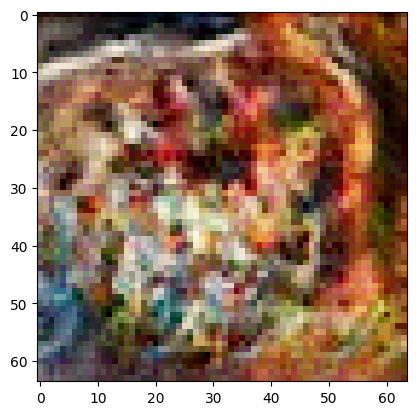

[42/100][250/257]	Loss_D: 0.1125	Loss_G: 5.8150	D(x): 0.9921	D(G(z)): 0.0831 / 0.0140
[43/100][0/257]	Loss_D: 0.0977	Loss_G: 4.2955	D(x): 0.9833	D(G(z)): 0.0733 / 0.0219
[43/100][50/257]	Loss_D: 0.3005	Loss_G: 5.2991	D(x): 0.8689	D(G(z)): 0.0852 / 0.0069
[43/100][100/257]	Loss_D: 0.6047	Loss_G: 9.7635	D(x): 0.7718	D(G(z)): 0.1387 / 0.0086
[43/100][150/257]	Loss_D: 0.1210	Loss_G: 7.9025	D(x): 0.9964	D(G(z)): 0.0989 / 0.0006
[43/100][200/257]	Loss_D: 0.4578	Loss_G: 9.6871	D(x): 0.9817	D(G(z)): 0.3401 / 0.0003
[43/100][250/257]	Loss_D: 0.6602	Loss_G: 10.8680	D(x): 0.9739	D(G(z)): 0.3872 / 0.0001
[44/100][0/257]	Loss_D: 0.2673	Loss_G: 8.0953	D(x): 0.9834	D(G(z)): 0.1910 / 0.0008
[44/100][50/257]	Loss_D: 0.1056	Loss_G: 4.0251	D(x): 0.9258	D(G(z)): 0.0202 / 0.0201
[44/100][100/257]	Loss_D: 0.1386	Loss_G: 6.0227	D(x): 0.9861	D(G(z)): 0.1152 / 0.0033
[44/100][150/257]	Loss_D: 0.0695	Loss_G: 7.5469	D(x): 0.9555	D(G(z)): 0.0159 / 0.0011


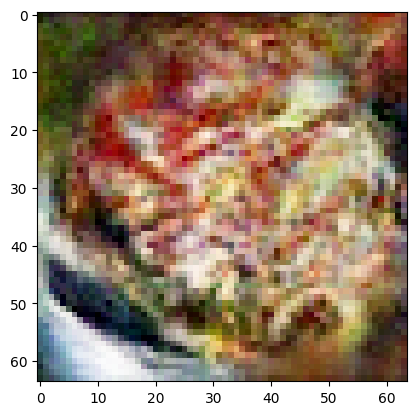

[44/100][200/257]	Loss_D: 0.1799	Loss_G: 2.9555	D(x): 0.9111	D(G(z)): 0.0417 / 0.0630
[44/100][250/257]	Loss_D: 0.4967	Loss_G: 9.8934	D(x): 0.9632	D(G(z)): 0.3439 / 0.0001
[45/100][0/257]	Loss_D: 0.0636	Loss_G: 8.7348	D(x): 0.9519	D(G(z)): 0.0109 / 0.0093
[45/100][50/257]	Loss_D: 0.3388	Loss_G: 11.5432	D(x): 0.7709	D(G(z)): 0.0002 / 0.0007
[45/100][100/257]	Loss_D: 0.3917	Loss_G: 10.4726	D(x): 0.9902	D(G(z)): 0.2949 / 0.0004
[45/100][150/257]	Loss_D: 0.0480	Loss_G: 6.6711	D(x): 0.9682	D(G(z)): 0.0103 / 0.0068
[45/100][200/257]	Loss_D: 0.0542	Loss_G: 5.0887	D(x): 0.9813	D(G(z)): 0.0333 / 0.0096
[45/100][250/257]	Loss_D: 0.0736	Loss_G: 6.4918	D(x): 0.9644	D(G(z)): 0.0321 / 0.0076
[46/100][0/257]	Loss_D: 0.1332	Loss_G: 5.8432	D(x): 0.9196	D(G(z)): 0.0171 / 0.0036
[46/100][50/257]	Loss_D: 0.3685	Loss_G: 5.9589	D(x): 0.8845	D(G(z)): 0.1688 / 0.0037
[46/100][100/257]	Loss_D: 0.3457	Loss_G: 4.6436	D(x): 0.7435	D(G(z)): 0.0053 / 0.0324
[46/100][150/257]	Loss_D: 0.1281	Loss_G: 7.6421	D(x): 0.91

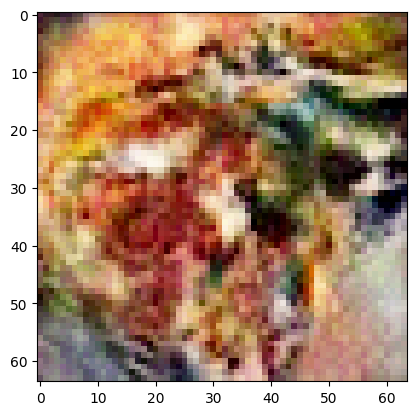

[46/100][200/257]	Loss_D: 0.1044	Loss_G: 6.8312	D(x): 0.9664	D(G(z)): 0.0639 / 0.0083
[46/100][250/257]	Loss_D: 1.0682	Loss_G: 12.0990	D(x): 0.9767	D(G(z)): 0.5985 / 0.0000
[47/100][0/257]	Loss_D: 0.3115	Loss_G: 7.6762	D(x): 0.9496	D(G(z)): 0.1643 / 0.0007
[47/100][50/257]	Loss_D: 0.3900	Loss_G: 7.8663	D(x): 0.8856	D(G(z)): 0.1721 / 0.0029
[47/100][100/257]	Loss_D: 0.3372	Loss_G: 8.2520	D(x): 0.9717	D(G(z)): 0.2570 / 0.0003
[47/100][150/257]	Loss_D: 0.0411	Loss_G: 6.4119	D(x): 0.9910	D(G(z)): 0.0313 / 0.0021
[47/100][200/257]	Loss_D: 0.1407	Loss_G: 4.9649	D(x): 0.9750	D(G(z)): 0.1068 / 0.0080
[47/100][250/257]	Loss_D: 0.0370	Loss_G: 7.2327	D(x): 0.9764	D(G(z)): 0.0110 / 0.0050
[48/100][0/257]	Loss_D: 0.1870	Loss_G: 6.0677	D(x): 0.8872	D(G(z)): 0.0218 / 0.0127
[48/100][50/257]	Loss_D: 0.1639	Loss_G: 4.5907	D(x): 0.9073	D(G(z)): 0.0314 / 0.0123
[48/100][100/257]	Loss_D: 0.3837	Loss_G: 7.2622	D(x): 0.9369	D(G(z)): 0.1996 / 0.0016
[48/100][150/257]	Loss_D: 0.0416	Loss_G: 10.1976	D(x): 0.96

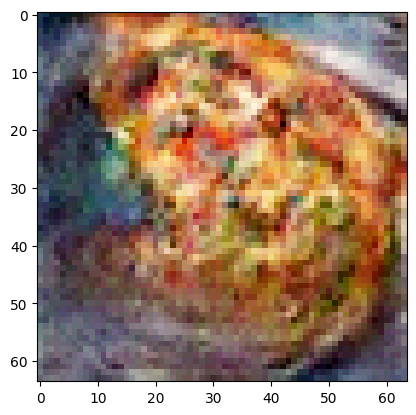

[48/100][200/257]	Loss_D: 0.6041	Loss_G: 7.1340	D(x): 0.7577	D(G(z)): 0.0243 / 0.0179
[48/100][250/257]	Loss_D: 2.1073	Loss_G: 19.2262	D(x): 0.9784	D(G(z)): 0.8093 / 0.0000
[49/100][0/257]	Loss_D: 0.1282	Loss_G: 9.2486	D(x): 0.9480	D(G(z)): 0.0542 / 0.0060
[49/100][50/257]	Loss_D: 0.2549	Loss_G: 4.2950	D(x): 0.9032	D(G(z)): 0.0914 / 0.0159
[49/100][100/257]	Loss_D: 0.1302	Loss_G: 6.2351	D(x): 0.9329	D(G(z)): 0.0458 / 0.0035
[49/100][150/257]	Loss_D: 0.2085	Loss_G: 8.8315	D(x): 0.8581	D(G(z)): 0.0060 / 0.0049
[49/100][200/257]	Loss_D: 0.1735	Loss_G: 4.9349	D(x): 0.9699	D(G(z)): 0.1298 / 0.0079
[49/100][250/257]	Loss_D: 0.4002	Loss_G: 8.0111	D(x): 0.9845	D(G(z)): 0.2882 / 0.0004
[50/100][0/257]	Loss_D: 1.5791	Loss_G: 15.7233	D(x): 0.9864	D(G(z)): 0.6925 / 0.0000
[50/100][50/257]	Loss_D: 0.6557	Loss_G: 3.9828	D(x): 0.7633	D(G(z)): 0.1656 / 0.0424
[50/100][100/257]	Loss_D: 0.4067	Loss_G: 7.3432	D(x): 0.7474	D(G(z)): 0.0021 / 0.0008
[50/100][150/257]	Loss_D: 0.1442	Loss_G: 6.7626	D(x): 0.99

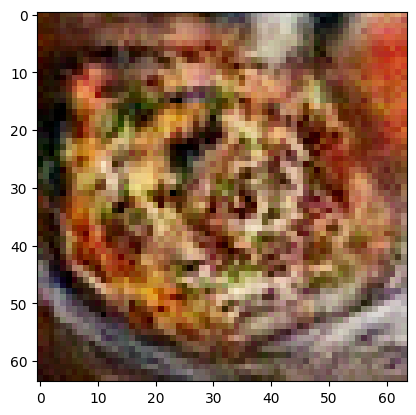

[50/100][200/257]	Loss_D: 0.4939	Loss_G: 7.2528	D(x): 0.9335	D(G(z)): 0.3125 / 0.0038
[50/100][250/257]	Loss_D: 0.3427	Loss_G: 8.0353	D(x): 0.9946	D(G(z)): 0.2530 / 0.0021
[51/100][0/257]	Loss_D: 0.2099	Loss_G: 5.1726	D(x): 0.9331	D(G(z)): 0.0967 / 0.0106
[51/100][50/257]	Loss_D: 0.2289	Loss_G: 7.1207	D(x): 0.8349	D(G(z)): 0.0150 / 0.0040
[51/100][100/257]	Loss_D: 0.1148	Loss_G: 5.2337	D(x): 0.9256	D(G(z)): 0.0106 / 0.0092
[51/100][150/257]	Loss_D: 0.0723	Loss_G: 7.2380	D(x): 0.9991	D(G(z)): 0.0593 / 0.0034
[51/100][200/257]	Loss_D: 0.1697	Loss_G: 8.8456	D(x): 0.8653	D(G(z)): 0.0083 / 0.0073
[51/100][250/257]	Loss_D: 0.5135	Loss_G: 10.5747	D(x): 0.9935	D(G(z)): 0.3616 / 0.0005
[52/100][0/257]	Loss_D: 0.0581	Loss_G: 8.3195	D(x): 0.9489	D(G(z)): 0.0020 / 0.0006
[52/100][50/257]	Loss_D: 0.2181	Loss_G: 4.9629	D(x): 0.8841	D(G(z)): 0.0597 / 0.0201
[52/100][100/257]	Loss_D: 0.2288	Loss_G: 9.5041	D(x): 0.9826	D(G(z)): 0.1536 / 0.0016


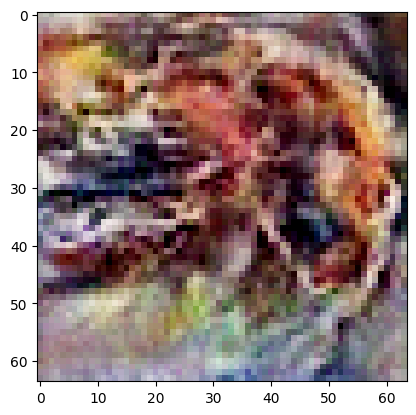

[52/100][150/257]	Loss_D: 0.3414	Loss_G: 8.6861	D(x): 0.9999	D(G(z)): 0.2372 / 0.0014
[52/100][200/257]	Loss_D: 0.1917	Loss_G: 4.5311	D(x): 0.9317	D(G(z)): 0.0964 / 0.0213
[52/100][250/257]	Loss_D: 0.7795	Loss_G: 11.9931	D(x): 0.9928	D(G(z)): 0.5195 / 0.0000
[53/100][0/257]	Loss_D: 0.2576	Loss_G: 9.7667	D(x): 0.8295	D(G(z)): 0.0006 / 0.0006
[53/100][50/257]	Loss_D: 0.5027	Loss_G: 4.6353	D(x): 0.8147	D(G(z)): 0.2090 / 0.0134
[53/100][100/257]	Loss_D: 0.5216	Loss_G: 7.8954	D(x): 0.6644	D(G(z)): 0.0092 / 0.0093
[53/100][150/257]	Loss_D: 0.0632	Loss_G: 6.5668	D(x): 0.9631	D(G(z)): 0.0204 / 0.0026
[53/100][200/257]	Loss_D: 0.2490	Loss_G: 4.7768	D(x): 0.8681	D(G(z)): 0.0650 / 0.0227
[53/100][250/257]	Loss_D: 1.4252	Loss_G: 15.8489	D(x): 0.9763	D(G(z)): 0.6814 / 0.0000
[54/100][0/257]	Loss_D: 0.3453	Loss_G: 7.1112	D(x): 0.9040	D(G(z)): 0.1390 / 0.0027
[54/100][50/257]	Loss_D: 0.4027	Loss_G: 7.8949	D(x): 0.8957	D(G(z)): 0.1984 / 0.0041
[54/100][100/257]	Loss_D: 0.0834	Loss_G: 6.0389	D(x): 0.93

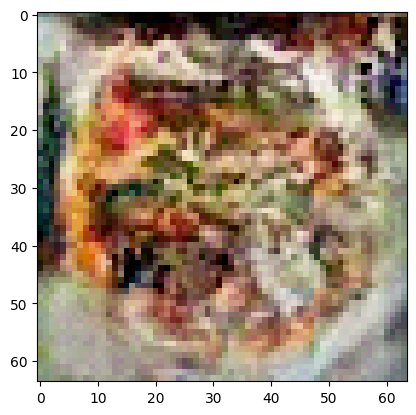

[54/100][150/257]	Loss_D: 0.0235	Loss_G: 5.9340	D(x): 0.9923	D(G(z)): 0.0153 / 0.0041
[54/100][200/257]	Loss_D: 0.3977	Loss_G: 8.9327	D(x): 0.9654	D(G(z)): 0.2925 / 0.0005
[54/100][250/257]	Loss_D: 0.1598	Loss_G: 5.9691	D(x): 0.9872	D(G(z)): 0.1130 / 0.0052
[55/100][0/257]	Loss_D: 0.2410	Loss_G: 4.5462	D(x): 0.8829	D(G(z)): 0.0633 / 0.0140
[55/100][50/257]	Loss_D: 0.1930	Loss_G: 5.5395	D(x): 0.9242	D(G(z)): 0.0955 / 0.0065
[55/100][100/257]	Loss_D: 0.0587	Loss_G: 5.1384	D(x): 0.9892	D(G(z)): 0.0446 / 0.0193
[55/100][150/257]	Loss_D: 0.0074	Loss_G: 7.3054	D(x): 0.9938	D(G(z)): 0.0010 / 0.0012
[55/100][200/257]	Loss_D: 0.0356	Loss_G: 9.3906	D(x): 0.9732	D(G(z)): 0.0053 / 0.0078
[55/100][250/257]	Loss_D: 0.1607	Loss_G: 6.8556	D(x): 0.9870	D(G(z)): 0.1130 / 0.0020
[56/100][0/257]	Loss_D: 0.1119	Loss_G: 7.3128	D(x): 0.9048	D(G(z)): 0.0029 / 0.0008
[56/100][50/257]	Loss_D: 0.1153	Loss_G: 7.1000	D(x): 0.9197	D(G(z)): 0.0086 / 0.0013
[56/100][100/257]	Loss_D: 0.3955	Loss_G: 7.7805	D(x): 0.9952

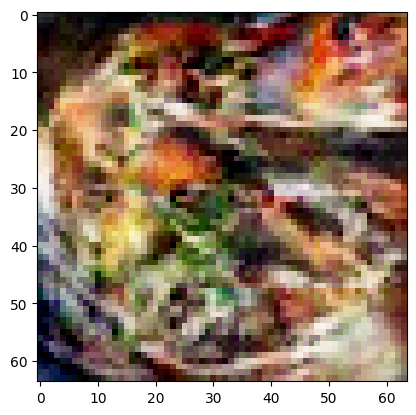

[56/100][150/257]	Loss_D: 0.1077	Loss_G: 5.1267	D(x): 0.9989	D(G(z)): 0.0976 / 0.0080
[56/100][200/257]	Loss_D: 0.1035	Loss_G: 9.0210	D(x): 0.9249	D(G(z)): 0.0044 / 0.0004
[56/100][250/257]	Loss_D: 0.1118	Loss_G: 5.0400	D(x): 0.9558	D(G(z)): 0.0567 / 0.0081
[57/100][0/257]	Loss_D: 0.1416	Loss_G: 8.8650	D(x): 0.8927	D(G(z)): 0.0024 / 0.0027
[57/100][50/257]	Loss_D: 0.4831	Loss_G: 8.3761	D(x): 0.8840	D(G(z)): 0.2717 / 0.0011
[57/100][100/257]	Loss_D: 0.1036	Loss_G: 4.9854	D(x): 0.9461	D(G(z)): 0.0406 / 0.0102
[57/100][150/257]	Loss_D: 0.0448	Loss_G: 7.0982	D(x): 0.9967	D(G(z)): 0.0395 / 0.0012
[57/100][200/257]	Loss_D: 0.0607	Loss_G: 5.5328	D(x): 0.9695	D(G(z)): 0.0282 / 0.0043
[57/100][250/257]	Loss_D: 0.7346	Loss_G: 11.0721	D(x): 0.9926	D(G(z)): 0.4374 / 0.0012
[58/100][0/257]	Loss_D: 0.1087	Loss_G: 6.5688	D(x): 0.9907	D(G(z)): 0.0904 / 0.0017
[58/100][50/257]	Loss_D: 0.1860	Loss_G: 6.8144	D(x): 0.8789	D(G(z)): 0.0049 / 0.0017


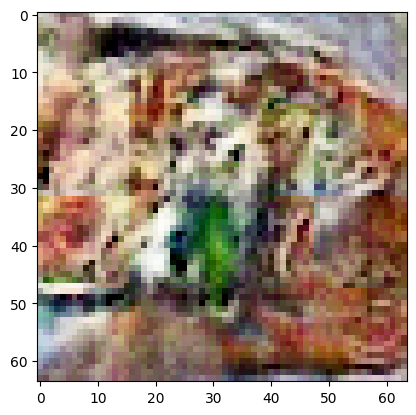

[58/100][100/257]	Loss_D: 0.2425	Loss_G: 9.0205	D(x): 0.9656	D(G(z)): 0.1590 / 0.0005
[58/100][150/257]	Loss_D: 0.3245	Loss_G: 8.1499	D(x): 0.9987	D(G(z)): 0.2577 / 0.0006
[58/100][200/257]	Loss_D: 1.6833	Loss_G: 10.5839	D(x): 0.9995	D(G(z)): 0.4840 / 0.0001
[58/100][250/257]	Loss_D: 0.1561	Loss_G: 6.9053	D(x): 0.8927	D(G(z)): 0.0195 / 0.0028
[59/100][0/257]	Loss_D: 0.7435	Loss_G: 10.6973	D(x): 0.9998	D(G(z)): 0.3941 / 0.0001
[59/100][50/257]	Loss_D: 0.2699	Loss_G: 6.9154	D(x): 0.9073	D(G(z)): 0.1427 / 0.0021
[59/100][100/257]	Loss_D: 0.0601	Loss_G: 5.4942	D(x): 0.9771	D(G(z)): 0.0353 / 0.0047
[59/100][150/257]	Loss_D: 0.1650	Loss_G: 7.1398	D(x): 0.9731	D(G(z)): 0.1207 / 0.0010
[59/100][200/257]	Loss_D: 0.7919	Loss_G: 12.9232	D(x): 0.9746	D(G(z)): 0.4721 / 0.0000
[59/100][250/257]	Loss_D: 0.1134	Loss_G: 3.8876	D(x): 0.9337	D(G(z)): 0.0332 / 0.0234
[60/100][0/257]	Loss_D: 0.0341	Loss_G: 4.7091	D(x): 0.9919	D(G(z)): 0.0255 / 0.0105
[60/100][50/257]	Loss_D: 0.4878	Loss_G: 4.8750	D(x): 0.7

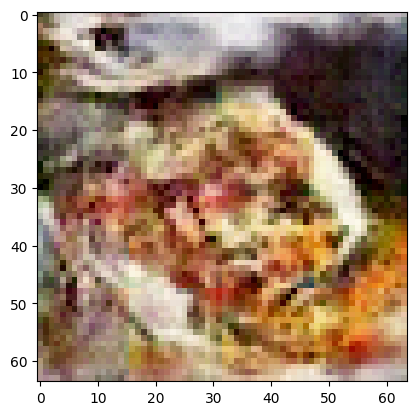

[60/100][100/257]	Loss_D: 0.1242	Loss_G: 5.3772	D(x): 0.9776	D(G(z)): 0.0902 / 0.0093
[60/100][150/257]	Loss_D: 0.0903	Loss_G: 9.4967	D(x): 0.9972	D(G(z)): 0.0776 / 0.0013
[60/100][200/257]	Loss_D: 0.4320	Loss_G: 8.4339	D(x): 0.9869	D(G(z)): 0.3272 / 0.0006
[60/100][250/257]	Loss_D: 0.2058	Loss_G: 6.8063	D(x): 0.9939	D(G(z)): 0.1764 / 0.0018
[61/100][0/257]	Loss_D: 0.0365	Loss_G: 4.8967	D(x): 0.9881	D(G(z)): 0.0237 / 0.0291
[61/100][50/257]	Loss_D: 0.2608	Loss_G: 4.0118	D(x): 0.8609	D(G(z)): 0.0506 / 0.0383
[61/100][100/257]	Loss_D: 0.0141	Loss_G: 7.0399	D(x): 0.9888	D(G(z)): 0.0026 / 0.0033
[61/100][150/257]	Loss_D: 0.0376	Loss_G: 5.9862	D(x): 0.9749	D(G(z)): 0.0114 / 0.0039
[61/100][200/257]	Loss_D: 0.5634	Loss_G: 4.5190	D(x): 0.6632	D(G(z)): 0.0023 / 0.0406
[61/100][250/257]	Loss_D: 1.3499	Loss_G: 16.2804	D(x): 0.9895	D(G(z)): 0.7304 / 0.0000
[62/100][0/257]	Loss_D: 0.3536	Loss_G: 8.9350	D(x): 0.9546	D(G(z)): 0.2268 / 0.0009
[62/100][50/257]	Loss_D: 0.2300	Loss_G: 5.0484	D(x): 0.884

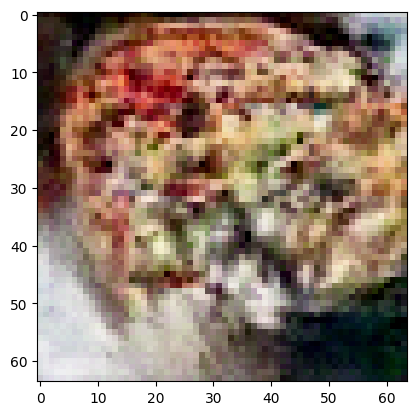

[62/100][100/257]	Loss_D: 0.2867	Loss_G: 7.8840	D(x): 0.8224	D(G(z)): 0.0020 / 0.0012
[62/100][150/257]	Loss_D: 0.0817	Loss_G: 5.5129	D(x): 0.9967	D(G(z)): 0.0747 / 0.0059
[62/100][200/257]	Loss_D: 0.3541	Loss_G: 8.6306	D(x): 0.9698	D(G(z)): 0.2343 / 0.0017
[62/100][250/257]	Loss_D: 0.4202	Loss_G: 9.2356	D(x): 0.9957	D(G(z)): 0.3175 / 0.0009
[63/100][0/257]	Loss_D: 0.0550	Loss_G: 8.0482	D(x): 0.9951	D(G(z)): 0.0476 / 0.0030
[63/100][50/257]	Loss_D: 0.4463	Loss_G: 2.6211	D(x): 0.7832	D(G(z)): 0.0980 / 0.0873
[63/100][100/257]	Loss_D: 0.1219	Loss_G: 5.2931	D(x): 0.9450	D(G(z)): 0.0554 / 0.0059
[63/100][150/257]	Loss_D: 0.1191	Loss_G: 4.6545	D(x): 0.9946	D(G(z)): 0.1045 / 0.0116
[63/100][200/257]	Loss_D: 0.5750	Loss_G: 4.6614	D(x): 0.7994	D(G(z)): 0.1319 / 0.0109
[63/100][250/257]	Loss_D: 0.7165	Loss_G: 9.8163	D(x): 0.9953	D(G(z)): 0.3696 / 0.0005
[64/100][0/257]	Loss_D: 0.0421	Loss_G: 5.2183	D(x): 0.9891	D(G(z)): 0.0298 / 0.0084
[64/100][50/257]	Loss_D: 0.3234	Loss_G: 13.1004	D(x): 0.876

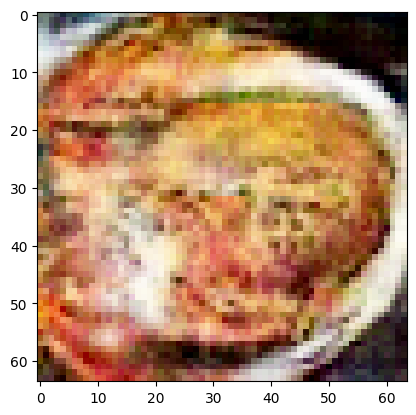

[64/100][100/257]	Loss_D: 0.1637	Loss_G: 4.5371	D(x): 0.8896	D(G(z)): 0.0165 / 0.0197
[64/100][150/257]	Loss_D: 0.0901	Loss_G: 8.3532	D(x): 0.9918	D(G(z)): 0.0728 / 0.0011
[64/100][200/257]	Loss_D: 0.0664	Loss_G: 4.3883	D(x): 0.9745	D(G(z)): 0.0340 / 0.0257
[64/100][250/257]	Loss_D: 0.0118	Loss_G: 6.1893	D(x): 0.9914	D(G(z)): 0.0031 / 0.0046
[65/100][0/257]	Loss_D: 0.1338	Loss_G: 6.9392	D(x): 0.9035	D(G(z)): 0.0061 / 0.0072
[65/100][50/257]	Loss_D: 0.3148	Loss_G: 3.7096	D(x): 0.8251	D(G(z)): 0.0765 / 0.0285
[65/100][100/257]	Loss_D: 0.4886	Loss_G: 10.8212	D(x): 0.9949	D(G(z)): 0.3352 / 0.0001
[65/100][150/257]	Loss_D: 0.1351	Loss_G: 6.8065	D(x): 0.9991	D(G(z)): 0.1231 / 0.0013
[65/100][200/257]	Loss_D: 0.0885	Loss_G: 4.5048	D(x): 0.9488	D(G(z)): 0.0311 / 0.0185
[65/100][250/257]	Loss_D: 0.3673	Loss_G: 8.2553	D(x): 0.9869	D(G(z)): 0.2723 / 0.0027
[66/100][0/257]	Loss_D: 0.4535	Loss_G: 7.5028	D(x): 0.9302	D(G(z)): 0.2622 / 0.0021


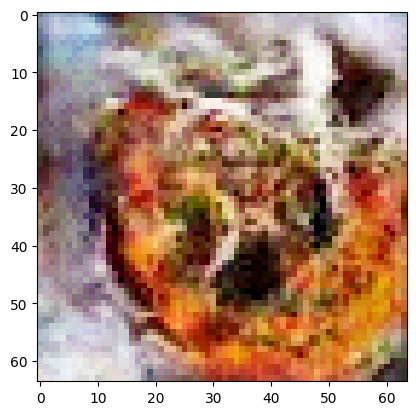

[66/100][50/257]	Loss_D: 0.1383	Loss_G: 6.7644	D(x): 0.9743	D(G(z)): 0.0867 / 0.0033
[66/100][100/257]	Loss_D: 0.6093	Loss_G: 12.2052	D(x): 0.9932	D(G(z)): 0.4339 / 0.0000
[66/100][150/257]	Loss_D: 0.5669	Loss_G: 11.3872	D(x): 0.9991	D(G(z)): 0.3290 / 0.0000
[66/100][200/257]	Loss_D: 0.1351	Loss_G: 5.8264	D(x): 0.9730	D(G(z)): 0.1008 / 0.0057
[66/100][250/257]	Loss_D: 0.2315	Loss_G: 8.6464	D(x): 0.8613	D(G(z)): 0.0061 / 0.0013
[67/100][0/257]	Loss_D: 0.2303	Loss_G: 5.4422	D(x): 0.9350	D(G(z)): 0.1419 / 0.0051
[67/100][50/257]	Loss_D: 0.1381	Loss_G: 8.3484	D(x): 0.9929	D(G(z)): 0.1167 / 0.0007
[67/100][100/257]	Loss_D: 0.1721	Loss_G: 6.2143	D(x): 0.9808	D(G(z)): 0.1351 / 0.0028
[67/100][150/257]	Loss_D: 0.0741	Loss_G: 7.3896	D(x): 0.9982	D(G(z)): 0.0686 / 0.0011
[67/100][200/257]	Loss_D: 0.0906	Loss_G: 4.6853	D(x): 0.9694	D(G(z)): 0.0550 / 0.0108
[67/100][250/257]	Loss_D: 3.2871	Loss_G: 22.4158	D(x): 0.9941	D(G(z)): 0.9511 / 0.0000
[68/100][0/257]	Loss_D: 0.2651	Loss_G: 4.3357	D(x): 0.8

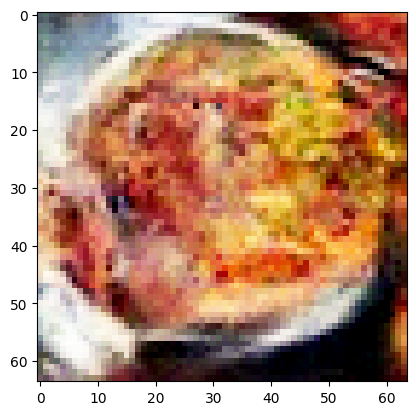

[68/100][50/257]	Loss_D: 1.5523	Loss_G: 8.3202	D(x): 0.4487	D(G(z)): 0.0005 / 0.0075
[68/100][100/257]	Loss_D: 0.1955	Loss_G: 6.2208	D(x): 0.9558	D(G(z)): 0.1246 / 0.0023
[68/100][150/257]	Loss_D: 0.0523	Loss_G: 5.0939	D(x): 0.9990	D(G(z)): 0.0496 / 0.0077
[68/100][200/257]	Loss_D: 0.3313	Loss_G: 6.9570	D(x): 0.9396	D(G(z)): 0.2257 / 0.0018
[68/100][250/257]	Loss_D: 0.1707	Loss_G: 8.7433	D(x): 0.9161	D(G(z)): 0.0035 / 0.0015
[69/100][0/257]	Loss_D: 0.0634	Loss_G: 7.3645	D(x): 0.9487	D(G(z)): 0.0060 / 0.0013
[69/100][50/257]	Loss_D: 0.3469	Loss_G: 4.2109	D(x): 0.8854	D(G(z)): 0.0645 / 0.0220
[69/100][100/257]	Loss_D: 0.1567	Loss_G: 6.9999	D(x): 0.9920	D(G(z)): 0.1178 / 0.0042
[69/100][150/257]	Loss_D: 0.3534	Loss_G: 5.9269	D(x): 0.7832	D(G(z)): 0.0084 / 0.0121
[69/100][200/257]	Loss_D: 0.1120	Loss_G: 4.7867	D(x): 0.9344	D(G(z)): 0.0323 / 0.0105
[69/100][250/257]	Loss_D: 0.3556	Loss_G: 8.0449	D(x): 0.9840	D(G(z)): 0.2678 / 0.0004
[70/100][0/257]	Loss_D: 0.1811	Loss_G: 5.5248	D(x): 0.8876

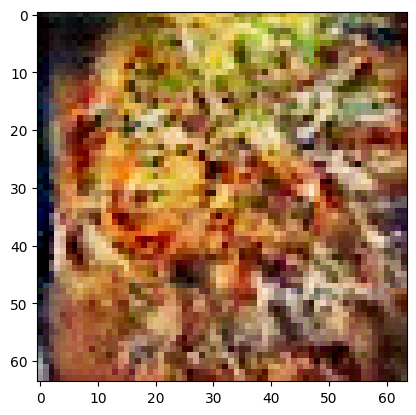

[70/100][50/257]	Loss_D: 0.4918	Loss_G: 3.9974	D(x): 0.8071	D(G(z)): 0.0352 / 0.0265
[70/100][100/257]	Loss_D: 0.2537	Loss_G: 5.1459	D(x): 0.9069	D(G(z)): 0.1204 / 0.0074
[70/100][150/257]	Loss_D: 0.1349	Loss_G: 5.5504	D(x): 0.9993	D(G(z)): 0.1228 / 0.0064
[70/100][200/257]	Loss_D: 0.0740	Loss_G: 5.1477	D(x): 0.9830	D(G(z)): 0.0531 / 0.0133
[70/100][250/257]	Loss_D: 0.0142	Loss_G: 6.3671	D(x): 0.9925	D(G(z)): 0.0064 / 0.0029
[71/100][0/257]	Loss_D: 0.0067	Loss_G: 8.4902	D(x): 0.9940	D(G(z)): 0.0006 / 0.0008
[71/100][50/257]	Loss_D: 0.1166	Loss_G: 5.3313	D(x): 0.9214	D(G(z)): 0.0144 / 0.0065
[71/100][100/257]	Loss_D: 0.7830	Loss_G: 12.9562	D(x): 0.9896	D(G(z)): 0.5198 / 0.0000
[71/100][150/257]	Loss_D: 0.0477	Loss_G: 10.6396	D(x): 0.9642	D(G(z)): 0.0071 / 0.0011
[71/100][200/257]	Loss_D: 0.5830	Loss_G: 10.7990	D(x): 0.9290	D(G(z)): 0.3639 / 0.0001
[71/100][250/257]	Loss_D: 1.1924	Loss_G: 18.2420	D(x): 0.9997	D(G(z)): 0.6904 / 0.0000


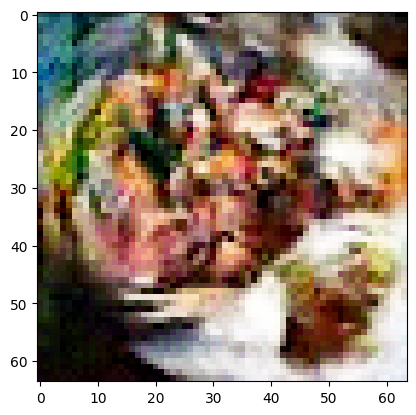

[72/100][0/257]	Loss_D: 0.0930	Loss_G: 5.2493	D(x): 0.9876	D(G(z)): 0.0737 / 0.0068
[72/100][50/257]	Loss_D: 0.4852	Loss_G: 5.8642	D(x): 0.8121	D(G(z)): 0.1135 / 0.0605
[72/100][100/257]	Loss_D: 0.0915	Loss_G: 4.7401	D(x): 0.9406	D(G(z)): 0.0247 / 0.0100
[72/100][150/257]	Loss_D: 0.1890	Loss_G: 6.6633	D(x): 0.9753	D(G(z)): 0.1413 / 0.0026
[72/100][200/257]	Loss_D: 0.1918	Loss_G: 8.1346	D(x): 0.9887	D(G(z)): 0.1465 / 0.0005
[72/100][250/257]	Loss_D: 0.2736	Loss_G: 7.1857	D(x): 0.9932	D(G(z)): 0.2266 / 0.0008
[73/100][0/257]	Loss_D: 0.0702	Loss_G: 4.3960	D(x): 0.9493	D(G(z)): 0.0137 / 0.0189
[73/100][50/257]	Loss_D: 0.3380	Loss_G: 5.2132	D(x): 0.7838	D(G(z)): 0.0061 / 0.0120
[73/100][100/257]	Loss_D: 0.1209	Loss_G: 5.2570	D(x): 0.9541	D(G(z)): 0.0653 / 0.0067
[73/100][150/257]	Loss_D: 0.3396	Loss_G: 11.3116	D(x): 0.9999	D(G(z)): 0.2164 / 0.0000
[73/100][200/257]	Loss_D: 0.2599	Loss_G: 5.8924	D(x): 0.9485	D(G(z)): 0.1617 / 0.0048


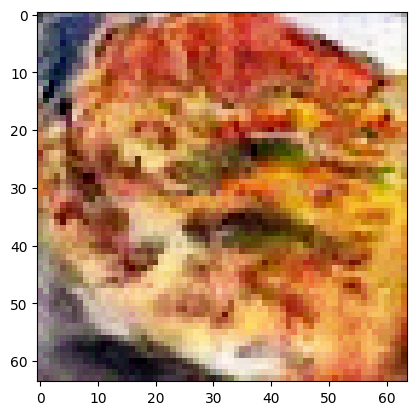

[73/100][250/257]	Loss_D: 0.0656	Loss_G: 6.5062	D(x): 0.9725	D(G(z)): 0.0319 / 0.0091
[74/100][0/257]	Loss_D: 0.0771	Loss_G: 5.5824	D(x): 0.9866	D(G(z)): 0.0604 / 0.0042
[74/100][50/257]	Loss_D: 0.2857	Loss_G: 5.9349	D(x): 0.8549	D(G(z)): 0.0545 / 0.0093
[74/100][100/257]	Loss_D: 0.0427	Loss_G: 6.9171	D(x): 0.9797	D(G(z)): 0.0210 / 0.0214
[74/100][150/257]	Loss_D: 0.1585	Loss_G: 5.9403	D(x): 0.9987	D(G(z)): 0.1414 / 0.0030
[74/100][200/257]	Loss_D: 0.1120	Loss_G: 4.2065	D(x): 0.9481	D(G(z)): 0.0273 / 0.0210
[74/100][250/257]	Loss_D: 0.0658	Loss_G: 4.9439	D(x): 0.9581	D(G(z)): 0.0189 / 0.0117
[75/100][0/257]	Loss_D: 0.0836	Loss_G: 5.3892	D(x): 0.9568	D(G(z)): 0.0344 / 0.0071
[75/100][50/257]	Loss_D: 0.6820	Loss_G: 3.7467	D(x): 0.7762	D(G(z)): 0.1397 / 0.0782
[75/100][100/257]	Loss_D: 0.1246	Loss_G: 6.3726	D(x): 0.9342	D(G(z)): 0.0375 / 0.0080
[75/100][150/257]	Loss_D: 1.5762	Loss_G: 14.4496	D(x): 0.3728	D(G(z)): 0.0000 / 0.0003
[75/100][200/257]	Loss_D: 0.2694	Loss_G: 7.9723	D(x): 0.988

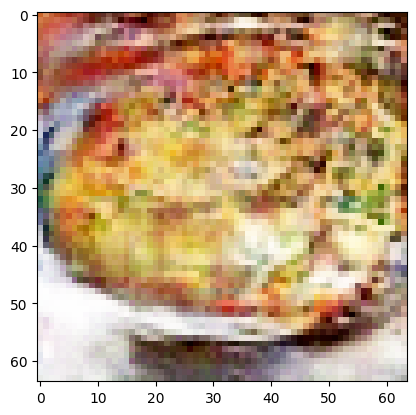

[75/100][250/257]	Loss_D: 0.6632	Loss_G: 12.7600	D(x): 0.9951	D(G(z)): 0.4657 / 0.0000
[76/100][0/257]	Loss_D: 0.0109	Loss_G: 7.3159	D(x): 0.9913	D(G(z)): 0.0020 / 0.0011
[76/100][50/257]	Loss_D: 0.4708	Loss_G: 8.9310	D(x): 0.9168	D(G(z)): 0.3013 / 0.0002
[76/100][100/257]	Loss_D: 0.6946	Loss_G: 6.9860	D(x): 0.6403	D(G(z)): 0.0005 / 0.0029
[76/100][150/257]	Loss_D: 0.1844	Loss_G: 6.6882	D(x): 0.9987	D(G(z)): 0.1644 / 0.0018
[76/100][200/257]	Loss_D: 0.0049	Loss_G: 7.1632	D(x): 1.0000	D(G(z)): 0.0049 / 0.0023
[76/100][250/257]	Loss_D: 0.1402	Loss_G: 6.3456	D(x): 0.9261	D(G(z)): 0.0389 / 0.0035
[77/100][0/257]	Loss_D: 0.1505	Loss_G: 7.3713	D(x): 0.9975	D(G(z)): 0.1322 / 0.0031
[77/100][50/257]	Loss_D: 0.1949	Loss_G: 4.4408	D(x): 0.8929	D(G(z)): 0.0180 / 0.0203
[77/100][100/257]	Loss_D: 0.0289	Loss_G: 4.8682	D(x): 0.9929	D(G(z)): 0.0211 / 0.0097
[77/100][150/257]	Loss_D: 0.2264	Loss_G: 8.0408	D(x): 0.9973	D(G(z)): 0.1933 / 0.0005
[77/100][200/257]	Loss_D: 0.0962	Loss_G: 5.6174	D(x): 0.967

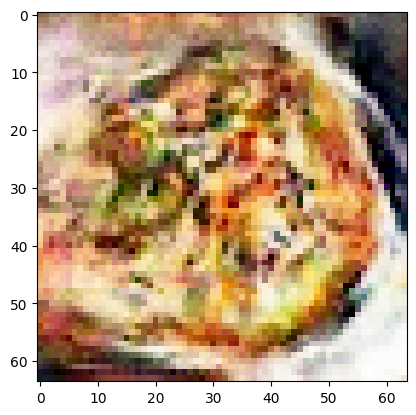

[77/100][250/257]	Loss_D: 0.0635	Loss_G: 6.0447	D(x): 0.9870	D(G(z)): 0.0473 / 0.0032
[78/100][0/257]	Loss_D: 0.1754	Loss_G: 6.4046	D(x): 0.9661	D(G(z)): 0.1277 / 0.0018
[78/100][50/257]	Loss_D: 0.3594	Loss_G: 7.1354	D(x): 0.7662	D(G(z)): 0.0013 / 0.0021
[78/100][100/257]	Loss_D: 0.0656	Loss_G: 8.1085	D(x): 0.9469	D(G(z)): 0.0002 / 0.0005
[78/100][150/257]	Loss_D: 0.1167	Loss_G: 6.3107	D(x): 0.9808	D(G(z)): 0.0758 / 0.0207
[78/100][200/257]	Loss_D: 0.5817	Loss_G: 11.1395	D(x): 0.9938	D(G(z)): 0.3764 / 0.0000
[78/100][250/257]	Loss_D: 0.0866	Loss_G: 4.6831	D(x): 0.9567	D(G(z)): 0.0365 / 0.0116
[79/100][0/257]	Loss_D: 0.0644	Loss_G: 5.1735	D(x): 0.9679	D(G(z)): 0.0258 / 0.0080
[79/100][50/257]	Loss_D: 0.7732	Loss_G: 13.1016	D(x): 0.9187	D(G(z)): 0.4514 / 0.0000
[79/100][100/257]	Loss_D: 0.0487	Loss_G: 10.9100	D(x): 0.9585	D(G(z)): 0.0005 / 0.0001
[79/100][150/257]	Loss_D: 0.0104	Loss_G: 7.6563	D(x): 0.9992	D(G(z)): 0.0094 / 0.0028


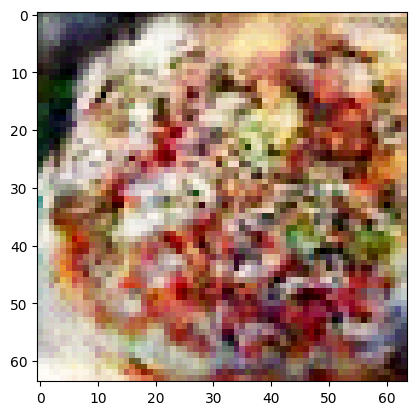

[79/100][200/257]	Loss_D: 0.1388	Loss_G: 10.7452	D(x): 0.9872	D(G(z)): 0.1072 / 0.0007
[79/100][250/257]	Loss_D: 0.1773	Loss_G: 6.6379	D(x): 0.9743	D(G(z)): 0.1295 / 0.0023
[80/100][0/257]	Loss_D: 0.0469	Loss_G: 4.7030	D(x): 0.9976	D(G(z)): 0.0433 / 0.0096
[80/100][50/257]	Loss_D: 0.4081	Loss_G: 2.6997	D(x): 0.7888	D(G(z)): 0.0175 / 0.0989
[80/100][100/257]	Loss_D: 0.3766	Loss_G: 10.2122	D(x): 0.9770	D(G(z)): 0.2314 / 0.0004
[80/100][150/257]	Loss_D: 0.0156	Loss_G: 8.1478	D(x): 0.9892	D(G(z)): 0.0039 / 0.0083
[80/100][200/257]	Loss_D: 0.1697	Loss_G: 5.0104	D(x): 0.9450	D(G(z)): 0.0569 / 0.0073
[80/100][250/257]	Loss_D: 0.0639	Loss_G: 6.1214	D(x): 0.9986	D(G(z)): 0.0577 / 0.0033
[81/100][0/257]	Loss_D: 0.1573	Loss_G: 7.5125	D(x): 0.9202	D(G(z)): 0.0032 / 0.0006
[81/100][50/257]	Loss_D: 0.2779	Loss_G: 3.6401	D(x): 0.8430	D(G(z)): 0.0575 / 0.0315
[81/100][100/257]	Loss_D: 0.1448	Loss_G: 7.8620	D(x): 0.9829	D(G(z)): 0.1111 / 0.0291
[81/100][150/257]	Loss_D: 0.0086	Loss_G: 8.5417	D(x): 0.99

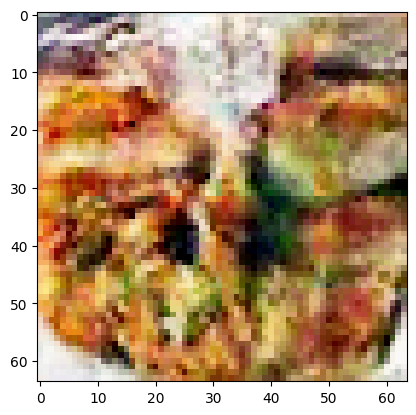

[81/100][200/257]	Loss_D: 0.1503	Loss_G: 6.6660	D(x): 0.9027	D(G(z)): 0.0047 / 0.0023
[81/100][250/257]	Loss_D: 0.0877	Loss_G: 3.6503	D(x): 0.9975	D(G(z)): 0.0778 / 0.0412
[82/100][0/257]	Loss_D: 0.0625	Loss_G: 4.9550	D(x): 0.9648	D(G(z)): 0.0230 / 0.0094
[82/100][50/257]	Loss_D: 0.6525	Loss_G: 11.9141	D(x): 0.9543	D(G(z)): 0.4088 / 0.0002
[82/100][100/257]	Loss_D: 0.4651	Loss_G: 6.4872	D(x): 0.7070	D(G(z)): 0.0013 / 0.0022
[82/100][150/257]	Loss_D: 0.0231	Loss_G: 7.0843	D(x): 0.9971	D(G(z)): 0.0192 / 0.0043
[82/100][200/257]	Loss_D: 0.1334	Loss_G: 4.6357	D(x): 0.9262	D(G(z)): 0.0151 / 0.0110
[82/100][250/257]	Loss_D: 0.4894	Loss_G: 10.3377	D(x): 0.9752	D(G(z)): 0.2915 / 0.0031
[83/100][0/257]	Loss_D: 0.0106	Loss_G: 10.7924	D(x): 0.9918	D(G(z)): 0.0020 / 0.0002
[83/100][50/257]	Loss_D: 0.7198	Loss_G: 4.7061	D(x): 0.7160	D(G(z)): 0.0180 / 0.0875
[83/100][100/257]	Loss_D: 0.0275	Loss_G: 7.2382	D(x): 0.9866	D(G(z)): 0.0132 / 0.0032
[83/100][150/257]	Loss_D: 0.4216	Loss_G: 10.3429	D(x): 0.

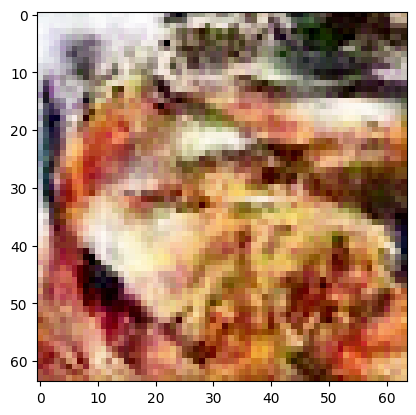

[83/100][200/257]	Loss_D: 0.1013	Loss_G: 4.9858	D(x): 0.9464	D(G(z)): 0.0403 / 0.0098
[83/100][250/257]	Loss_D: 0.1848	Loss_G: 6.2375	D(x): 0.9987	D(G(z)): 0.1648 / 0.0025
[84/100][0/257]	Loss_D: 0.0205	Loss_G: 12.2754	D(x): 0.9807	D(G(z)): 0.0001 / 0.0001
[84/100][50/257]	Loss_D: 0.1693	Loss_G: 3.1492	D(x): 0.9066	D(G(z)): 0.0308 / 0.0447
[84/100][100/257]	Loss_D: 0.4707	Loss_G: 8.9975	D(x): 0.9503	D(G(z)): 0.3285 / 0.0007
[84/100][150/257]	Loss_D: 0.1344	Loss_G: 5.6566	D(x): 0.9778	D(G(z)): 0.0993 / 0.0054
[84/100][200/257]	Loss_D: 0.8685	Loss_G: 15.0848	D(x): 0.9927	D(G(z)): 0.5394 / 0.0000
[84/100][250/257]	Loss_D: 0.1471	Loss_G: 8.1704	D(x): 0.9960	D(G(z)): 0.1233 / 0.0005
[85/100][0/257]	Loss_D: 0.1135	Loss_G: 5.8334	D(x): 0.9222	D(G(z)): 0.0054 / 0.0041
[85/100][50/257]	Loss_D: 0.1914	Loss_G: 4.1382	D(x): 0.8850	D(G(z)): 0.0414 / 0.0185
[85/100][100/257]	Loss_D: 0.0538	Loss_G: 7.6948	D(x): 0.9832	D(G(z)): 0.0345 / 0.0037
[85/100][150/257]	Loss_D: 0.0682	Loss_G: 5.7507	D(x): 0.99

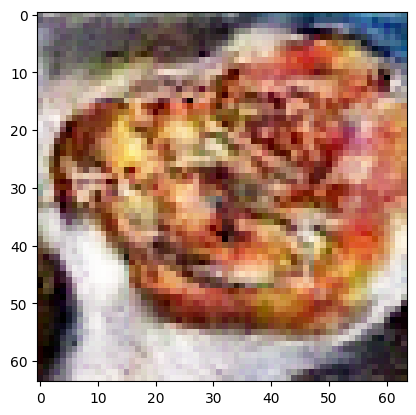

[85/100][200/257]	Loss_D: 0.1561	Loss_G: 4.9275	D(x): 0.9195	D(G(z)): 0.0135 / 0.0273
[85/100][250/257]	Loss_D: 0.2611	Loss_G: 7.1167	D(x): 0.9836	D(G(z)): 0.1913 / 0.0011
[86/100][0/257]	Loss_D: 0.0456	Loss_G: 4.9425	D(x): 0.9727	D(G(z)): 0.0165 / 0.0103
[86/100][50/257]	Loss_D: 0.0106	Loss_G: 13.1585	D(x): 0.9900	D(G(z)): 0.0004 / 0.0000
[86/100][100/257]	Loss_D: 0.3316	Loss_G: 7.3217	D(x): 0.7874	D(G(z)): 0.0005 / 0.0010
[86/100][150/257]	Loss_D: 0.0834	Loss_G: 4.3646	D(x): 0.9620	D(G(z)): 0.0369 / 0.0169
[86/100][200/257]	Loss_D: 0.1319	Loss_G: 5.0455	D(x): 0.9384	D(G(z)): 0.0606 / 0.0077
[86/100][250/257]	Loss_D: 0.0371	Loss_G: 5.1680	D(x): 0.9789	D(G(z)): 0.0140 / 0.0095
[87/100][0/257]	Loss_D: 0.4987	Loss_G: 15.9560	D(x): 0.6814	D(G(z)): 0.0001 / 0.0004
[87/100][50/257]	Loss_D: 0.2673	Loss_G: 5.1891	D(x): 0.8326	D(G(z)): 0.0012 / 0.0105
[87/100][100/257]	Loss_D: 0.3672	Loss_G: 2.5685	D(x): 0.7937	D(G(z)): 0.0416 / 0.0978


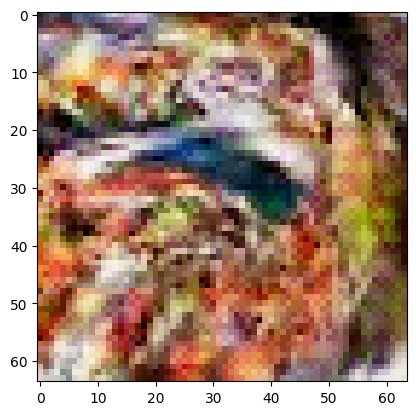

[87/100][150/257]	Loss_D: 0.0225	Loss_G: 4.6685	D(x): 0.9979	D(G(z)): 0.0201 / 0.0105
[87/100][200/257]	Loss_D: 0.2398	Loss_G: 4.4427	D(x): 0.9021	D(G(z)): 0.0525 / 0.0176
[87/100][250/257]	Loss_D: 0.0258	Loss_G: 6.0253	D(x): 0.9805	D(G(z)): 0.0050 / 0.0061
[88/100][0/257]	Loss_D: 0.2902	Loss_G: 10.3038	D(x): 0.9981	D(G(z)): 0.2423 / 0.0004
[88/100][50/257]	Loss_D: 0.5079	Loss_G: 3.3177	D(x): 0.7409	D(G(z)): 0.0066 / 0.0974
[88/100][100/257]	Loss_D: 0.2711	Loss_G: 7.3182	D(x): 0.9995	D(G(z)): 0.2126 / 0.0010
[88/100][150/257]	Loss_D: 0.0761	Loss_G: 5.0480	D(x): 0.9972	D(G(z)): 0.0667 / 0.0107
[88/100][200/257]	Loss_D: 0.0719	Loss_G: 6.9195	D(x): 0.9956	D(G(z)): 0.0603 / 0.0060
[88/100][250/257]	Loss_D: 0.0272	Loss_G: 5.0052	D(x): 0.9955	D(G(z)): 0.0223 / 0.0113
[89/100][0/257]	Loss_D: 0.3697	Loss_G: 10.8784	D(x): 0.9495	D(G(z)): 0.1857 / 0.0004
[89/100][50/257]	Loss_D: 0.4011	Loss_G: 1.3651	D(x): 0.7487	D(G(z)): 0.0257 / 0.3064
[89/100][100/257]	Loss_D: 0.0488	Loss_G: 11.6774	D(x): 0.9

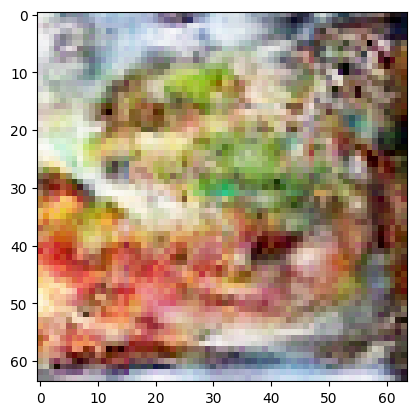

[89/100][150/257]	Loss_D: 0.4510	Loss_G: 11.1074	D(x): 0.9935	D(G(z)): 0.3358 / 0.0001
[89/100][200/257]	Loss_D: 1.1827	Loss_G: 10.6204	D(x): 0.4255	D(G(z)): 0.0000 / 0.0001
[89/100][250/257]	Loss_D: 0.1306	Loss_G: 8.2137	D(x): 0.9715	D(G(z)): 0.0770 / 0.0020
[90/100][0/257]	Loss_D: 0.1120	Loss_G: 18.0333	D(x): 0.9042	D(G(z)): 0.0000 / 0.0000
[90/100][50/257]	Loss_D: 0.4906	Loss_G: 4.6105	D(x): 0.8511	D(G(z)): 0.1362 / 0.0145
[90/100][100/257]	Loss_D: 0.1426	Loss_G: 5.7933	D(x): 0.9399	D(G(z)): 0.0364 / 0.0374
[90/100][150/257]	Loss_D: 0.0533	Loss_G: 6.0871	D(x): 0.9830	D(G(z)): 0.0336 / 0.0025
[90/100][200/257]	Loss_D: 0.1393	Loss_G: 6.4616	D(x): 0.9733	D(G(z)): 0.0958 / 0.0020
[90/100][250/257]	Loss_D: 0.4143	Loss_G: 11.8493	D(x): 0.9891	D(G(z)): 0.2814 / 0.0000
[91/100][0/257]	Loss_D: 0.0232	Loss_G: 6.0677	D(x): 0.9911	D(G(z)): 0.0136 / 0.0032
[91/100][50/257]	Loss_D: 0.3021	Loss_G: 3.3042	D(x): 0.8200	D(G(z)): 0.0462 / 0.0441
[91/100][100/257]	Loss_D: 0.5462	Loss_G: 10.9044	D(x): 0

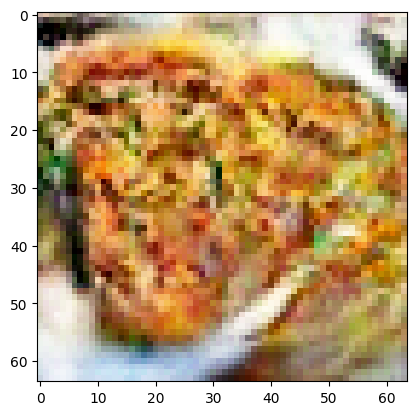

[91/100][150/257]	Loss_D: 0.1874	Loss_G: 6.8542	D(x): 0.9997	D(G(z)): 0.1615 / 0.0016
[91/100][200/257]	Loss_D: 0.0968	Loss_G: 5.9687	D(x): 0.9845	D(G(z)): 0.0678 / 0.0032
[91/100][250/257]	Loss_D: 0.1967	Loss_G: 7.3162	D(x): 0.9734	D(G(z)): 0.1412 / 0.0019
[92/100][0/257]	Loss_D: 0.0292	Loss_G: 7.2229	D(x): 0.9831	D(G(z)): 0.0115 / 0.0034
[92/100][50/257]	Loss_D: 0.2744	Loss_G: 10.5745	D(x): 0.9480	D(G(z)): 0.1680 / 0.0005
[92/100][100/257]	Loss_D: 0.3934	Loss_G: 8.3107	D(x): 0.9262	D(G(z)): 0.2435 / 0.0006
[92/100][150/257]	Loss_D: 0.1718	Loss_G: 6.7439	D(x): 0.9963	D(G(z)): 0.1489 / 0.0017
[92/100][200/257]	Loss_D: 0.2064	Loss_G: 6.2794	D(x): 0.9980	D(G(z)): 0.1741 / 0.0054
[92/100][250/257]	Loss_D: 0.2652	Loss_G: 4.3179	D(x): 0.8532	D(G(z)): 0.0291 / 0.0430
[93/100][0/257]	Loss_D: 0.0311	Loss_G: 8.3393	D(x): 0.9932	D(G(z)): 0.0229 / 0.0078
[93/100][50/257]	Loss_D: 0.5367	Loss_G: 2.7590	D(x): 0.6811	D(G(z)): 0.0104 / 0.2206


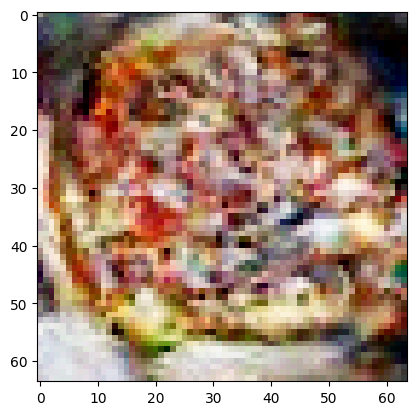

[93/100][100/257]	Loss_D: 0.0254	Loss_G: 5.7181	D(x): 0.9830	D(G(z)): 0.0078 / 0.0044
[93/100][150/257]	Loss_D: 0.0610	Loss_G: 5.7065	D(x): 0.9920	D(G(z)): 0.0506 / 0.0052
[93/100][200/257]	Loss_D: 0.1938	Loss_G: 5.7918	D(x): 0.9679	D(G(z)): 0.1401 / 0.0048
[93/100][250/257]	Loss_D: 0.1125	Loss_G: 6.1672	D(x): 0.9709	D(G(z)): 0.0725 / 0.0042
[94/100][0/257]	Loss_D: 0.1416	Loss_G: 4.3070	D(x): 0.9309	D(G(z)): 0.0165 / 0.0191
[94/100][50/257]	Loss_D: 0.0448	Loss_G: 5.9090	D(x): 0.9735	D(G(z)): 0.0149 / 0.0046
[94/100][100/257]	Loss_D: 0.1058	Loss_G: 6.0810	D(x): 0.9875	D(G(z)): 0.0831 / 0.0063
[94/100][150/257]	Loss_D: 0.0636	Loss_G: 5.1699	D(x): 0.9776	D(G(z)): 0.0378 / 0.0146
[94/100][200/257]	Loss_D: 0.0839	Loss_G: 6.6327	D(x): 0.9694	D(G(z)): 0.0436 / 0.0020
[94/100][250/257]	Loss_D: 0.1675	Loss_G: 10.1625	D(x): 0.8717	D(G(z)): 0.0147 / 0.0068
[95/100][0/257]	Loss_D: 0.0124	Loss_G: 9.6682	D(x): 0.9967	D(G(z)): 0.0088 / 0.0028
[95/100][50/257]	Loss_D: 0.1179	Loss_G: 6.0657	D(x): 0.973

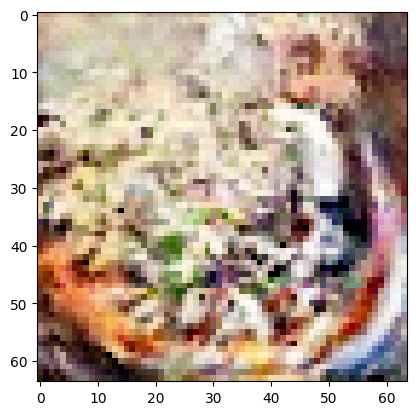

[95/100][100/257]	Loss_D: 0.0236	Loss_G: 7.0009	D(x): 0.9941	D(G(z)): 0.0170 / 0.0036
[95/100][150/257]	Loss_D: 0.0375	Loss_G: 6.0939	D(x): 0.9999	D(G(z)): 0.0353 / 0.0053
[95/100][200/257]	Loss_D: 0.0899	Loss_G: 8.3221	D(x): 0.9281	D(G(z)): 0.0010 / 0.0005
[95/100][250/257]	Loss_D: 0.0576	Loss_G: 7.6278	D(x): 0.9497	D(G(z)): 0.0026 / 0.0018
[96/100][0/257]	Loss_D: 0.1365	Loss_G: 7.1876	D(x): 0.9727	D(G(z)): 0.0936 / 0.0012
[96/100][50/257]	Loss_D: 0.0568	Loss_G: 5.5935	D(x): 0.9554	D(G(z)): 0.0083 / 0.0058
[96/100][100/257]	Loss_D: 0.4274	Loss_G: 12.1650	D(x): 0.9506	D(G(z)): 0.2601 / 0.0000
[96/100][150/257]	Loss_D: 0.1628	Loss_G: 8.7527	D(x): 0.9950	D(G(z)): 0.1446 / 0.0007
[96/100][200/257]	Loss_D: 0.1578	Loss_G: 5.6638	D(x): 0.9603	D(G(z)): 0.0960 / 0.0054
[96/100][250/257]	Loss_D: 0.1294	Loss_G: 7.2413	D(x): 0.9840	D(G(z)): 0.0965 / 0.0010
[97/100][0/257]	Loss_D: 0.1247	Loss_G: 6.4560	D(x): 0.9048	D(G(z)): 0.0025 / 0.0033
[97/100][50/257]	Loss_D: 0.0790	Loss_G: 5.8302	D(x): 0.939

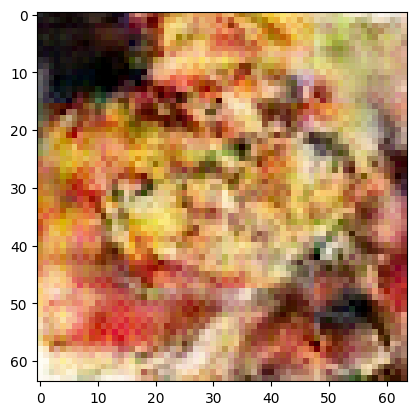

[97/100][100/257]	Loss_D: 0.0657	Loss_G: 6.8694	D(x): 0.9684	D(G(z)): 0.0267 / 0.0014
[97/100][150/257]	Loss_D: 0.0108	Loss_G: 9.5244	D(x): 0.9924	D(G(z)): 0.0030 / 0.0002
[97/100][200/257]	Loss_D: 0.1208	Loss_G: 6.2747	D(x): 0.9328	D(G(z)): 0.0327 / 0.0165
[97/100][250/257]	Loss_D: 0.2310	Loss_G: 6.4227	D(x): 0.9442	D(G(z)): 0.1113 / 0.0125
[98/100][0/257]	Loss_D: 0.0207	Loss_G: 7.3253	D(x): 0.9988	D(G(z)): 0.0189 / 0.0044
[98/100][50/257]	Loss_D: 0.2027	Loss_G: 5.3768	D(x): 0.9541	D(G(z)): 0.1322 / 0.0061
[98/100][100/257]	Loss_D: 0.0558	Loss_G: 7.1498	D(x): 0.9949	D(G(z)): 0.0467 / 0.0017
[98/100][150/257]	Loss_D: 0.2046	Loss_G: 7.1895	D(x): 0.9958	D(G(z)): 0.1739 / 0.0013
[98/100][200/257]	Loss_D: 0.1029	Loss_G: 8.2526	D(x): 0.9233	D(G(z)): 0.0037 / 0.0183
[98/100][250/257]	Loss_D: 0.0356	Loss_G: 5.4500	D(x): 0.9806	D(G(z)): 0.0138 / 0.0085
[99/100][0/257]	Loss_D: 0.0514	Loss_G: 8.6574	D(x): 0.9599	D(G(z)): 0.0006 / 0.0004
[99/100][50/257]	Loss_D: 0.4192	Loss_G: 5.2712	D(x): 0.7906

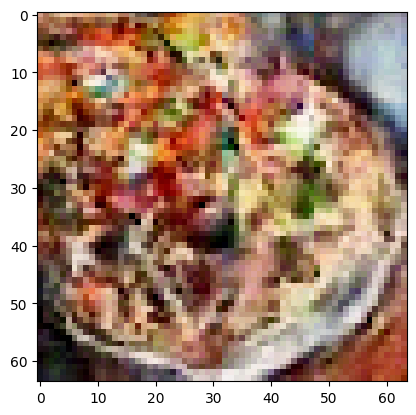

[99/100][100/257]	Loss_D: 0.0423	Loss_G: 5.4213	D(x): 0.9785	D(G(z)): 0.0193 / 0.0067
[99/100][150/257]	Loss_D: 0.0159	Loss_G: 10.4587	D(x): 0.9880	D(G(z)): 0.0032 / 0.0029
[99/100][200/257]	Loss_D: 0.0731	Loss_G: 9.6374	D(x): 0.9386	D(G(z)): 0.0005 / 0.0001
[99/100][250/257]	Loss_D: 2.3496	Loss_G: 19.4924	D(x): 0.9943	D(G(z)): 0.8784 / 0.0000


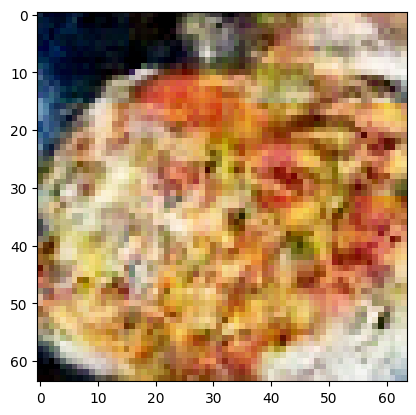

In [ ]:
img_list = []
G_losses = []
D_losses = []
iters = 0
num_epochs = 100
  #b_size = 128
nz = 100
lr = 0.0002
d = DiscriminatorNetwork(64,3)
d.apply(weights_init)
ng = GeneratorNetwork(100, 64)
ng.apply(weights_init)
d = d.cuda()
ng = ng.cuda()
optimizerD = optim.Adam(d.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(ng.parameters(), lr=lr, betas=(beta1, 0.999))

fixed_noise = torch.randn(64, 100, 1, 1).cuda()
  
for epoch in range(num_epochs):
    #for each batch
    for i, data in enumerate(dataloader)):
      # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
      d.zero_grad()
      # Training the real batches
      real_data = data.cuda()
      b_size = real_data.size(0)
      label = torch.full((b_size,), real_label, dtype=torch.float).cuda()
      #forward pass in discriminator
      output = d(real_data)
      output = output.view(-1)
      #Error
      errD_real = criterion(output, label)
      errD_real.backward()
      D_x = output.mean().item()
      ## Generating images with fake_batches 
      noise = torch.randn(b_size, nz, 1, 1).cuda()
      # Generate fake image batch with G
      fake = ng(noise)
      label.fill_(fake_label)
      #Classify the fake images with discriminator
      output = d(fake.detach()).view(-1)
      errD_fake = criterion(output, label)
      errD_fake.backward()
      D_G_z1 = output.mean().item()
      #loss of fake and real images
      errD = errD_real + errD_fake
      optimizerD.step()
      # (2) Update G network: maximize log(D(G(z)))
      ng.zero_grad()
      label.fill_(real_label)  
      output = d(fake).view(-1)
      errG = criterion(output, label)
      errG.backward()
      D_G_z2 = output.mean().item()
      optimizerG.step()
      if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(trainer),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
      G_losses.append(errG.item())
      D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
      if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(trainer)-1)):
            with torch.no_grad():
                fake = ng(fixed_noise).detach().cpu()
                image_np = fake[0].numpy()
                img_np = np.transpose(image_np, (1, 2, 0)).clip(0,1)
                plt.imshow(img_np)
                plt.show()
            img_list.append(fake)
    


      iters += 1
      del real_data
  #return img_list, G_losses , D_losses





    
    






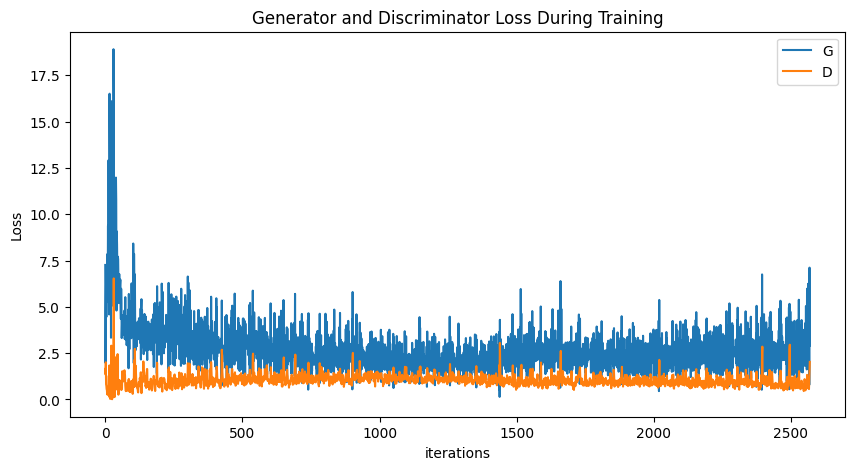

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

WGAN


In [ ]:
class Critic(nn.Module):
  def __init__(self , d_s , nc):
    super(Critic, self).__init__()
    self.disc_layer = nn.Sequential(nn.Conv2d(nc, d_s, 3, 2, 1),
                                    nn.LeakyReLU(0.2, inplace=True),
                                    
                                    nn.Conv2d(d_s, d_s * 2, 3, 2, 1),
                                    nn.BatchNorm2d(d_s * 2),
                                    nn.LeakyReLU(0.2, inplace=True),

                                    nn.Conv2d(d_s * 2, d_s * 4, 4, 2, 1),
                                    nn.BatchNorm2d(d_s * 4),
                                    nn.LeakyReLU(0.2, inplace=True),


                                    nn.Conv2d(d_s * 4, d_s * 8, 3, 2, 1),
                                    nn.BatchNorm2d(d_s * 8),
                                    nn.LeakyReLU(0.2, inplace=True),

                                    nn.Conv2d(d_s * 8, 1, 4, 1, 0),
                                    )
  def forward(self,input):
    out = self.disc_layer(input)
    return out

In [ ]:
transform = tvt.Compose([tvt.ToTensor()])
dataloader_train = mydataset("train",  transform )
trainer_wgan = DataLoader(dataloader_train , batch_size = 32)
len(dataloader_train)

['train/03417.jpg', 'train/02537.jpg', 'train/01974.jpg', 'train/05409.jpg', 'train/02386.jpg', 'train/08824.jpg', 'train/08419.jpg', 'train/03486.jpg', 'train/06283.jpg', 'train/06631.jpg', 'train/06004.jpg', 'train/06784.jpg', 'train/07285.jpg', 'train/05386.jpg', 'train/06358.jpg', 'train/02264.jpg', 'train/09051.jpg', 'train/03960.jpg', 'train/08215.jpg', 'train/08095.jpg', 'train/07076.jpg', 'train/05136.jpg', 'train/02668.jpg', 'train/03480.jpg', 'train/03841.jpg', 'train/05117.jpg', 'train/02139.jpg', 'train/04807.jpg', 'train/02838.jpg', 'train/08811.jpg', 'train/05759.jpg', 'train/01640.jpg', 'train/06293.jpg', 'train/02570.jpg', 'train/02178.jpg', 'train/06606.jpg', 'train/05415.jpg', 'train/01282.jpg', 'train/06973.jpg', 'train/02558.jpg', 'train/03337.jpg', 'train/05113.jpg', 'train/06585.jpg', 'train/01929.jpg', 'train/02082.jpg', 'train/08255.jpg', 'train/08489.jpg', 'train/06965.jpg', 'train/06361.jpg', 'train/03607.jpg', 'train/05689.jpg', 'train/02393.jpg', 'train/0435

8213

Train

(0, 200, 0, 257, 0.48813796043395996, 0.3720526695251465)
(0, 200, 50, 257, 0.37616997957229614, 0.24597550928592682)
(0, 200, 100, 257, 1.1628947257995605, 0.6948336958885193)
(0, 200, 150, 257, 1.174617052078247, 0.5830053091049194)
(0, 200, 200, 257, 1.1806745529174805, 0.6181129217147827)
(0, 200, 250, 257, 1.0536019802093506, 0.48026084899902344)
(1, 200, 0, 257, 1.1494033336639404, 0.6138331890106201)
(1, 200, 50, 257, 1.0011115074157715, 0.3549349904060364)
(1, 200, 100, 257, 1.0655256509780884, 0.5652743577957153)
(1, 200, 150, 257, 0.8720129132270813, 0.3658837080001831)
(1, 200, 200, 257, 0.8841620683670044, 0.37859317660331726)


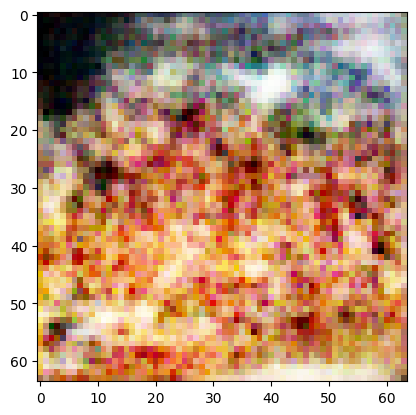

(1, 200, 250, 257, 1.0298807621002197, 0.5926430225372314)
(2, 200, 0, 257, 0.9707369208335876, 0.5290954113006592)
(2, 200, 50, 257, 1.0311214923858643, 0.44821155071258545)
(2, 200, 100, 257, 1.0471827983856201, 0.608613133430481)
(2, 200, 150, 257, 1.0152802467346191, 0.6352744102478027)
(2, 200, 200, 257, 0.8842836618423462, 0.6067138910293579)
(2, 200, 250, 257, 0.9297895431518555, 0.3497951626777649)
(3, 200, 0, 257, 0.9787731766700745, 0.45845893025398254)
(3, 200, 50, 257, 1.0261365175247192, 0.5485013723373413)
(3, 200, 100, 257, 0.7689501047134399, 0.07592350244522095)
(3, 200, 150, 257, 0.9112048149108887, 0.6282341480255127)
(3, 200, 200, 257, 0.9674293398857117, 0.5266084671020508)


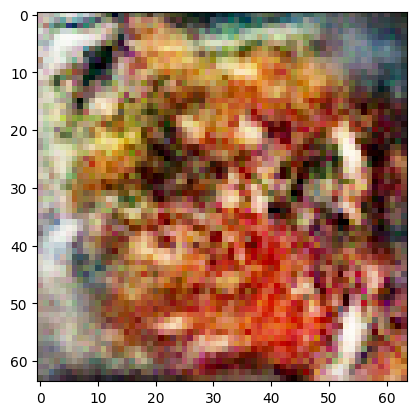

(3, 200, 250, 257, 0.9425352811813354, 0.42674529552459717)
(4, 200, 0, 257, 0.8693555593490601, 0.40885841846466064)
(4, 200, 50, 257, 0.7793816328048706, 0.16356348991394043)
(4, 200, 100, 257, 0.9269107580184937, 0.3359633982181549)
(4, 200, 150, 257, 0.8418782949447632, 0.6012973189353943)
(4, 200, 200, 257, 0.781557559967041, 0.5692225694656372)
(4, 200, 250, 257, 0.8934512138366699, 0.48657745122909546)
(5, 200, 0, 257, 0.8243706226348877, 0.49900883436203003)
(5, 200, 50, 257, 0.7674115300178528, 0.4547330141067505)
(5, 200, 100, 257, 0.8362714052200317, 0.4862075746059418)
(5, 200, 150, 257, 0.8653433322906494, 0.4140608012676239)
(5, 200, 200, 257, 0.8464898467063904, 0.5510361194610596)


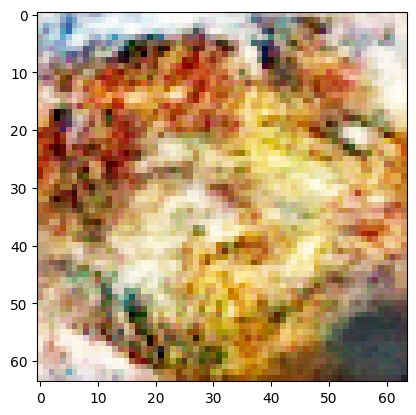

(5, 200, 250, 257, 0.8045697212219238, 0.4062522053718567)
(6, 200, 0, 257, 0.8421746492385864, 0.539985179901123)
(6, 200, 50, 257, 0.7822456955909729, 0.5467560291290283)
(6, 200, 100, 257, 0.8834164142608643, 0.4106791615486145)
(6, 200, 150, 257, 0.8142684102058411, 0.5614699721336365)
(6, 200, 200, 257, 0.7537225484848022, 0.5229872465133667)
(6, 200, 250, 257, 0.7707173824310303, 0.5627918839454651)
(7, 200, 0, 257, 0.8025656938552856, 0.3793836832046509)
(7, 200, 50, 257, 0.6704088449478149, 0.49221071600914)
(7, 200, 100, 257, 0.8041344285011292, 0.3435789942741394)
(7, 200, 150, 257, 0.820914626121521, 0.4675483703613281)
(7, 200, 200, 257, 0.7154573798179626, 0.579073429107666)


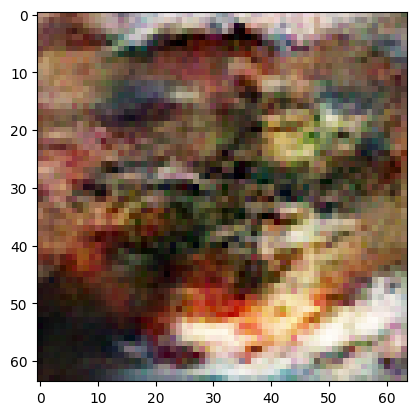

(7, 200, 250, 257, 0.7498606443405151, 0.3118349313735962)
(8, 200, 0, 257, 0.7687456011772156, 0.31287282705307007)
(8, 200, 50, 257, 0.67319655418396, 0.5972409248352051)
(8, 200, 100, 257, 0.7424309849739075, 0.3901284635066986)
(8, 200, 150, 257, 0.8162140250205994, 0.4443592429161072)
(8, 200, 200, 257, 0.7739189863204956, 0.41622868180274963)
(8, 200, 250, 257, 0.7050249576568604, 0.35162943601608276)
(9, 200, 0, 257, 0.7175365686416626, 0.5328570008277893)
(9, 200, 50, 257, 0.6352295875549316, -0.14232464134693146)
(9, 200, 100, 257, 0.7423055171966553, 0.5242598652839661)
(9, 200, 150, 257, 0.7519862055778503, 0.5887677669525146)


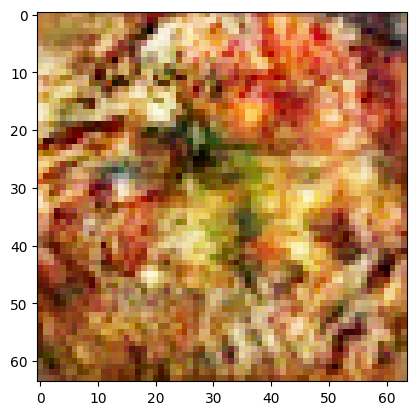

(9, 200, 200, 257, 0.7437940835952759, 0.4378117322921753)
(9, 200, 250, 257, 0.6845018863677979, 0.3536055088043213)
(10, 200, 0, 257, 0.5086798071861267, -0.24779807031154633)
(10, 200, 50, 257, 0.5925577282905579, 0.293165922164917)
(10, 200, 100, 257, 0.6932033896446228, 0.4168378710746765)
(10, 200, 150, 257, 0.7390421032905579, 0.4871940314769745)
(10, 200, 200, 257, 0.49836328625679016, 0.4962238073348999)
(10, 200, 250, 257, 0.702863872051239, 0.5079762935638428)
(11, 200, 0, 257, 0.6047791242599487, 0.29343166947364807)
(11, 200, 50, 257, 0.6774337291717529, 0.4502679705619812)
(11, 200, 100, 257, 0.752572774887085, 0.28709954023361206)
(11, 200, 150, 257, 0.7880686521530151, 0.34304702281951904)


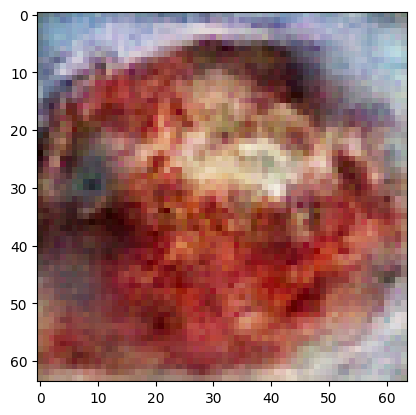

(11, 200, 200, 257, 0.8158426880836487, 0.5852600336074829)
(11, 200, 250, 257, 0.8339735269546509, 0.580152153968811)
(12, 200, 0, 257, 0.7375043034553528, 0.30941101908683777)
(12, 200, 50, 257, 0.6944252252578735, 0.530339241027832)
(12, 200, 100, 257, 0.8623309135437012, 0.5173376798629761)
(12, 200, 150, 257, 0.8601110577583313, 0.5170273184776306)
(12, 200, 200, 257, 0.8514734506607056, 0.3024052083492279)
(12, 200, 250, 257, 0.8721059560775757, 0.4448373317718506)
(13, 200, 0, 257, 0.9148498773574829, 0.46140486001968384)
(13, 200, 50, 257, 0.8241117000579834, 0.21665510535240173)
(13, 200, 100, 257, 0.8826760053634644, 0.3931804299354553)
(13, 200, 150, 257, 0.7846783399581909, 0.4140963554382324)


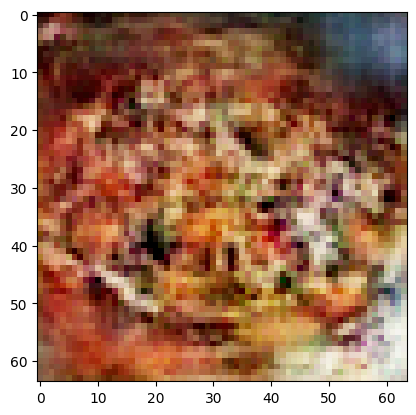

(13, 200, 200, 257, 0.936788022518158, 0.5546032786369324)
(13, 200, 250, 257, 0.7802942991256714, 0.4446009695529938)
(14, 200, 0, 257, 0.9172102212905884, 0.5401602387428284)
(14, 200, 50, 257, 0.8095993995666504, 0.44150274991989136)
(14, 200, 100, 257, 0.8761969804763794, 0.4273279309272766)
(14, 200, 150, 257, 0.9218313694000244, 0.40114617347717285)
(14, 200, 200, 257, 0.8797933459281921, 0.5759456157684326)
(14, 200, 250, 257, 0.9718594551086426, 0.4455564618110657)
(15, 200, 0, 257, 0.8497231006622314, 0.43048661947250366)
(15, 200, 50, 257, 0.7478156089782715, 0.38015496730804443)
(15, 200, 100, 257, 0.8660202026367188, 0.5143528580665588)


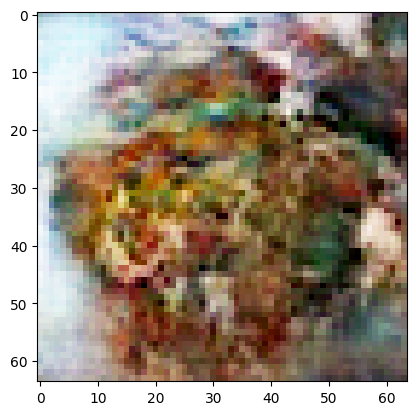

(15, 200, 150, 257, 0.8907431364059448, 0.4419144093990326)
(15, 200, 200, 257, 0.901897668838501, 0.5865384340286255)
(15, 200, 250, 257, 0.8821205496788025, 0.5936098098754883)
(16, 200, 0, 257, 1.0330082178115845, 0.6233396530151367)
(16, 200, 50, 257, 0.8089038133621216, 0.35013657808303833)
(16, 200, 100, 257, 0.850906252861023, 0.4903719425201416)
(16, 200, 150, 257, 0.8584924936294556, 0.5450452566146851)
(16, 200, 200, 257, 0.7974459528923035, -0.039969734847545624)
(16, 200, 250, 257, 0.8617854118347168, 0.33738791942596436)
(17, 200, 0, 257, 0.8468374609947205, 0.5161129832267761)
(17, 200, 50, 257, 0.8287556767463684, 0.467857301235199)
(17, 200, 100, 257, 0.7455509305000305, 0.4690495729446411)


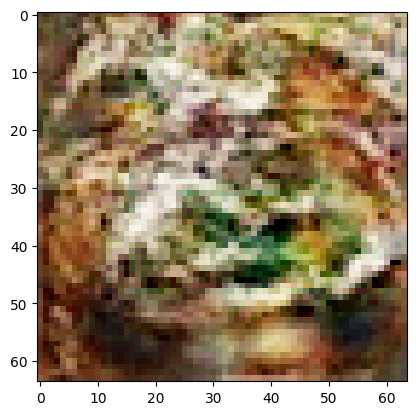

(17, 200, 150, 257, 0.5478407144546509, 0.6672300696372986)
(17, 200, 200, 257, 0.8206095099449158, 0.22620627284049988)
(17, 200, 250, 257, 0.8438464999198914, 0.5170766115188599)
(18, 200, 0, 257, 0.8990098237991333, 0.5025442838668823)
(18, 200, 50, 257, 0.8072816133499146, 0.4068424701690674)
(18, 200, 100, 257, 0.816456139087677, 0.5392419099807739)
(18, 200, 150, 257, 0.8406165838241577, 0.6091660857200623)
(18, 200, 200, 257, 0.8950783014297485, 0.40701258182525635)
(18, 200, 250, 257, 0.775938093662262, 0.07108502835035324)
(19, 200, 0, 257, 0.8685158491134644, 0.645524263381958)
(19, 200, 50, 257, 0.7890603542327881, 0.15367068350315094)
(19, 200, 100, 257, 0.8204628229141235, 0.5842596888542175)


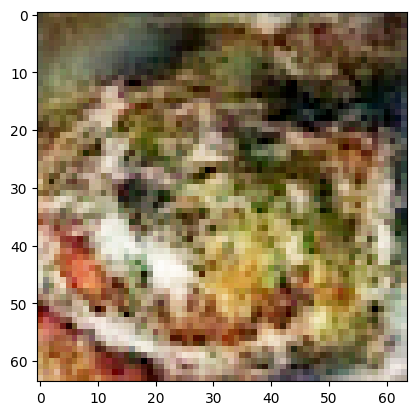

(19, 200, 150, 257, 0.8295882940292358, 0.5762537717819214)
(19, 200, 200, 257, 0.8298467993736267, 0.3754701614379883)
(19, 200, 250, 257, 0.7596811652183533, 0.2746950387954712)
(20, 200, 0, 257, 0.8609923720359802, 0.44698458909988403)
(20, 200, 50, 257, 0.7398674488067627, 0.31501275300979614)
(20, 200, 100, 257, 0.8017292022705078, 0.5416594743728638)
(20, 200, 150, 257, 0.7970503568649292, 0.5716837048530579)
(20, 200, 200, 257, 0.8583754301071167, 0.41630956530570984)
(20, 200, 250, 257, 0.8092667460441589, 0.4924957752227783)
(21, 200, 0, 257, 0.8173996210098267, 0.46347081661224365)
(21, 200, 50, 257, 0.764732837677002, 0.26797568798065186)
(21, 200, 100, 257, 0.8196892738342285, 0.43724969029426575)


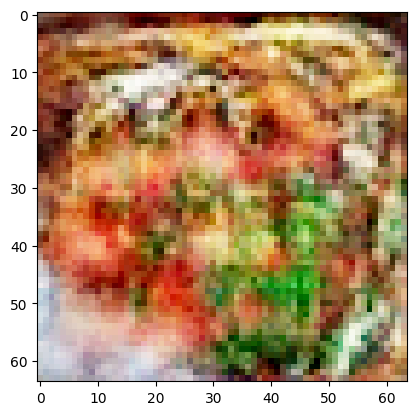

(21, 200, 150, 257, 0.8063189387321472, 0.4977884292602539)
(21, 200, 200, 257, 0.7982288599014282, 0.43867796659469604)
(21, 200, 250, 257, 0.753899872303009, 0.5214992761611938)
(22, 200, 0, 257, 0.8366118669509888, 0.42766040563583374)
(22, 200, 50, 257, 0.7563544511795044, 0.4917801022529602)
(22, 200, 100, 257, 0.7067337036132812, 0.5083865523338318)
(22, 200, 150, 257, 0.7589237093925476, 0.5274988412857056)
(22, 200, 200, 257, 0.8075388669967651, 0.3279710114002228)
(22, 200, 250, 257, 0.7427425384521484, 0.31294742226600647)
(23, 200, 0, 257, 0.7451965808868408, 0.4537007808685303)
(23, 200, 50, 257, 0.6886661052703857, 0.44388872385025024)


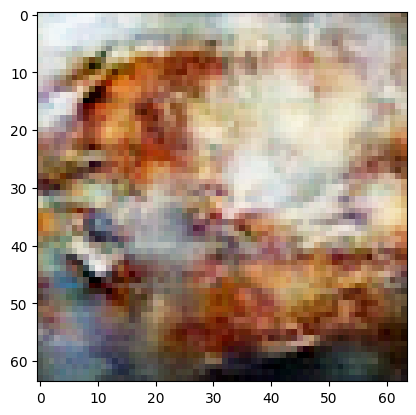

(23, 200, 100, 257, 0.7245470285415649, 0.5663503408432007)
(23, 200, 150, 257, 0.7485988736152649, 0.2804640531539917)
(23, 200, 200, 257, 0.7203586101531982, 0.16098961234092712)
(23, 200, 250, 257, 0.7790263891220093, 0.5087156295776367)
(24, 200, 0, 257, 0.607502818107605, 0.4526030421257019)
(24, 200, 50, 257, 0.6622282862663269, 0.29896390438079834)
(24, 200, 100, 257, 0.7542734146118164, 0.018499761819839478)
(24, 200, 150, 257, 0.7604058980941772, 0.41634687781333923)
(24, 200, 200, 257, 0.7742173671722412, 0.4232243001461029)
(24, 200, 250, 257, 0.7497280836105347, 0.3840874433517456)
(25, 200, 0, 257, 0.7394514083862305, 0.5683294534683228)
(25, 200, 50, 257, 0.7153893709182739, 0.4097825288772583)


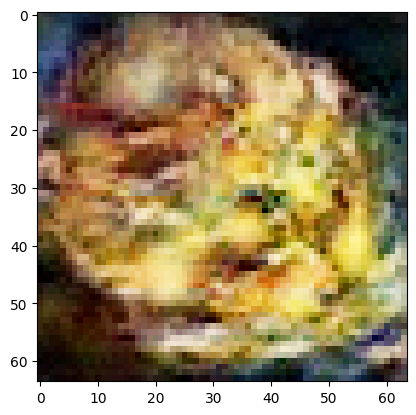

(25, 200, 100, 257, 0.7853190302848816, 0.5324644446372986)
(25, 200, 150, 257, 0.7594834566116333, 0.49150946736335754)
(25, 200, 200, 257, 0.7682133913040161, 0.4696056842803955)
(25, 200, 250, 257, 0.6923526525497437, 0.585063636302948)
(26, 200, 0, 257, 0.7540023326873779, 0.42503291368484497)
(26, 200, 50, 257, 0.6653321981430054, 0.2520740032196045)
(26, 200, 100, 257, 0.7750018835067749, 0.4881426990032196)
(26, 200, 150, 257, 0.7580103278160095, 0.5720185041427612)
(26, 200, 200, 257, 0.7030413150787354, 0.3679734468460083)
(26, 200, 250, 257, 0.7612428665161133, 0.42968451976776123)
(27, 200, 0, 257, 0.7535587549209595, 0.3656366467475891)
(27, 200, 50, 257, 0.619727373123169, 0.1968209147453308)


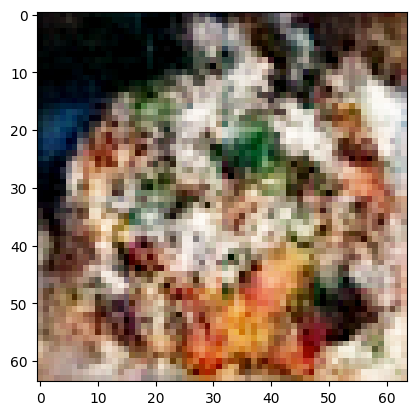

(27, 200, 100, 257, 0.6366145014762878, 0.20316940546035767)
(27, 200, 150, 257, 0.6615267992019653, 0.4086094796657562)
(27, 200, 200, 257, 0.7591406106948853, 0.35433176159858704)
(27, 200, 250, 257, 0.6853643655776978, 0.4909057915210724)
(28, 200, 0, 257, 0.6051765084266663, 0.24327269196510315)
(28, 200, 50, 257, 0.6618392467498779, 0.1944081038236618)
(28, 200, 100, 257, 0.6905839443206787, 0.4615896940231323)
(28, 200, 150, 257, 0.7427864074707031, 0.5721573829650879)
(28, 200, 200, 257, 0.7737592458724976, 0.45257508754730225)
(28, 200, 250, 257, 0.7171487808227539, 0.4640505909919739)
(29, 200, 0, 257, 0.6070036888122559, 0.5320655703544617)


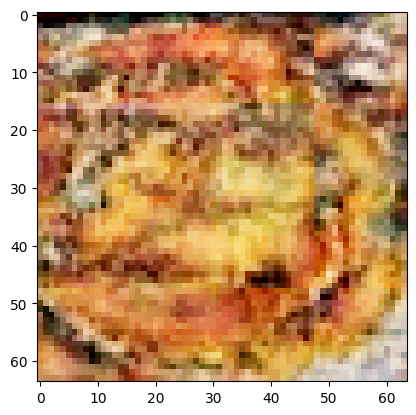

(29, 200, 50, 257, 0.6702334880828857, 0.41824984550476074)
(29, 200, 100, 257, 0.6968132853507996, 0.21205903589725494)
(29, 200, 150, 257, 0.6860784888267517, 0.5467941761016846)
(29, 200, 200, 257, 0.7713953852653503, 0.5128649473190308)
(29, 200, 250, 257, 0.64377760887146, 0.4430885314941406)
(30, 200, 0, 257, 0.7014756202697754, 0.1255803406238556)
(30, 200, 50, 257, 0.6114187240600586, 0.12369560450315475)
(30, 200, 100, 257, 0.7090941667556763, 0.40658390522003174)
(30, 200, 150, 257, 0.47018328309059143, -0.011416461318731308)
(30, 200, 200, 257, 0.7282131910324097, 0.4569314122200012)
(30, 200, 250, 257, 0.5774298906326294, 0.5341616868972778)
(31, 200, 0, 257, 0.70355623960495, 0.2436995953321457)


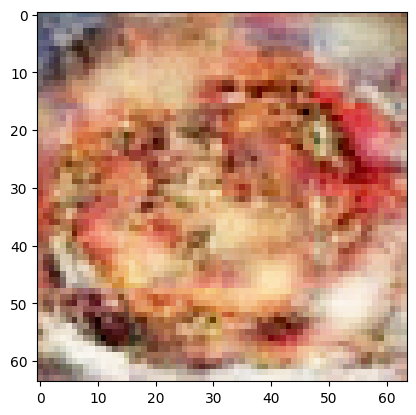

(31, 200, 50, 257, 0.6165493726730347, 0.36307215690612793)
(31, 200, 100, 257, 0.6170253753662109, 0.5216109752655029)
(31, 200, 150, 257, 0.7203871011734009, 0.26892751455307007)
(31, 200, 200, 257, 0.7307710647583008, 0.5408139228820801)
(31, 200, 250, 257, 0.6444653272628784, 0.5307478308677673)
(32, 200, 0, 257, 0.6983038187026978, 0.5039891004562378)
(32, 200, 50, 257, 0.6131136417388916, 0.34248071908950806)
(32, 200, 100, 257, 0.7059893608093262, 0.47316473722457886)
(32, 200, 150, 257, 0.5630562901496887, -0.11419463157653809)
(32, 200, 200, 257, 0.7169899940490723, 0.43995368480682373)
(32, 200, 250, 257, 0.6451419591903687, 0.2621297240257263)
(33, 200, 0, 257, 0.704564094543457, 0.30946728587150574)


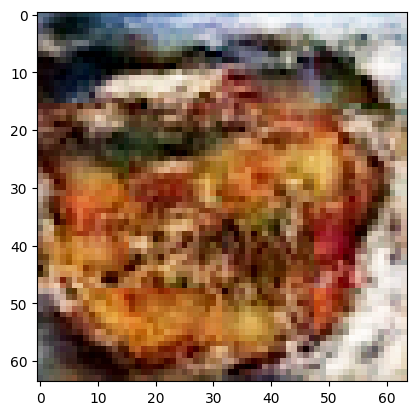

(33, 200, 50, 257, 0.5595739483833313, 0.1718062311410904)
(33, 200, 100, 257, 0.7305288314819336, 0.4558628797531128)
(33, 200, 150, 257, 0.7407684922218323, 0.25873833894729614)
(33, 200, 200, 257, 0.7024731636047363, 0.48089826107025146)
(33, 200, 250, 257, 0.6093125343322754, 0.11220501363277435)
(34, 200, 0, 257, 0.703207790851593, 0.4340285658836365)
(34, 200, 50, 257, 0.49693548679351807, 0.27194496989250183)
(34, 200, 100, 257, 0.6963655948638916, 0.3525505065917969)
(34, 200, 150, 257, 0.5340661406517029, 0.42767733335494995)
(34, 200, 200, 257, 0.6103332042694092, 0.5119432806968689)
(34, 200, 250, 257, 0.6900838613510132, 0.1550782173871994)
(35, 200, 0, 257, 0.6182931661605835, 0.5995039939880371)


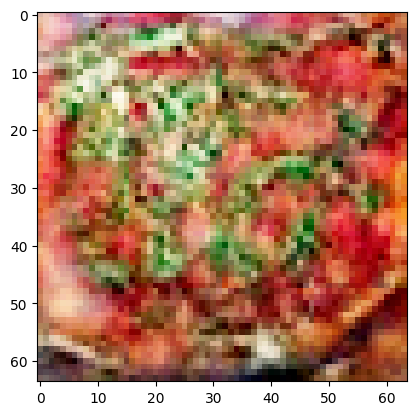

(35, 200, 50, 257, 0.609136700630188, 0.38699743151664734)
(35, 200, 100, 257, 0.6024150848388672, 0.4276580214500427)
(35, 200, 150, 257, 0.2808465361595154, 0.2118939757347107)
(35, 200, 200, 257, 0.7199236154556274, 0.4512903094291687)
(35, 200, 250, 257, 0.6917002201080322, 0.3811400532722473)
(36, 200, 0, 257, 0.49049124121665955, 0.27640441060066223)
(36, 200, 50, 257, 0.5338164567947388, 0.23709312081336975)
(36, 200, 100, 257, 0.5942845344543457, 0.5144764184951782)
(36, 200, 150, 257, 0.4947724938392639, 0.511926531791687)
(36, 200, 200, 257, 0.7516347169876099, 0.5416181087493896)


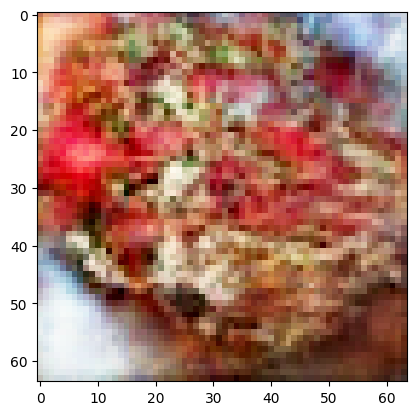

(36, 200, 250, 257, 0.6704225540161133, 0.5332800149917603)
(37, 200, 0, 257, 0.7088878154754639, -0.03279401734471321)
(37, 200, 50, 257, 0.5847756862640381, 0.46700403094291687)
(37, 200, 100, 257, 0.7509484887123108, 0.41492900252342224)
(37, 200, 150, 257, 0.854538083076477, 0.5562975406646729)
(37, 200, 200, 257, 0.7939120531082153, 0.4865129590034485)
(37, 200, 250, 257, 0.7842003107070923, 0.5713375806808472)
(38, 200, 0, 257, 0.7819045782089233, 0.5294509530067444)
(38, 200, 50, 257, 0.5834219455718994, 0.44830864667892456)
(38, 200, 100, 257, 0.7846189737319946, 0.45206087827682495)
(38, 200, 150, 257, 0.8407190442085266, 0.5253582000732422)
(38, 200, 200, 257, 0.9935119152069092, 0.28948038816452026)


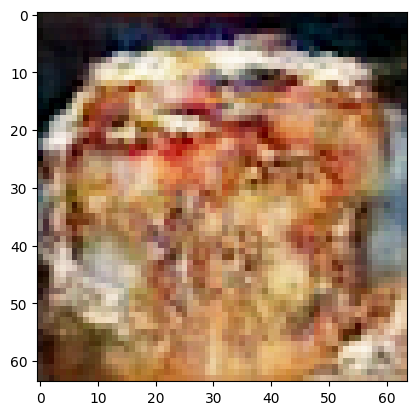

(38, 200, 250, 257, 0.7703258991241455, 0.4724905788898468)
(39, 200, 0, 257, 0.7810381054878235, 0.4941839873790741)
(39, 200, 50, 257, 0.6797812581062317, 0.15830880403518677)
(39, 200, 100, 257, 0.7025852203369141, 0.4005255103111267)
(39, 200, 150, 257, 0.8195843696594238, 0.5448845624923706)
(39, 200, 200, 257, 0.803189754486084, 0.5680367946624756)
(39, 200, 250, 257, 0.7317174077033997, 0.46916618943214417)
(40, 200, 0, 257, 0.7799156308174133, 0.320345938205719)
(40, 200, 50, 257, 0.6589348316192627, 0.26409268379211426)
(40, 200, 100, 257, 0.8012385964393616, 0.5618377923965454)
(40, 200, 150, 257, 0.768808901309967, 0.09263220429420471)
(40, 200, 200, 257, 0.6985652446746826, 0.5853589773178101)


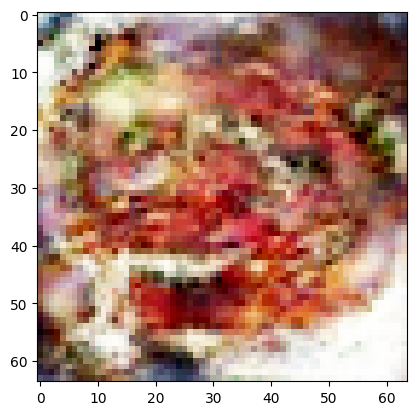

(40, 200, 250, 257, 0.7574102878570557, 0.4215906858444214)
(41, 200, 0, 257, 0.7066104412078857, 0.5383207201957703)
(41, 200, 50, 257, 0.5882600545883179, 0.24190697073936462)
(41, 200, 100, 257, 0.7626687288284302, 0.47517359256744385)
(41, 200, 150, 257, 0.7525866031646729, 0.4603915810585022)
(41, 200, 200, 257, 0.7631908655166626, 0.49870556592941284)
(41, 200, 250, 257, 0.5938802361488342, 0.5413497686386108)
(42, 200, 0, 257, 0.7743917107582092, 0.47731152176856995)
(42, 200, 50, 257, 0.6378066539764404, 0.22144515812397003)
(42, 200, 100, 257, 0.7830834984779358, 0.43491411209106445)
(42, 200, 150, 257, 0.755070686340332, 0.5973178148269653)
(42, 200, 200, 257, 0.6682057976722717, 0.5122562050819397)


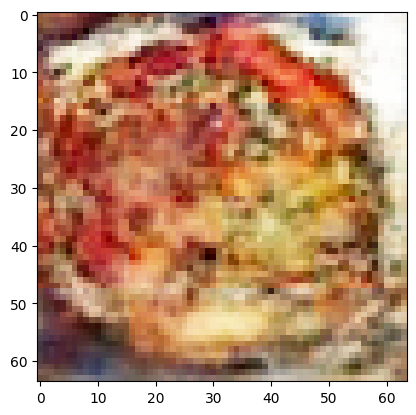

(42, 200, 250, 257, 0.683870792388916, 0.4369003176689148)
(43, 200, 0, 257, 0.7594897747039795, 0.46489888429641724)
(43, 200, 50, 257, 0.5994566679000854, 0.27574533224105835)
(43, 200, 100, 257, 0.6761577129364014, 0.5221114158630371)
(43, 200, 150, 257, 0.690483033657074, 0.5416263937950134)
(43, 200, 200, 257, 0.7407526969909668, 0.49163180589675903)
(43, 200, 250, 257, 0.7037879228591919, 0.4032707214355469)
(44, 200, 0, 257, 0.7378339767456055, 0.33839839696884155)
(44, 200, 50, 257, 0.5942550301551819, 0.3227134943008423)
(44, 200, 100, 257, 0.7630380392074585, 0.4761604368686676)
(44, 200, 150, 257, 0.6449970602989197, -0.02722320891916752)


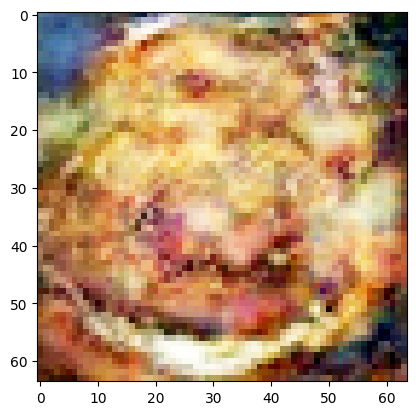

(44, 200, 200, 257, 0.6824019551277161, 0.5111554265022278)
(44, 200, 250, 257, 0.7180405259132385, 0.5137466192245483)
(45, 200, 0, 257, 0.7124018669128418, 0.44543886184692383)
(45, 200, 50, 257, 0.6742949485778809, 0.391622394323349)
(45, 200, 100, 257, 0.6117790341377258, 0.4872129261493683)
(45, 200, 150, 257, 0.7579663991928101, 0.41549813747406006)
(45, 200, 200, 257, 0.706192135810852, 0.49131059646606445)
(45, 200, 250, 257, 0.6313357949256897, 0.5319159030914307)
(46, 200, 0, 257, 0.672827959060669, 0.12774133682250977)
(46, 200, 50, 257, 0.5759789943695068, 0.42703524231910706)
(46, 200, 100, 257, 0.718468427658081, 0.5135190486907959)
(46, 200, 150, 257, 0.727431058883667, 0.5052059292793274)


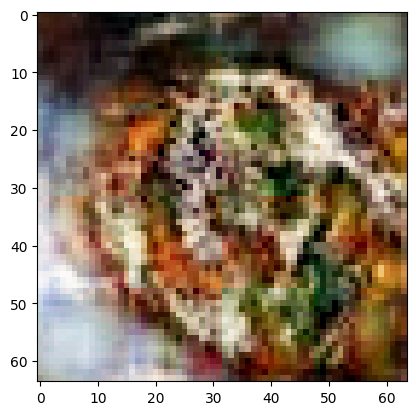

(46, 200, 200, 257, 0.7218172550201416, 0.4394453763961792)
(46, 200, 250, 257, 0.6762903928756714, 0.4196287989616394)
(47, 200, 0, 257, 0.746732771396637, 0.172926664352417)
(47, 200, 50, 257, 0.6256119012832642, 0.3575859069824219)
(47, 200, 100, 257, 0.6893028020858765, 0.5592979192733765)
(47, 200, 150, 257, 0.6757968664169312, 0.47404730319976807)
(47, 200, 200, 257, 0.7134355306625366, 0.2403450310230255)
(47, 200, 250, 257, 0.6700496673583984, 0.42396342754364014)
(48, 200, 0, 257, 0.6120264530181885, 0.42139366269111633)
(48, 200, 50, 257, 0.611163854598999, 0.3971758782863617)
(48, 200, 100, 257, 0.6994210481643677, 0.5152938961982727)
(48, 200, 150, 257, 0.6587810516357422, 0.4293043613433838)


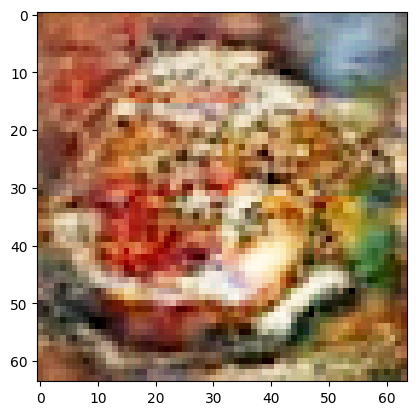

(48, 200, 200, 257, 0.6994572281837463, 0.48140424489974976)
(48, 200, 250, 257, 0.6925413608551025, 0.2239493429660797)
(49, 200, 0, 257, 0.6588931679725647, 0.37632328271865845)
(49, 200, 50, 257, 0.6022580862045288, 0.12774589657783508)
(49, 200, 100, 257, 0.7493147850036621, 0.5309629440307617)
(49, 200, 150, 257, 0.6757549047470093, 0.47916293144226074)
(49, 200, 200, 257, 0.7041760087013245, 0.37169110774993896)
(49, 200, 250, 257, 0.6549820899963379, 0.30172789096832275)
(50, 200, 0, 257, 0.6758922338485718, 0.4460682272911072)
(50, 200, 50, 257, 0.5619553327560425, 0.5101945400238037)
(50, 200, 100, 257, 0.6952546238899231, -0.11665748059749603)


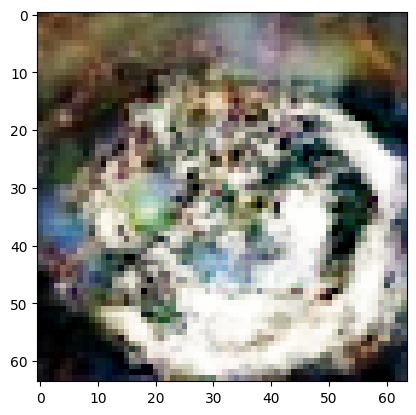

(50, 200, 150, 257, 0.7015572786331177, 0.5222954750061035)
(50, 200, 200, 257, 0.5795918703079224, -0.0866379588842392)
(50, 200, 250, 257, 0.6517574787139893, 0.09664260596036911)
(51, 200, 0, 257, 0.7176989316940308, 0.5238481760025024)
(51, 200, 50, 257, 0.5543964505195618, 0.2849327027797699)
(51, 200, 100, 257, 0.7018787860870361, 0.47812339663505554)
(51, 200, 150, 257, 0.6312515139579773, 0.5633432269096375)
(51, 200, 200, 257, 0.6789021492004395, 0.4779202938079834)
(51, 200, 250, 257, 0.6421284675598145, 0.005434401333332062)
(52, 200, 0, 257, 0.6787271499633789, 0.23261535167694092)
(52, 200, 50, 257, 0.5765230655670166, 0.3711707293987274)
(52, 200, 100, 257, 0.7090147137641907, 0.23454618453979492)


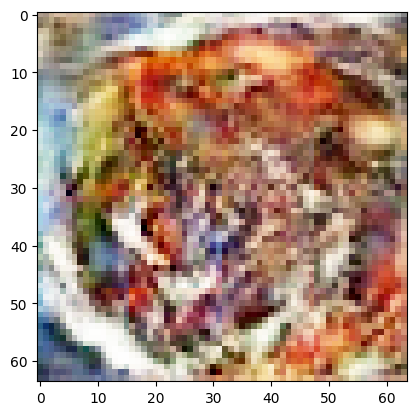

(52, 200, 150, 257, 0.6835653781890869, 0.35584741830825806)
(52, 200, 200, 257, 0.7219372987747192, 0.4206423759460449)
(52, 200, 250, 257, 0.6500020623207092, 0.44219279289245605)
(53, 200, 0, 257, 0.700699508190155, 0.5057629942893982)
(53, 200, 50, 257, 0.6176058650016785, 0.4125056266784668)
(53, 200, 100, 257, 0.6390811204910278, 0.14533722400665283)
(53, 200, 150, 257, 0.6802424192428589, 0.10011736303567886)
(53, 200, 200, 257, 0.6192352175712585, 0.49658000469207764)
(53, 200, 250, 257, 0.6251367330551147, 0.40300071239471436)
(54, 200, 0, 257, 0.6515673398971558, 0.317456990480423)
(54, 200, 50, 257, 0.5503619909286499, 0.2720821499824524)
(54, 200, 100, 257, 0.6307854652404785, 0.48905622959136963)


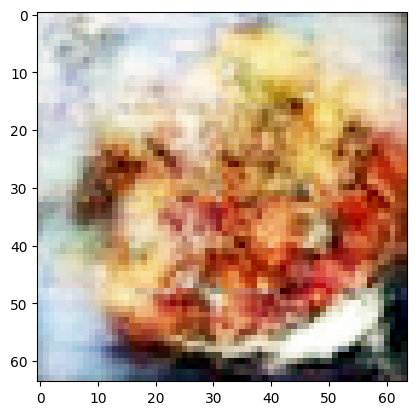

(54, 200, 150, 257, 0.5466037392616272, 0.4477410912513733)
(54, 200, 200, 257, 0.6720684766769409, 0.4485851526260376)
(54, 200, 250, 257, 0.6068130731582642, 0.44727078080177307)
(55, 200, 0, 257, 0.6187847852706909, 0.5398833751678467)
(55, 200, 50, 257, 0.5882764458656311, 0.3531796932220459)
(55, 200, 100, 257, 0.5681018233299255, 0.5161241292953491)
(55, 200, 150, 257, 0.5486432313919067, 0.5058714747428894)
(55, 200, 200, 257, 0.6405357122421265, 0.33415672183036804)
(55, 200, 250, 257, 0.5718454122543335, 0.43535369634628296)
(56, 200, 0, 257, 0.6991099715232849, 0.44873303174972534)
(56, 200, 50, 257, 0.5506298542022705, 0.16197890043258667)
(56, 200, 100, 257, 0.6838212609291077, 0.43200045824050903)


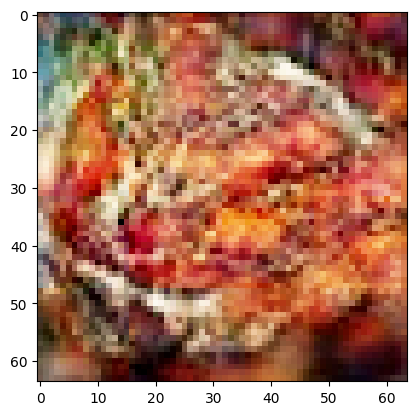

(56, 200, 150, 257, 0.6822100877761841, 0.494540274143219)
(56, 200, 200, 257, 0.6600549221038818, 0.24050989747047424)
(56, 200, 250, 257, 0.608425498008728, 0.21632400155067444)
(57, 200, 0, 257, 0.5441033840179443, 0.42525404691696167)
(57, 200, 50, 257, 0.5259044170379639, 0.2712947428226471)
(57, 200, 100, 257, 0.5980222225189209, 0.600631833076477)
(57, 200, 150, 257, 0.6384495496749878, 0.2776152789592743)
(57, 200, 200, 257, 0.5897811055183411, 0.1573716700077057)
(57, 200, 250, 257, 0.5782788991928101, -0.03291390836238861)
(58, 200, 0, 257, 0.6457726955413818, 0.4055922329425812)
(58, 200, 50, 257, 0.5602955222129822, 0.21636220812797546)


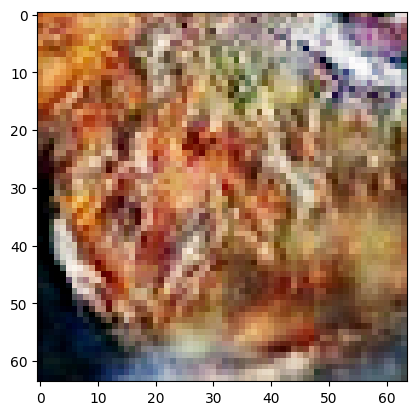

(58, 200, 100, 257, 0.5783248543739319, 0.5679414868354797)
(58, 200, 150, 257, 0.6541752219200134, 0.46383118629455566)
(58, 200, 200, 257, 0.5490296483039856, 0.4369775950908661)
(58, 200, 250, 257, 0.46035099029541016, 0.18956393003463745)
(59, 200, 0, 257, 0.6452928781509399, 0.45634686946868896)
(59, 200, 50, 257, 0.5217878818511963, 0.25808513164520264)
(59, 200, 100, 257, 0.6541094779968262, 0.47469353675842285)
(59, 200, 150, 257, 0.6744449138641357, 0.49213600158691406)
(59, 200, 200, 257, 0.6034456491470337, 0.3948451280593872)
(59, 200, 250, 257, 0.6025136709213257, 0.4566344618797302)
(60, 200, 0, 257, 0.6808162927627563, 0.34034621715545654)
(60, 200, 50, 257, 0.5462630987167358, 0.21655258536338806)


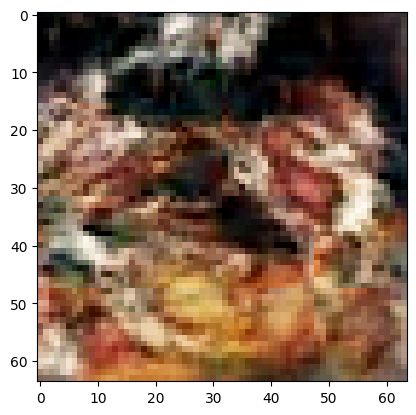

(60, 200, 100, 257, 0.6277968287467957, 0.4652019143104553)
(60, 200, 150, 257, 0.5385218262672424, 0.037101417779922485)
(60, 200, 200, 257, 0.6728223562240601, 0.3343503177165985)
(60, 200, 250, 257, 0.4506312906742096, 0.07207072526216507)
(61, 200, 0, 257, 0.6533694267272949, 0.3828054368495941)
(61, 200, 50, 257, 0.5234035849571228, 0.2175055742263794)
(61, 200, 100, 257, 0.6690919995307922, 0.5115799903869629)
(61, 200, 150, 257, 0.49925166368484497, 0.4203717112541199)
(61, 200, 200, 257, 0.6217880249023438, 0.4726051092147827)
(61, 200, 250, 257, 0.6320996880531311, 0.35605114698410034)
(62, 200, 0, 257, 0.6049110889434814, 0.5638910531997681)
(62, 200, 50, 257, 0.4373714029788971, 0.07447966933250427)


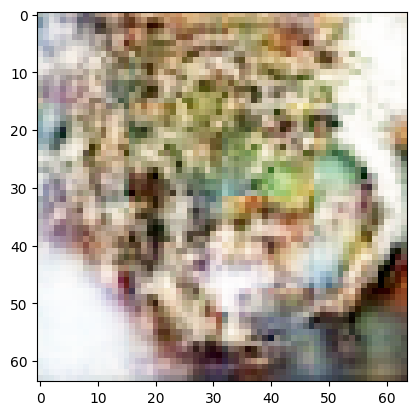

(62, 200, 100, 257, 0.6431093215942383, 0.45780661702156067)
(62, 200, 150, 257, 0.5628736615180969, 0.41759631037712097)
(62, 200, 200, 257, 0.6064769625663757, 0.46557286381721497)
(62, 200, 250, 257, 0.5977444648742676, 0.42574700713157654)
(63, 200, 0, 257, 0.6351147294044495, 0.4073829650878906)
(63, 200, 50, 257, 0.4693765938282013, 0.1472764015197754)
(63, 200, 100, 257, 0.6308338642120361, 0.45733481645584106)
(63, 200, 150, 257, 0.6095162034034729, 0.4544805884361267)
(63, 200, 200, 257, 0.6423681378364563, 0.3899790048599243)
(63, 200, 250, 257, 0.5656841993331909, 0.45977598428726196)
(64, 200, 0, 257, 0.6418126821517944, 0.3090519607067108)
(64, 200, 50, 257, 0.48795798420906067, 0.01053900271654129)


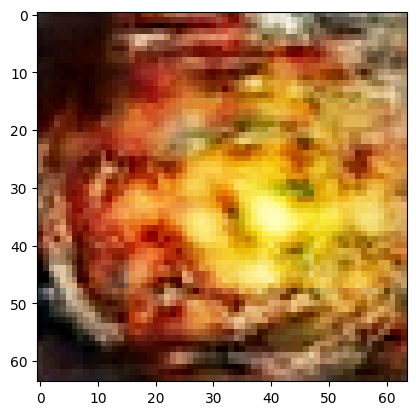

(64, 200, 100, 257, 0.6198321580886841, -0.12264871597290039)
(64, 200, 150, 257, 0.6062323451042175, 0.4507569670677185)
(64, 200, 200, 257, 0.6336609721183777, 0.2664378881454468)
(64, 200, 250, 257, 0.5322922468185425, 0.10545700043439865)
(65, 200, 0, 257, 0.49527469277381897, 0.40828436613082886)
(65, 200, 50, 257, 0.5255817174911499, 0.1187431588768959)
(65, 200, 100, 257, 0.629453718662262, 0.36644092202186584)
(65, 200, 150, 257, 0.6550334692001343, 0.43717682361602783)
(65, 200, 200, 257, 0.6405471563339233, 0.3105922341346741)
(65, 200, 250, 257, 0.6287779808044434, 0.3718281686306)
(66, 200, 0, 257, 0.5028573274612427, 0.47007086873054504)


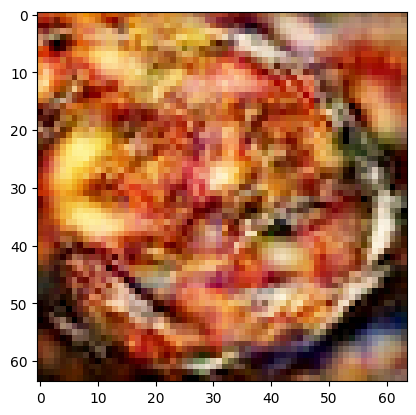

(66, 200, 50, 257, 0.5487662553787231, 0.1915806233882904)
(66, 200, 100, 257, 0.6229382157325745, 0.34333837032318115)
(66, 200, 150, 257, 0.6037424802780151, 0.4600974917411804)
(66, 200, 200, 257, 0.697376012802124, 0.29192811250686646)
(66, 200, 250, 257, 0.4308848977088928, 0.2752319574356079)
(67, 200, 0, 257, 0.6560420393943787, 0.37334179878234863)
(67, 200, 50, 257, 0.47433045506477356, 0.14614994823932648)
(67, 200, 100, 257, 0.6249517202377319, 0.17688576877117157)
(67, 200, 150, 257, 0.6315358281135559, 0.17803144454956055)
(67, 200, 200, 257, 0.6836787462234497, 0.37994223833084106)
(67, 200, 250, 257, 0.5542048215866089, 0.444716215133667)
(68, 200, 0, 257, 0.5610005259513855, 0.2433215081691742)


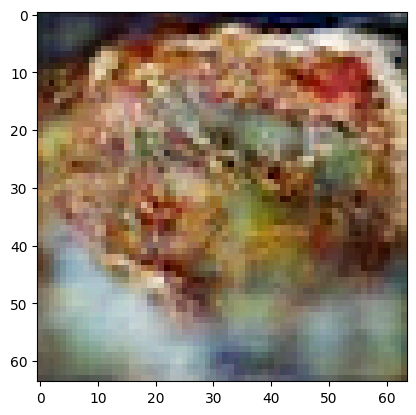

(68, 200, 50, 257, 0.42473453283309937, 0.17060841619968414)
(68, 200, 100, 257, 0.6264030933380127, 0.5325087308883667)
(68, 200, 150, 257, 0.5991365313529968, 0.5072974562644958)
(68, 200, 200, 257, 0.5845783352851868, 0.002832252299413085)
(68, 200, 250, 257, 0.45283785462379456, 0.19501224160194397)
(69, 200, 0, 257, 0.6532443761825562, 0.3358425796031952)
(69, 200, 50, 257, 0.48389655351638794, 0.1996537744998932)
(69, 200, 100, 257, 0.6610405445098877, 0.4605889916419983)
(69, 200, 150, 257, 0.6092947721481323, 0.3836461901664734)
(69, 200, 200, 257, 0.6398676633834839, 0.43220096826553345)
(69, 200, 250, 257, 0.5934528708457947, 0.39105749130249023)
(70, 200, 0, 257, 0.6294940114021301, 0.4666600823402405)


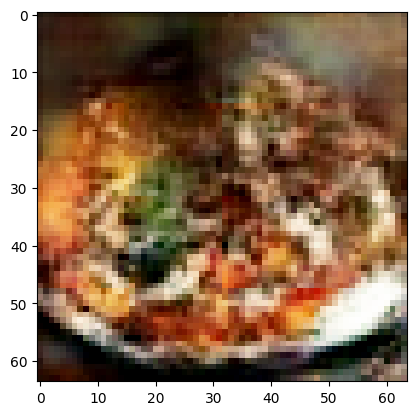

(70, 200, 50, 257, 0.5066462755203247, 0.15789365768432617)
(70, 200, 100, 257, 0.6340348124504089, 0.08015631139278412)
(70, 200, 150, 257, 0.6188783049583435, 0.4380650222301483)
(70, 200, 200, 257, 0.6013848781585693, 0.5425567030906677)
(70, 200, 250, 257, 0.5729011297225952, 0.32464486360549927)
(71, 200, 0, 257, 0.44407618045806885, 0.5238060355186462)
(71, 200, 50, 257, 0.5514274835586548, 0.26212114095687866)
(71, 200, 100, 257, 0.6755237579345703, 0.4074034094810486)
(71, 200, 150, 257, 0.6316732168197632, 0.3038056492805481)
(71, 200, 200, 257, 0.5901015400886536, 0.4728880226612091)
(71, 200, 250, 257, 0.6032917499542236, 0.3619636297225952)


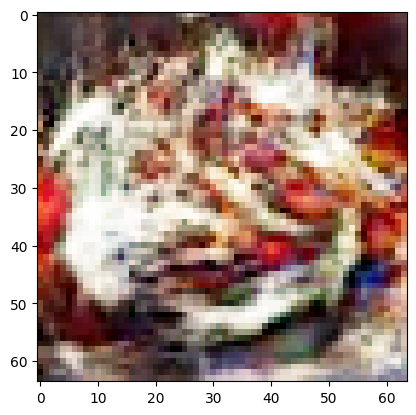

(72, 200, 0, 257, 0.42774221301078796, 0.43831613659858704)
(72, 200, 50, 257, 0.45481282472610474, 0.04614705219864845)
(72, 200, 100, 257, 0.68646240234375, 0.5186361074447632)
(72, 200, 150, 257, 0.505141019821167, 0.5432382225990295)
(72, 200, 200, 257, 0.6899121403694153, 0.3542478084564209)
(72, 200, 250, 257, 0.5864202976226807, 0.4052604138851166)
(73, 200, 0, 257, 0.6472291946411133, 0.34382206201553345)
(73, 200, 50, 257, 0.35901516675949097, 0.38976436853408813)
(73, 200, 100, 257, 0.6916539072990417, 0.3013070821762085)
(73, 200, 150, 257, 0.44743090867996216, -0.04994836449623108)
(73, 200, 200, 257, 0.6493917107582092, 0.4800906181335449)


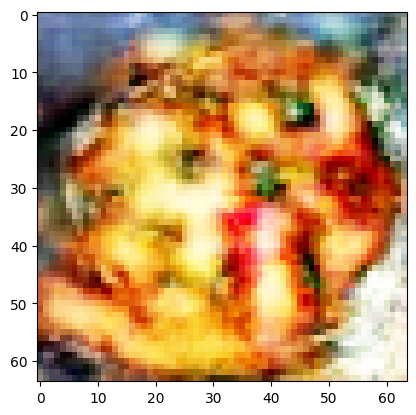

(73, 200, 250, 257, 0.6337062120437622, 0.02242443338036537)
(74, 200, 0, 257, 0.6453380584716797, 0.3653133511543274)
(74, 200, 50, 257, 0.5479098558425903, 0.16503122448921204)
(74, 200, 100, 257, 0.6903564929962158, 0.5214786529541016)
(74, 200, 150, 257, 0.6200144290924072, 0.6039848923683167)
(74, 200, 200, 257, 0.7004768252372742, 0.32510071992874146)
(74, 200, 250, 257, 0.6331976652145386, 0.24631837010383606)
(75, 200, 0, 257, 0.6589432954788208, 0.4756105840206146)
(75, 200, 50, 257, 0.466665655374527, 0.24033209681510925)
(75, 200, 100, 257, 0.6727191209793091, 0.31348443031311035)
(75, 200, 150, 257, 0.6858338713645935, 0.3850235044956207)
(75, 200, 200, 257, 0.6644148826599121, 0.34859490394592285)


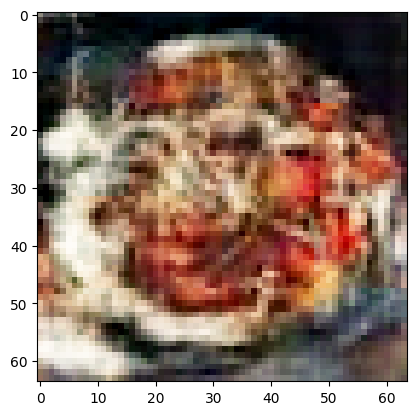

(75, 200, 250, 257, 0.6145292520523071, 0.25619760155677795)
(76, 200, 0, 257, 0.6704415082931519, 0.39466750621795654)
(76, 200, 50, 257, 0.4248432517051697, 0.18229889869689941)
(76, 200, 100, 257, 0.6904493570327759, 0.3950231671333313)
(76, 200, 150, 257, 0.6132299900054932, 0.4609447121620178)
(76, 200, 200, 257, 0.6670160293579102, 0.12214647233486176)
(76, 200, 250, 257, 0.536416232585907, 0.5170677304267883)
(77, 200, 0, 257, 0.6182602047920227, 0.2351752668619156)
(77, 200, 50, 257, 0.5228513479232788, 0.31824398040771484)
(77, 200, 100, 257, 0.640922486782074, 0.4957887530326843)
(77, 200, 150, 257, 0.6148815155029297, 0.5374427437782288)
(77, 200, 200, 257, 0.6400351524353027, 0.5753697156906128)


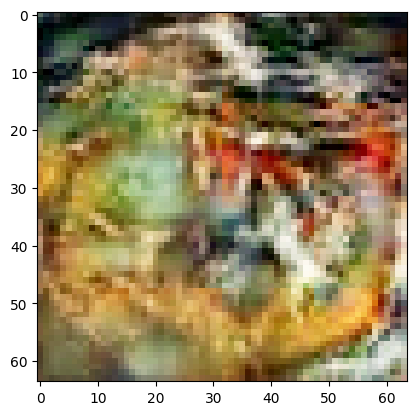

(77, 200, 250, 257, 0.5948070287704468, 0.18654699623584747)
(78, 200, 0, 257, 0.6396365761756897, 0.38807958364486694)
(78, 200, 50, 257, 0.5429792404174805, 0.31314846873283386)
(78, 200, 100, 257, 0.6810333728790283, 0.4847772419452667)
(78, 200, 150, 257, 0.6620931625366211, 0.49127769470214844)
(78, 200, 200, 257, 0.6381611824035645, 0.33461934328079224)
(78, 200, 250, 257, 0.6081017255783081, 0.31328800320625305)
(79, 200, 0, 257, 0.6616162657737732, 0.4675055742263794)
(79, 200, 50, 257, 0.5890944004058838, 0.18329066038131714)
(79, 200, 100, 257, 0.6999803781509399, 0.5475457310676575)
(79, 200, 150, 257, 0.5727882385253906, 0.47899457812309265)


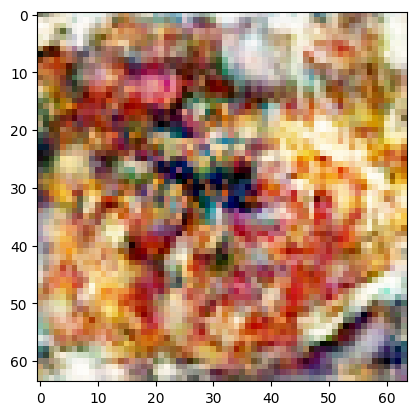

(79, 200, 200, 257, 0.5517675280570984, 0.4102693796157837)
(79, 200, 250, 257, 0.6331931948661804, 0.3684055805206299)
(80, 200, 0, 257, 0.6094952821731567, 0.4303129315376282)
(80, 200, 50, 257, 0.5562489032745361, 0.2398487776517868)
(80, 200, 100, 257, 0.6410837173461914, 0.5302279591560364)
(80, 200, 150, 257, 0.6741169691085815, 0.25909602642059326)
(80, 200, 200, 257, 0.6422187089920044, 0.48903316259384155)
(80, 200, 250, 257, 0.5540750622749329, 0.29357433319091797)
(81, 200, 0, 257, 0.6179560422897339, 0.49463844299316406)
(81, 200, 50, 257, 0.5797945261001587, 0.27803170680999756)
(81, 200, 100, 257, 0.6123298406600952, 0.479358434677124)
(81, 200, 150, 257, 0.6562833786010742, 0.561826229095459)


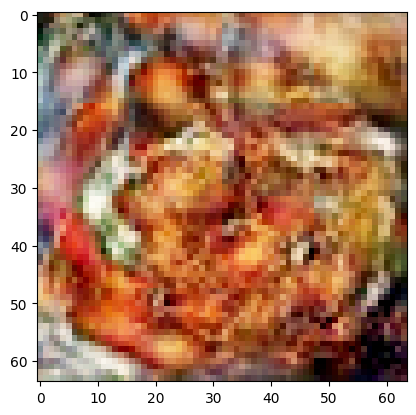

(81, 200, 200, 257, 0.6701840758323669, 0.3786264955997467)
(81, 200, 250, 257, 0.6393154859542847, 0.4548876881599426)
(82, 200, 0, 257, 0.6277881860733032, 0.37458446621894836)
(82, 200, 50, 257, 0.3208661675453186, 0.42024874687194824)
(82, 200, 100, 257, 0.701081395149231, 0.4576437473297119)
(82, 200, 150, 257, 0.6544026136398315, 0.517130970954895)
(82, 200, 200, 257, 0.6548424959182739, 0.3002363443374634)
(82, 200, 250, 257, 0.6332327127456665, 0.2628290057182312)
(83, 200, 0, 257, 0.5397874116897583, 0.2599402368068695)
(83, 200, 50, 257, 0.37370285391807556, 0.4496147036552429)
(83, 200, 100, 257, 0.6575138568878174, 0.2937070429325104)
(83, 200, 150, 257, 0.6224613189697266, 0.18073783814907074)


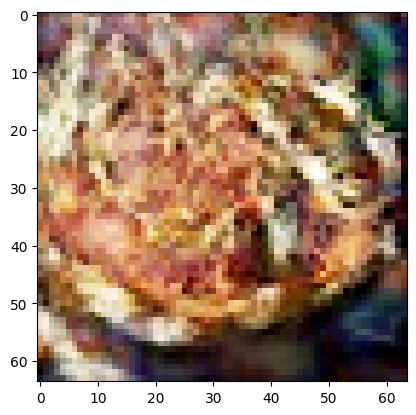

(83, 200, 200, 257, 0.6626980304718018, 0.5163358449935913)
(83, 200, 250, 257, 0.6047303676605225, 0.3293965458869934)
(84, 200, 0, 257, 0.6408871412277222, 0.18612542748451233)
(84, 200, 50, 257, 0.5435724258422852, 0.14987662434577942)
(84, 200, 100, 257, 0.6102988719940186, 0.23644565045833588)
(84, 200, 150, 257, 0.6782017350196838, 0.4784494936466217)
(84, 200, 200, 257, 0.6220777034759521, 0.5074448585510254)
(84, 200, 250, 257, 0.5524569749832153, -0.022390838712453842)
(85, 200, 0, 257, 0.6521164178848267, 0.4457240700721741)
(85, 200, 50, 257, 0.5164393186569214, 0.14535905420780182)
(85, 200, 100, 257, 0.679100513458252, 0.4677373766899109)
(85, 200, 150, 257, 0.6035696864128113, 0.5391433238983154)


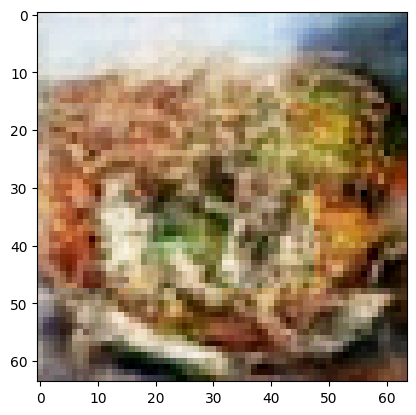

(85, 200, 200, 257, 0.6882966756820679, 0.41578933596611023)
(85, 200, 250, 257, 0.509075939655304, 0.3361429274082184)
(86, 200, 0, 257, 0.6787692308425903, 0.39818039536476135)
(86, 200, 50, 257, 0.5457523465156555, 0.10851693153381348)
(86, 200, 100, 257, 0.5700584650039673, 0.459137886762619)
(86, 200, 150, 257, 0.6375136971473694, 0.34548377990722656)
(86, 200, 200, 257, 0.5961851477622986, -0.09831009060144424)
(86, 200, 250, 257, 0.4915105700492859, 0.3586799204349518)
(87, 200, 0, 257, 0.5830812454223633, 0.5555825233459473)
(87, 200, 50, 257, 0.5271168947219849, 0.202993705868721)
(87, 200, 100, 257, 0.6914617419242859, 0.4459206461906433)


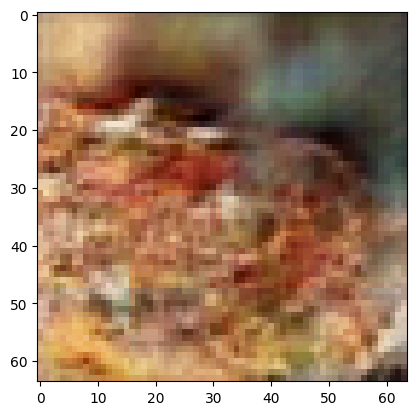

(87, 200, 150, 257, 0.6172192096710205, 0.47796526551246643)
(87, 200, 200, 257, 0.6309327483177185, 0.5085195302963257)
(87, 200, 250, 257, 0.5863845348358154, 0.276997447013855)
(88, 200, 0, 257, 0.5666468739509583, 0.4894777238368988)
(88, 200, 50, 257, 0.5165730714797974, 0.1975194662809372)
(88, 200, 100, 257, 0.682651698589325, 0.2857007384300232)
(88, 200, 150, 257, 0.5801390409469604, 0.37836623191833496)
(88, 200, 200, 257, 0.623771071434021, 0.4062348008155823)
(88, 200, 250, 257, 0.5832003951072693, 0.3937338590621948)
(89, 200, 0, 257, 0.5638923645019531, 0.31952208280563354)
(89, 200, 50, 257, 0.512863039970398, -0.007065395824611187)
(89, 200, 100, 257, 0.6423659324645996, 0.4015123248100281)


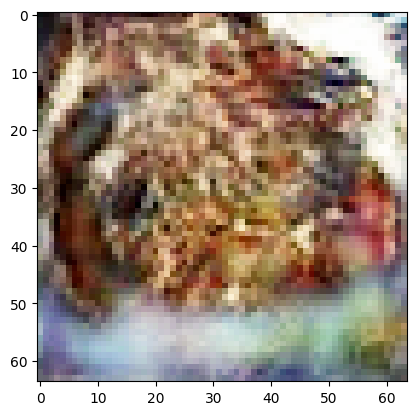

(89, 200, 150, 257, 0.6536827087402344, 0.11352019011974335)
(89, 200, 200, 257, 0.6574743986129761, 0.44112130999565125)
(89, 200, 250, 257, 0.5650695562362671, 0.10204999148845673)
(90, 200, 0, 257, 0.6292871236801147, 0.3264947533607483)
(90, 200, 50, 257, 0.5075689554214478, -0.002712891437113285)
(90, 200, 100, 257, 0.6725170016288757, 0.3150438666343689)
(90, 200, 150, 257, 0.6405221223831177, 0.38864365220069885)
(90, 200, 200, 257, 0.674370527267456, 0.4567885398864746)
(90, 200, 250, 257, 0.5764161944389343, 0.3384389579296112)
(91, 200, 0, 257, 0.6552078723907471, 0.47581321001052856)
(91, 200, 50, 257, 0.5633375644683838, 0.016684183850884438)
(91, 200, 100, 257, 0.6595906615257263, 0.4798823595046997)


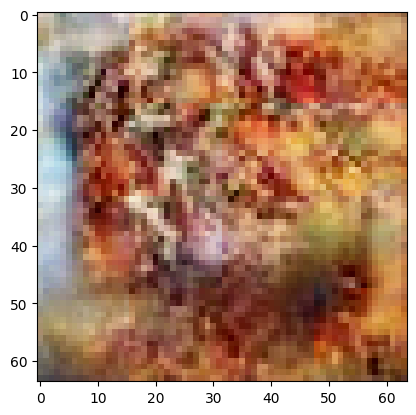

(91, 200, 150, 257, 0.519130289554596, 0.4445328414440155)
(91, 200, 200, 257, 0.6133313775062561, 0.15248817205429077)
(91, 200, 250, 257, 0.5967627763748169, 0.43313342332839966)
(92, 200, 0, 257, 0.6033969521522522, 0.5047795176506042)
(92, 200, 50, 257, 0.4416349530220032, 0.15698027610778809)
(92, 200, 100, 257, 0.5823000073432922, 0.46718156337738037)
(92, 200, 150, 257, 0.6837555170059204, 0.4790233373641968)
(92, 200, 200, 257, 0.612942099571228, 0.5207211971282959)
(92, 200, 250, 257, 0.5585922002792358, 0.3441643714904785)
(93, 200, 0, 257, 0.6171439290046692, 0.2157546430826187)
(93, 200, 50, 257, 0.4593967795372009, 0.16526830196380615)


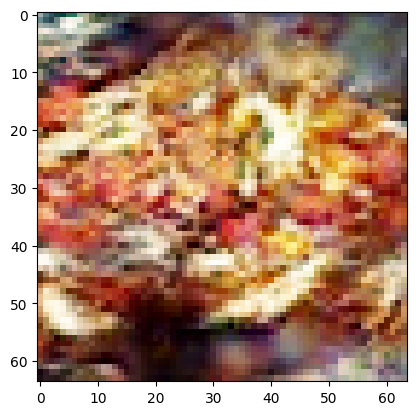

(93, 200, 100, 257, 0.6389895677566528, 0.4552342891693115)
(93, 200, 150, 257, 0.5952443480491638, 0.30565038323402405)
(93, 200, 200, 257, 0.681087076663971, 0.45731067657470703)
(93, 200, 250, 257, 0.5619615316390991, 0.0786789059638977)
(94, 200, 0, 257, 0.5872429609298706, 0.4584113359451294)
(94, 200, 50, 257, 0.43941909074783325, 0.1713278591632843)
(94, 200, 100, 257, 0.5786634683609009, 0.49747705459594727)
(94, 200, 150, 257, 0.6236699819564819, 0.4250115156173706)
(94, 200, 200, 257, 0.48835504055023193, 0.49526864290237427)
(94, 200, 250, 257, 0.47482600808143616, 0.18605542182922363)
(95, 200, 0, 257, 0.6072483658790588, 0.46730244159698486)
(95, 200, 50, 257, 0.3994544744491577, 0.27380266785621643)


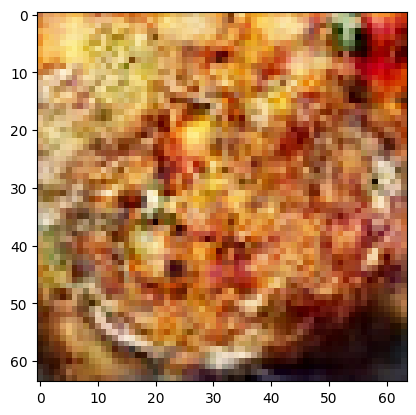

(95, 200, 100, 257, 0.6325781345367432, 0.46294206380844116)
(95, 200, 150, 257, 0.6433964967727661, 0.5552031993865967)
(95, 200, 200, 257, 0.6727917194366455, 0.5202367305755615)
(95, 200, 250, 257, 0.5168620347976685, 0.45983612537384033)
(96, 200, 0, 257, 0.6158615946769714, 0.42276859283447266)
(96, 200, 50, 257, 0.49268418550491333, 0.33352091908454895)
(96, 200, 100, 257, 0.6457504034042358, 0.42473796010017395)
(96, 200, 150, 257, 0.5996309518814087, 0.4242702126502991)
(96, 200, 200, 257, 0.6020091772079468, 0.31040677428245544)
(96, 200, 250, 257, 0.49565815925598145, 0.4354059398174286)
(97, 200, 0, 257, 0.6425572633743286, 0.5360798239707947)
(97, 200, 50, 257, 0.5021486282348633, 0.14014336466789246)


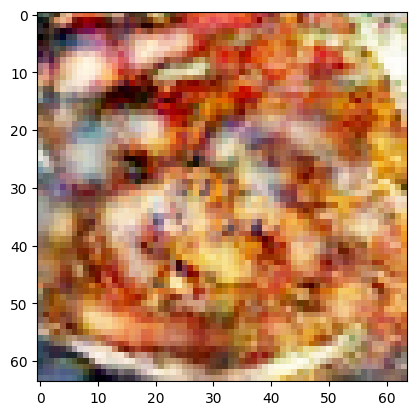

(97, 200, 100, 257, 0.693239152431488, 0.32083481550216675)
(97, 200, 150, 257, 0.673797607421875, 0.42645400762557983)
(97, 200, 200, 257, 0.6239447593688965, 0.4407767653465271)
(97, 200, 250, 257, 0.6014606952667236, 0.28309664130210876)
(98, 200, 0, 257, 0.6328852772712708, 0.472887247800827)
(98, 200, 50, 257, 0.46781665086746216, 0.2444431632757187)
(98, 200, 100, 257, 0.6416240334510803, 0.5647605061531067)
(98, 200, 150, 257, 0.6857685446739197, 0.35111674666404724)
(98, 200, 200, 257, 0.6790950298309326, 0.3456689119338989)
(98, 200, 250, 257, 0.5863189697265625, 0.22943660616874695)
(99, 200, 0, 257, 0.5680606365203857, 0.15864495933055878)
(99, 200, 50, 257, 0.47115257382392883, 0.15588301420211792)


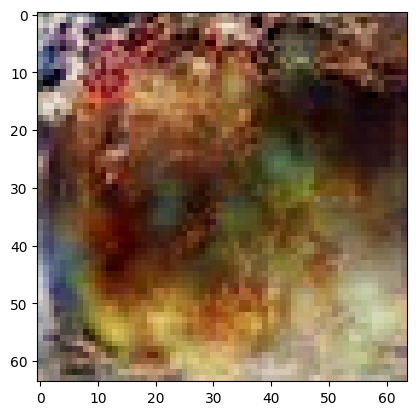

(99, 200, 100, 257, 0.6171941161155701, 0.46392419934272766)
(99, 200, 150, 257, 0.6555488705635071, 0.5176684856414795)
(99, 200, 200, 257, 0.6875015497207642, 0.5104494094848633)
(99, 200, 250, 257, 0.6096128225326538, 0.22074978053569794)
(100, 200, 0, 257, 0.6253550052642822, 0.34215235710144043)
(100, 200, 50, 257, 0.5222395062446594, 0.40309596061706543)
(100, 200, 100, 257, 0.7279784679412842, 0.4682711064815521)
(100, 200, 150, 257, 0.6391162872314453, 0.11319519579410553)
(100, 200, 200, 257, 0.6482610106468201, 0.461894154548645)
(100, 200, 250, 257, 0.5968128442764282, 0.2678278684616089)
(101, 200, 0, 257, 0.5240910053253174, 0.5430938005447388)


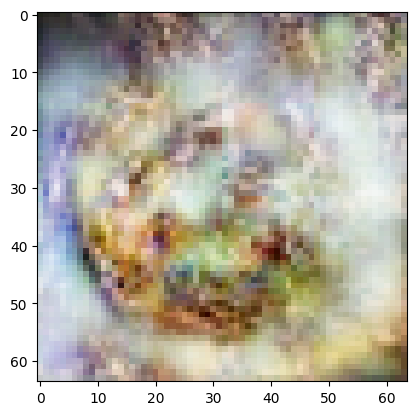

(101, 200, 50, 257, 0.500937819480896, 0.08878275752067566)
(101, 200, 100, 257, 0.7126685380935669, 0.46363794803619385)
(101, 200, 150, 257, 0.632470965385437, 0.5274760723114014)
(101, 200, 200, 257, 0.6415101885795593, -0.09651678055524826)
(101, 200, 250, 257, 0.586586058139801, 0.15800286829471588)
(102, 200, 0, 257, 0.6782453656196594, 0.37822210788726807)
(102, 200, 50, 257, 0.5105745196342468, 0.16185292601585388)
(102, 200, 100, 257, 0.6327593326568604, 0.49315887689590454)
(102, 200, 150, 257, 0.6414961218833923, 0.3344944715499878)
(102, 200, 200, 257, 0.6337741613388062, 0.1341935396194458)
(102, 200, 250, 257, 0.5305649042129517, 0.10000823438167572)
(103, 200, 0, 257, 0.6405243873596191, 0.4597180485725403)


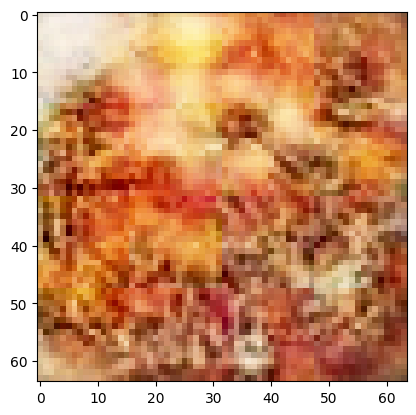

(103, 200, 50, 257, 0.5170572996139526, 0.09961189329624176)
(103, 200, 100, 257, 0.6383075714111328, 0.4393882751464844)
(103, 200, 150, 257, 0.590802788734436, 0.5256069302558899)
(103, 200, 200, 257, 0.6704548597335815, 0.34162628650665283)


KeyboardInterrupt: ignored

In [ ]:
# Train Critic: max E[critic(real)] - E[critic(fake)]
img_list_wgan = []
G_losses_wgan = []
D_losses_wgan = []
LEARNING_RATE = 1e-4
iters = 1

one = torch.FloatTensor([1]).cuda()
minus_one = torch.FloatTensor([-1]).cuda() 


num_epochs = 200
nz = 100

critic = Critic(64,3)
critic.apply(weights_init)

gen = GeneratorNetwork(100, 64)
gen.apply(weights_init)

critic = critic.cuda()
gen = gen.cuda()
CRITIC_ITERATIONS = 5
#opt_gen= optim.Adam(gen.parameters(), lr=lr, betas=(beta1, 0.999))
#opt_critic = optim.Adam(critic.parameters(), lr=lr, betas=(beta1, 0.999))
WEIGHT_CLIP = 0.01

opt_gen = optim.RMSprop(gen.parameters(), lr=LEARNING_RATE)
opt_critic = optim.RMSprop(critic.parameters(), lr=LEARNING_RATE)

for epoch in range(num_epochs):
     for i, data in enumerate(trainer_wgan):
       
       real_data = data.cuda()
       b_size = data.shape[0]
       critic.zero_grad()
       

       # Train Critic: max E[critic(real)] - E[critic(fake)]

       for _ in range(CRITIC_ITERATIONS):
         for p in critic.parameters():
           p.data.clamp_(-WEIGHT_CLIP , WEIGHT_CLIP )
         noise = torch.randn(b_size, nz, 1, 1).cuda()
         fake = gen(noise)

         critic_real = critic(real_data).reshape(-1)
         critic_fake = critic(fake).reshape(-1)

         REAL_MEAN = critic_real.mean(0).view(1)
         REAL_MEAN.backward(one)
         #print(REAL_MEAN)

         FAKE_MEAN = critic_fake.mean(0).view(1)
         FAKE_MEAN.backward(minus_one)


         # max E[critic(real)] - E[critic(fake)] 
         d_loss = FAKE_MEAN - REAL_MEAN
         w_loss = REAL_MEAN - FAKE_MEAN
       
         opt_critic.step()


       # Train Generator: max E[critic(gen_fake)] <-> min -E[critic(gen_fake)]
       gen.zero_grad()
       noise = torch.randn(b_size, nz, 1, 1).cuda()
       fake = gen(noise)
       gen_fake = critic(fake).reshape(-1)
       loss_gen = gen_fake.mean(0).view(1)
       #print(loss_gen)
       loss_gen.backward(one)
       g_cost = -loss_gen
       
       opt_gen.step()

       G_losses_wgan.append(loss_gen.item())
       D_losses_wgan.append(d_loss.item()) 
       
       if i % 50 == 0:
            print((epoch, num_epochs, i, len(trainer),
                     d_loss.item(), loss_gen.item()))

       if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(trainer)-1)):
            with torch.no_grad():
                fake = gen(noise).detach().cpu()
                image_np = fake[0].numpy()
                img_np = np.transpose(image_np, (1, 2, 0)).clip(0,1)
                plt.imshow(img_np)
                plt.show()
            img_list_wgan.append(fake)
        
       iters += 1     
















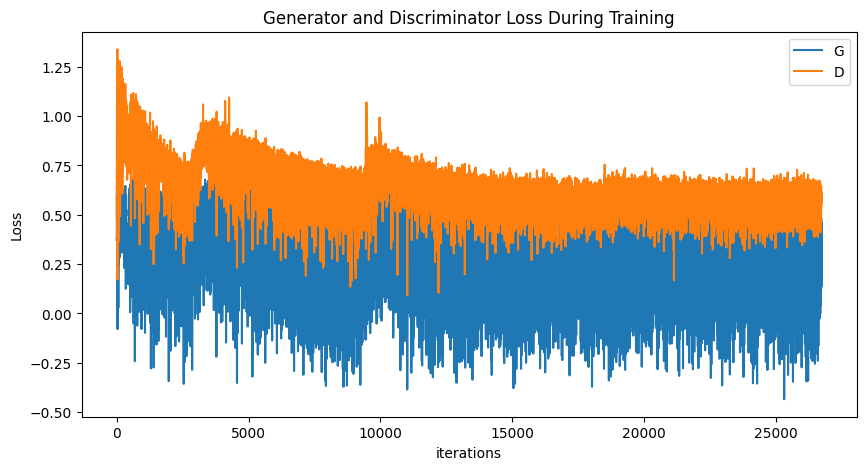

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses_wgan,label="G")
plt.plot(D_losses_wgan,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!rm -rf generated_images/
!rm -rf real_images/

In [ ]:
len(img_list_wgan)

26

Calculating FID

In [ ]:
import os
if not os.path.exists("real_images"):
    os.makedirs("real_images")

In [ ]:
#!rm -rf fake_images
#!rm -rf images
#!rm -rf output_images 
!rm -rf fake_images_gan
!rm -rf real_images_gan

In [ ]:
# Create empty list to store all images
all_images = []

for batch_images in trainer:
    all_images.extend(batch_images)

# Verify that all images have been loaded
print(len(all_images)) 

8213


In [ ]:
all_real = all_images[0:1000]

In [ ]:
len(all_real)

1000

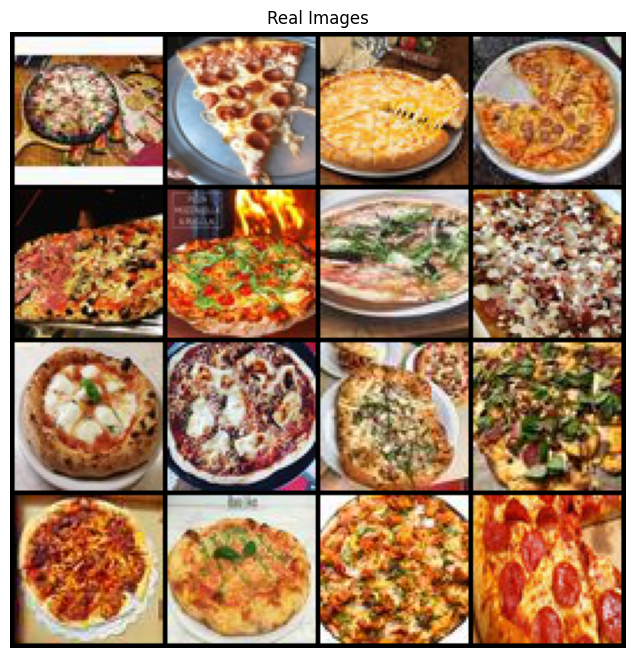

In [ ]:
display = all_images[8196:8212]


bce_grid = vutils.make_grid(display, nrow=4, padding=2)
plt.figure(figsize=(8,8))
plt.imshow(bce_grid.permute(1, 2, 0))
plt.axis('off')
plt.title('Real Images')
plt.show()


In [ ]:
import os
from torchvision import transforms
from PIL import Image

if not os.path.exists("real_images_gan"):
    os.makedirs("real_images_gan")

#transform = tvt.Compose([tvt.ToTensor()])
#dataloader_train = mydataset("train",  transform )
#trainer = DataLoader(dataloader_train , batch_size = 128)
#len(dataloader_train)
#real_images = next(iter(trainer))

# assume that we have a list of tensors called 'tensor_images'

# loop through each tensor and save it as an image
real_path_list_gan = []
for i, tensor in enumerate(all_real):
    # convert the tensor to a PIL image
    pil_image = transforms.ToPILImage()(tensor)

    # create a unique file name based on the loop variable 'i'
    file_name = f"real_image_{i}.jpg"

    # define the path to save the image
    save_path = os.path.join("real_images_gan", file_name)
    real_path_list_gan.append(save_path)

    # save the image
    pil_image.save(save_path)

In [ ]:
len(real_path_list_gan)

1000

In [ ]:
for i in img_list:
  print(i.shape)

In [ ]:
batch_of_images = [batch for batch in img_list if len(batch) != 21]

generated_images = torch.stack(batch_of_images)

all_fake_images = []

for batch_images in generated_images:
    all_fake_images.extend(batch_images)

l = len(all_fake_images)


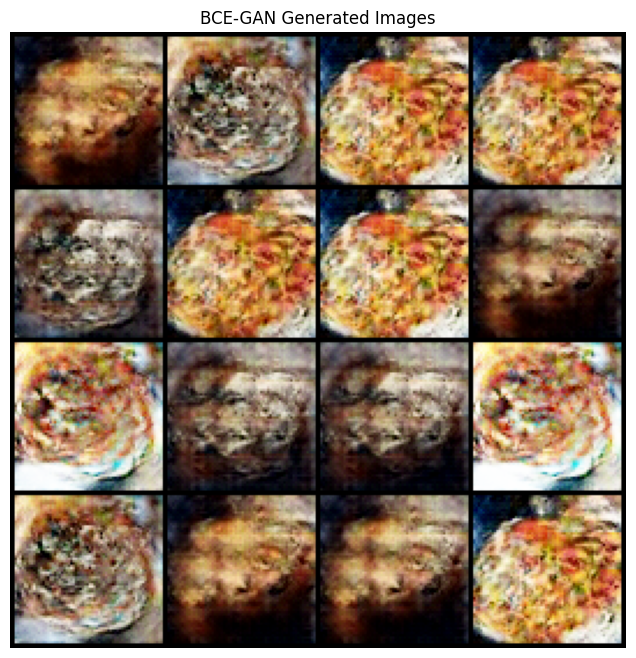

In [ ]:
display_fake = all_fake_images[l-1-16:l-1]

bce_grid = vutils.make_grid(display_fake, nrow=4, padding=2)
plt.figure(figsize=(8,8))
plt.imshow(bce_grid.permute(1, 2, 0))
plt.axis('off')
plt.title('BCE-GAN Generated Images')
plt.show()


In [ ]:
batch_of_images = [batch for batch in img_list_wgan if len(batch) != 21]

generated_images = torch.stack(batch_of_images)

all_fake_images_wgan = []

for batch_images in generated_images:
    all_fake_images_wgan.extend(batch_images)

l1 = len(all_fake_images_wgan)

In [ ]:
print(l1)

1696


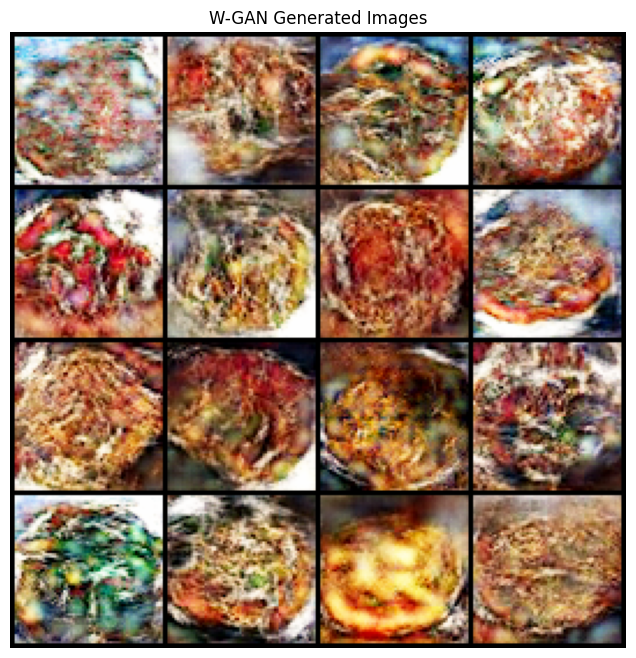

In [ ]:
display_fake = all_fake_images_wgan[l1-1-16:l1-1]

wgan_grid = vutils.make_grid(display_fake, nrow=4, padding=2)



plt.figure(figsize=(8,8))
plt.imshow(wgan_grid.permute(1, 2, 0))
plt.axis('off')
plt.title('W-GAN Generated Images')
plt.show()


In [ ]:
import os
if not os.path.exists("fake_images_gan"):
    os.makedirs("fake_images_gan")



fake_images = all_fake_images_wgan[l1-1-1000:l1-1]
fake_image_gan = []

#print(fake_images)
for i, tensor in enumerate(fake_images):
    # convert the tensor to a PIL image
    #print(tensor.shape)
    pil_image = transforms.ToPILImage()(tensor)

    # create a unique file name based on the loop variable 'i'
    file_name = f"fake_image_{i}.jpg"

    # define the path to save the image
    save_path = os.path.join("fake_images_gan", file_name)
    fake_image_gan.append(save_path)

    # save the image
    pil_image.save(save_path)




In [ ]:
import os
if not os.path.exists("fake_images_wgan"):
    os.makedirs("fake_images_wgan")



fake_images = all_fake_images_wgan[l1-1-1000:l1-1]
fake_image_wgan = []

#print(fake_images)
for i, tensor in enumerate(fake_images):
    # convert the tensor to a PIL image
    #print(tensor.shape)
    pil_image = transforms.ToPILImage()(tensor)

    # create a unique file name based on the loop variable 'i'
    file_name = f"fake_image_{i}.jpg"

    # define the path to save the image
    save_path = os.path.join("fake_images_wgan", file_name)
    fake_image_gan.append(save_path)

    # save the image
    pil_image.save(save_path)

In [ ]:
len(fake_image_gan)

1000

In [ ]:
dims = 2048
from pytorch_fid.inception import InceptionV3
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[dims]
model = InceptionV3([block_idx]).cuda()

In [ ]:
from pytorch_fid.fid_score import calculate_activation_statistics , calculate_frechet_distance


In [ ]:
m1, s1 = calculate_activation_statistics(real_path_list_gan, model, device='cuda')
#m2, s2 = calculate_activation_statistics(fake_path_list, model, device=device)

100%|██████████| 20/20 [00:00<00:00, 28.56it/s]


In [ ]:
m2, s2 = calculate_activation_statistics(fake_image_gan, model, device='cuda')

100%|██████████| 20/20 [00:00<00:00, 28.22it/s]


In [ ]:
m2, s2 = calculate_activation_statistics(fake_image_wgan, model, device='cuda')

In [ ]:
fid_value = calculate_frechet_distance(m1, s1, m2, s2)

In [ ]:
print(f'FID: {fid_value:.2f}')

FID: 189.03
